# Credit EDA Case Study

### By Amarpreet Singh and Rakesh Datta

# Importing the Required Libraries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required ploting libraries

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows

## Loading Dataset

In [4]:
# loading new application dataset
new_app =  pd.read_csv('/Users/amarpreetsinghvandra/Desktop/UpGrad/upgrad jupyter/graded quiz/EDA Case Study/application_data.csv')

In [5]:
# loading previous application dataset
pre_app =  pd.read_csv('/Users/amarpreetsinghvandra/Desktop/UpGrad/upgrad jupyter/graded quiz/EDA Case Study/previous_application.csv')

In [6]:
# loading column info dataset
#The data is indeed not encoded as UTF-8; everything is ASCII except for that single 0x92 byte
col_info = pd.read_csv('/Users/amarpreetsinghvandra/Desktop/UpGrad/upgrad jupyter/graded quiz/EDA Case Study/columns_description.csv', encoding='cp1252')
col_info.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

## Reading the data

In [7]:
new_app.head() 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
pre_app.head()  

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Inspecting the dataset

### Checking for rows and coulmns

In [9]:
new_app.shape     

(307511, 122)

In [10]:
pre_app.shape

(1670214, 37)

### Checking dimensions

In [11]:
new_app.ndim

2

In [12]:
pre_app.ndim

2

### Checking the column-wise info of the dataframe

In [13]:
new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Check the summary for the numeric columns 

In [15]:
new_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [16]:
pre_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Looking at Null Values

In [17]:
new_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [18]:
pre_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### Total null values

In [19]:
new_app.isnull().sum().value_counts()

0         55
41519      6
1021       4
154350     3
182590     3
213514     3
210199     3
156061     3
208642     3
179943     3
150007     3
153020     3
163891     3
169682     3
154828     3
214865     3
204488     3
660        1
1          1
2          1
96391      1
145755     1
12         1
210295     1
173378     1
278        1
60965      1
148431     1
202929     1
1292       1
154297     1
156341     1
dtype: int64

In [20]:
pre_app.isnull().sum().value_counts()

0          21
673065      6
895844      2
1664263     2
820405      1
385515      1
346         1
372235      1
372230      1
1           1
dtype: int64

### Finding the percentage of missing values in all columns

In [21]:
new_null_per = (new_app.isnull().mean()*100).sort_values(ascending = False)
new_null_per

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

We can observe lot of columns have null values 

In [22]:
pre_null_per = (pre_app.isnull().mean()*100).sort_values(ascending = False)
pre_null_per

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

### Removing High Null Columns

##### On New Application

In [23]:
# removing columns with nullvalue greater than 35%
new_app = new_app.loc[:,new_app.isnull().mean()<=0.35]
#removing EXT_SOURCE_3
new_app.drop(new_app[['EXT_SOURCE_3']],axis=1,inplace=True) #doesnot have impact on analysis

In [24]:
#cheacking shape 
new_app.shape

(307511, 72)

##### On Previous Application

In [25]:
# removing columns with nullvalue greater than 35%
pre_app = pre_app.loc[:,pre_app.isnull().mean()<=0.35]

In [26]:
#cheacking shape 
pre_app.shape

(1670214, 26)

# Removing Unwanted Columns

##### On New Application

In [27]:
print(list(new_app.columns.sort_values(ascending=True)))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'HOUR_APP

In [28]:
# AMT_REQ columns
un_col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON']
new_app = new_app.drop(labels= un_col,axis=1)
print('We can keep only 2 column related to the number of enquery with Credit Bureau, keeping AMT_REQ_CREDIT_BUREAU_YEAR and AMT_REQ_CREDIT_BUREAU_QRT to find the number of enquery per year and per quater.')

We can keep only 2 column related to the number of enquery with Credit Bureau, keeping AMT_REQ_CREDIT_BUREAU_YEAR and AMT_REQ_CREDIT_BUREAU_QRT to find the number of enquery per year and per quater.


In [29]:
#Client contact details
un_col =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','FLAG_PHONE']
new_app = new_app.drop(labels= un_col,axis=1)
print('We can remove client contact details, since it was no effect on the analysis weather client will pay or default')

We can remove client contact details, since it was no effect on the analysis weather client will pay or default


In [30]:
# obervation of clients social suuroundings
un_col = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']
new_app = new_app.drop(labels= un_col,axis=1)

<AxesSubplot:>

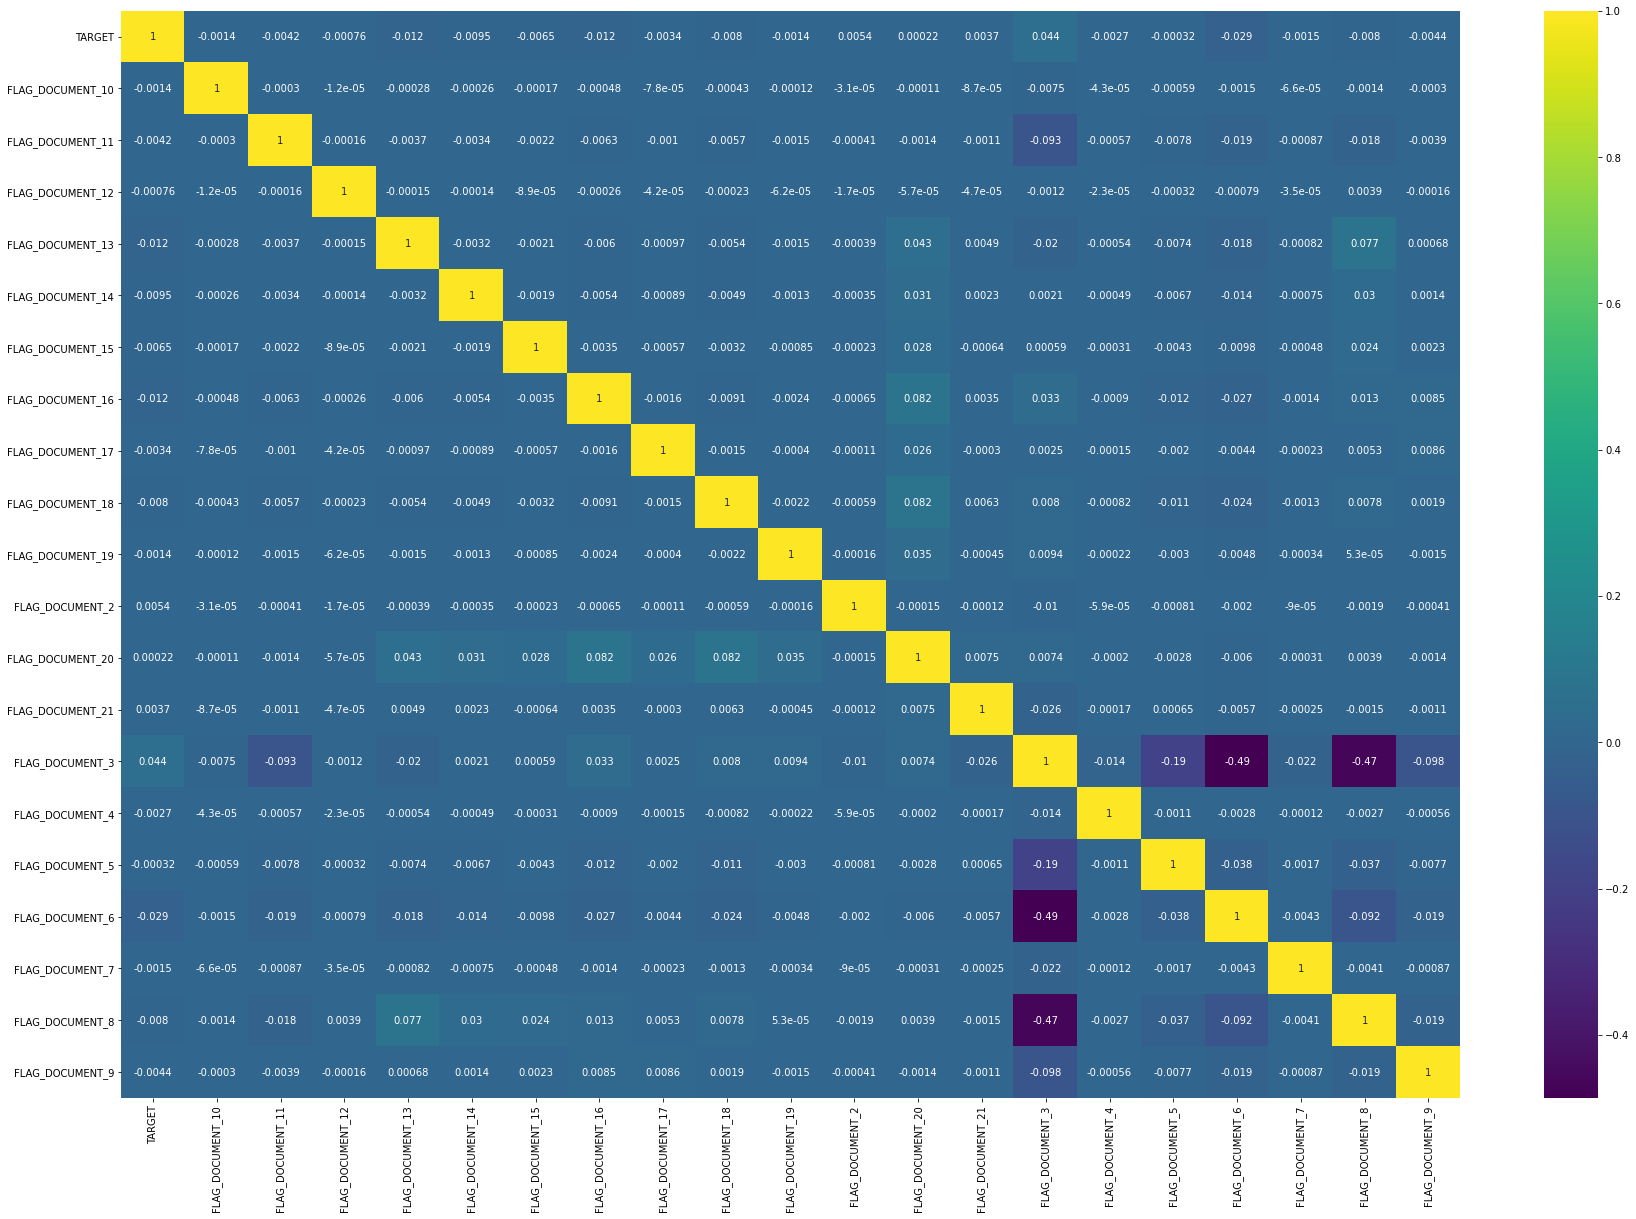

In [31]:
# find which flag_doc is important for loan application by doing corelation analysis
flag_docs = new_app[['TARGET','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9']]
flag_docs_corr = flag_docs.corr()
plt.figure(figsize=[30,20])
sns.heatmap(flag_docs_corr,xticklabels=flag_docs_corr.columns,yticklabels=flag_docs_corr.columns,annot = True,cmap ="viridis")


In [32]:
print('From above ts clear that only Flag_Doc_3 has somewhat correlation to Target, rest have almost no relation, thus keeping Flag_Doc_3 and removing rest all')

In [33]:
un_col = ['FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9']
new_app = new_app.drop(labels= un_col,axis=1)

From above ts clear that only Flag_Doc_3 has somewhat correlation to Target, rest have almost no relation, thus keeping Flag_Doc_3 and removing rest all


In [34]:
un_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
new_app = new_app.drop(labels= un_col,axis=1)
print('What time or day of the week client apply the loan has no effect, thar loanee will repay or default. Thus removing the columns')

What time or day of the week client apply the loan has no effect, thar loanee will repay or default. Thus removing the columns


In [35]:
# re-cheacking shape 
new_app.shape

(307511, 39)

In [36]:
print(list(new_app.columns.sort_values(ascending=True)))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'FLAG_DOCUMENT_3', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'SK_ID_CURR', 'TARGET']


In [37]:
print(len(new_app.columns.sort_values(ascending=True)))

39


In [38]:
new_null_per = (new_app.isnull().mean()*100).sort_values(ascending = False) # updating null variable

##### On Previous Application

In [39]:
print(list(pre_app.columns.sort_values(ascending=True)))

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CHANNEL_TYPE', 'CNT_PAYMENT', 'CODE_REJECT_REASON', 'DAYS_DECISION', 'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'NFLAG_LAST_APPL_IN_DAY', 'PRODUCT_COMBINATION', 'SELLERPLACE_AREA', 'SK_ID_CURR', 'SK_ID_PREV', 'WEEKDAY_APPR_PROCESS_START']


In [40]:
un_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','PRODUCT_COMBINATION']
pre_app = pre_app.drop(labels= un_col,axis=1)
print('What time or day of the week client apply the loan has no effect, thar loanee will repay or default. Thus removing the columns')

What time or day of the week client apply the loan has no effect, thar loanee will repay or default. Thus removing the columns


In [41]:
print(list(pre_app.columns.sort_values(ascending=True)))

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CHANNEL_TYPE', 'CNT_PAYMENT', 'CODE_REJECT_REASON', 'DAYS_DECISION', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA', 'SK_ID_CURR', 'SK_ID_PREV']


In [42]:
print(len(pre_app.columns.sort_values(ascending=True)))

23


In [43]:
pre_null_per = (pre_app.isnull().mean()*100).sort_values(ascending = False)
pre_null_per # updating null variable

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_CONTRACT_STATUS            0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
SK_ID_PREV                      0.000000
dtype: float64

In [44]:
# re-cheacking shape
pre_app.shape

(1670214, 23)

### Imputing Columns
Selecting columns with less or equal to than 13% null vallues <br>
We will check those columns for possible imputation

##### On New Application

In [45]:
new_impute = (new_null_per[(new_null_per <= 35) & (new_null_per >0)])
new_impute

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [46]:
new_app[['NAME_TYPE_SUITE']].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
dtype: int64

In [47]:
new_app['NAME_TYPE_SUITE'].fillna((new_app['NAME_TYPE_SUITE'].mode()[0]),inplace = True)
print ("NAME_TYPE_SUITE is a object variable (categorical column), thus we choose mode to impute values")

NAME_TYPE_SUITE is a object variable (categorical column), thus we choose mode to impute values


In [48]:
new_app['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 
new_app['OCCUPATION_TYPE']

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507        Unknown
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [49]:
print ("OCCUPATION_TYPE is a object variable (categorical column),and having high null values thus replced by unkown variable")

OCCUPATION_TYPE is a object variable (categorical column),and having high null values thus replced by unkown variable


Text(0.5, 1.0, 'Distribution of Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)')

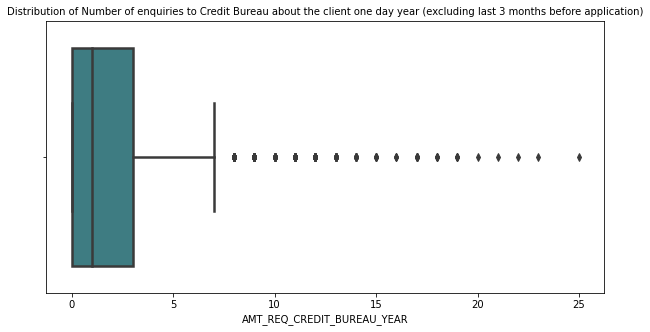

In [50]:
plt.figure(figsize=[10,5])
sns.boxplot(new_app['AMT_REQ_CREDIT_BUREAU_YEAR'],linewidth=2.5,palette='crest')
plt.title("Distribution of Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)",fontsize = 10)

In [51]:
print('From above boxplots its clear there are outliers thus imputing with median')

From above boxplots its clear there are outliers thus imputing with median


In [52]:
# imputing using median
new_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(new_app['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace = True)

Text(0.5, 1.0, 'Distribution of Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)')

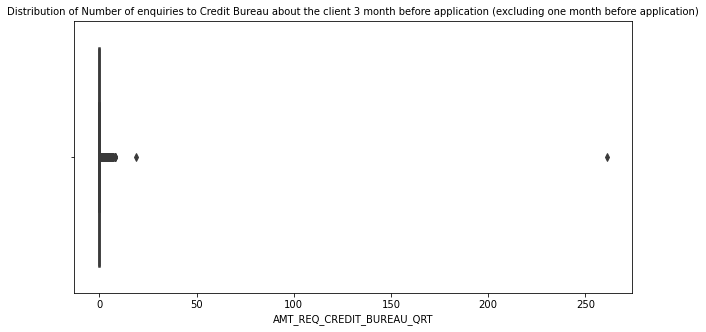

In [53]:
plt.figure(figsize=[10,5])
sns.boxplot(new_app['AMT_REQ_CREDIT_BUREAU_QRT'],linewidth=2.5,palette='crest')
plt.title("Distribution of Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)",fontsize = 10)

In [54]:
print('From above boxplots its clear there are outliers thus imputing with median')

From above boxplots its clear there are outliers thus imputing with median


In [55]:
# imputing using median
new_app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(new_app['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace = True)

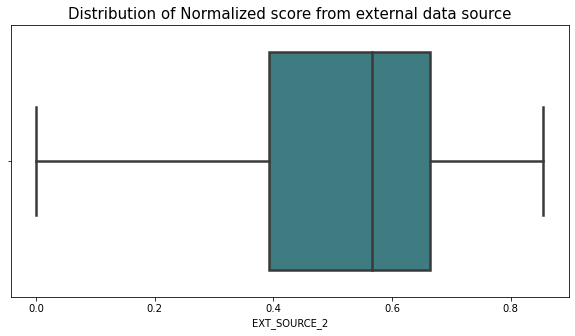

In [56]:
#plotting EXT_SOURCE_2 to see outliers as it is a countinuous variable
plt.figure(figsize=[10,5])
sns.boxplot(new_app['EXT_SOURCE_2'],linewidth=2.5,palette='crest');
plt.title('Distribution of Normalized score from external data source',fontsize = 15);

In [57]:
print('From above boxplots its clear there are no outliers thus imputing columns with mean')

From above boxplots its clear there are no outliers thus imputing columns with mean


In [58]:
new_app['EXT_SOURCE_2'].fillna(new_app['EXT_SOURCE_2'].mean(),inplace = True)

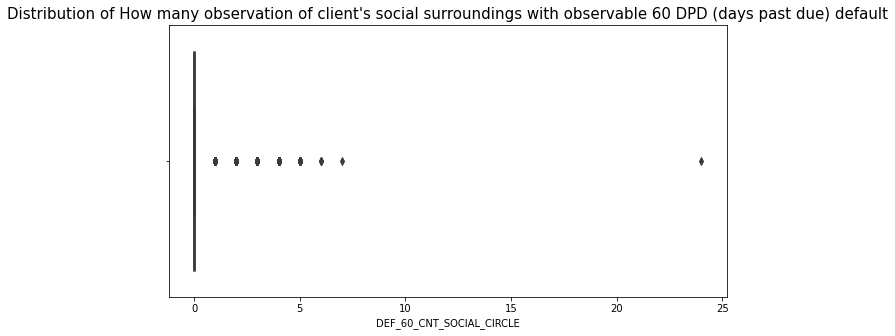

In [59]:
#plotting DEF_60_CNT_SOCIAL_CIRCLE to see outliers as it is a countinuous variable
plt.figure(figsize=[10,5])
sns.boxplot(new_app['DEF_60_CNT_SOCIAL_CIRCLE'],linewidth=2.5,palette='crest');
plt.title("Distribution of How many observation of client's social surroundings with observable 60 DPD (days past due) default",fontsize = 15);

In [60]:
new_app['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(new_app['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace = True)
print ("DEF_60_CNT_SOCIAL_CIRCLE is a continuous variable with outliers, thus we impute values with median")

DEF_60_CNT_SOCIAL_CIRCLE is a continuous variable with outliers, thus we impute values with median


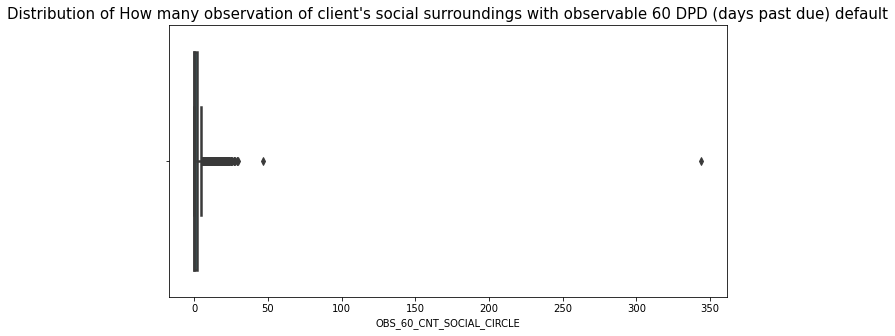

In [61]:
#plotting OBS_60_CNT_SOCIAL_CIRCLE to see outliers as it is a countinuous variable
plt.figure(figsize=[10,5])
sns.boxplot(new_app['OBS_60_CNT_SOCIAL_CIRCLE'],linewidth=2.5,palette='crest');
plt.title("Distribution of How many observation of client's social surroundings with observable 60 DPD (days past due) default",fontsize = 15);

In [62]:
new_app['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(new_app['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace = True)
print ("OBS_60_CNT_SOCIAL_CIRCLE is a continuous variable with outliers, thus we impute values with median")

OBS_60_CNT_SOCIAL_CIRCLE is a continuous variable with outliers, thus we impute values with median


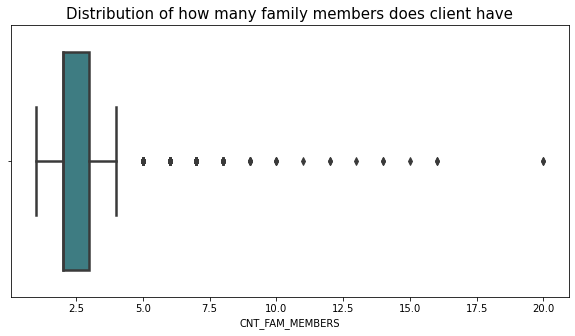

In [63]:
#plotting CNT_FAM_MEMBERS to see outliers as it is a countinuous variable
plt.figure(figsize=[10,5])
sns.boxplot(new_app['CNT_FAM_MEMBERS'],linewidth=2.5,palette='crest');
plt.title('Distribution of how many family members does client have',fontsize = 15);

In [64]:
new_app['CNT_FAM_MEMBERS'].fillna(new_app['CNT_FAM_MEMBERS'].median(),inplace = True)
print ("CNT_FAM_MEMBERS is a continuous variable with outliers, thus we impute values with median")

CNT_FAM_MEMBERS is a continuous variable with outliers, thus we impute values with median


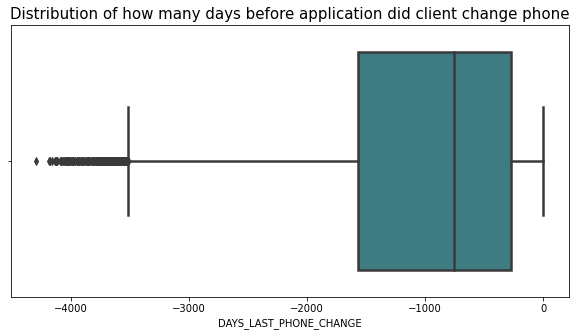

In [65]:
#plotting DAYS_LAST_PHONE_CHANGE to see outliers as it is a countinuous variable
plt.figure(figsize=[10,5])
sns.boxplot(new_app['DAYS_LAST_PHONE_CHANGE'],linewidth=2.5,palette='crest');
plt.title('Distribution of how many days before application did client change phone',fontsize = 15);

In [66]:
new_app['DAYS_LAST_PHONE_CHANGE'].fillna(new_app['DAYS_LAST_PHONE_CHANGE'].median(),inplace = True)
print ("DAYS_LAST_PHONE_CHANGE is a continuous variable with outliers, thus we impute values with median")

DAYS_LAST_PHONE_CHANGE is a continuous variable with outliers, thus we impute values with median


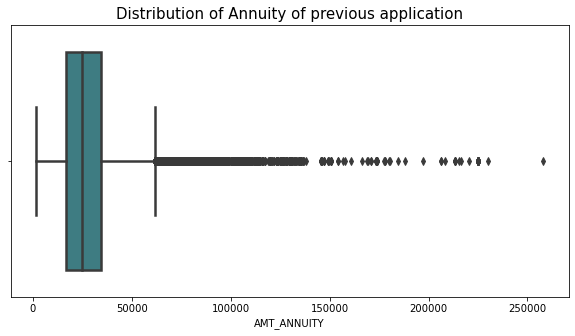

In [67]:
#plotting AMT_ANNUITY to see outliers as it is a countinuous variable
plt.figure(figsize=[10,5])
sns.boxplot(new_app['AMT_ANNUITY'],linewidth=2.5,palette='crest');
plt.title('Distribution of Annuity of previous application',fontsize = 15);

In [68]:
new_app['AMT_ANNUITY'].fillna(new_app['AMT_ANNUITY'].median(),inplace = True)
print ("AMT_ANNUITY is a continuous variable with outliers, thus we impute values with median")

AMT_ANNUITY is a continuous variable with outliers, thus we impute values with median


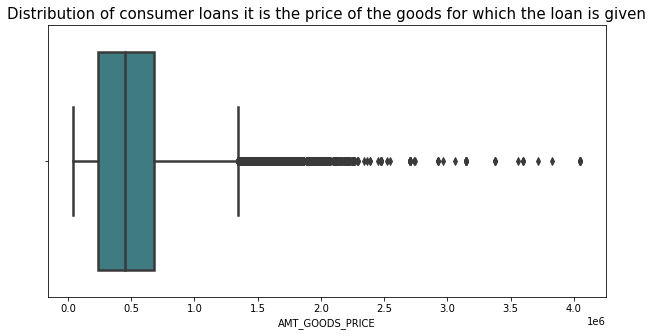

In [69]:
#plotting AMT_GOODS_PRICE to see outliers as it is a countinuous variable
plt.figure(figsize=[10,5])
sns.boxplot(new_app['AMT_GOODS_PRICE'],linewidth=2.5,palette='crest');
plt.title('Distribution of consumer loans it is the price of the goods for which the loan is given',fontsize = 15);

In [70]:
new_app['AMT_GOODS_PRICE'].fillna(new_app['AMT_GOODS_PRICE'].median(),inplace = True)
print ("AMT_GOODS_PRICE is a continuous variable with outliers, thus we impute values with median")

AMT_GOODS_PRICE is a continuous variable with outliers, thus we impute values with median


In [71]:
#rechecking nulls and upadating
new_null_per = (new_app.isnull().mean()*100).sort_values(ascending = False)
new_null_per

AMT_REQ_CREDIT_BUREAU_YEAR     0.0
AMT_ANNUITY                    0.0
REGION_POPULATION_RELATIVE     0.0
NAME_HOUSING_TYPE              0.0
NAME_FAMILY_STATUS             0.0
NAME_EDUCATION_TYPE            0.0
NAME_INCOME_TYPE               0.0
NAME_TYPE_SUITE                0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
DAYS_EMPLOYED                  0.0
AMT_INCOME_TOTAL               0.0
CNT_CHILDREN                   0.0
FLAG_OWN_REALTY                0.0
FLAG_OWN_CAR                   0.0
CODE_GENDER                    0.0
NAME_CONTRACT_TYPE             0.0
TARGET                         0.0
DAYS_BIRTH                     0.0
DAYS_REGISTRATION              0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_3                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
LIVE_CITY_NOT_WORK_C

In [72]:
new_app.shape

(307511, 39)

##### On Previous Application

In [73]:
pre_app[['AMT_GOODS_PRICE']].value_counts()

AMT_GOODS_PRICE
45000.0            47831
225000.0           43549
135000.0           40666
450000.0           38926
90000.0            29367
                   ...  
286393.5               1
286402.5               1
286420.5               1
96683.4                1
6905160.0              1
Length: 93885, dtype: int64

Text(0.5, 1.0, 'Distribution of Goods price of good that client asked for (if applicable) on the previous application')

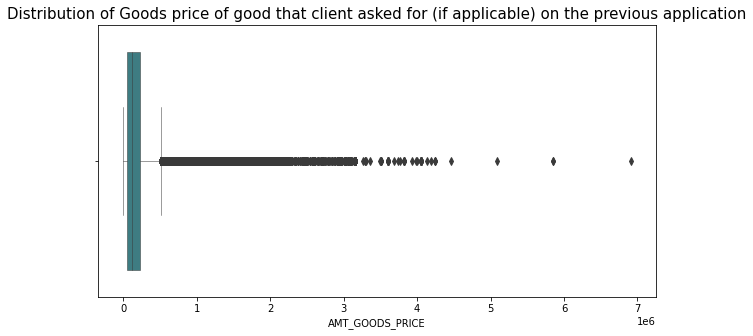

In [74]:
# countinuous data
plt.figure(figsize=[10,5])
sns.boxplot(pre_app['AMT_GOODS_PRICE'],linewidth=.5,palette='crest');
plt.title("Distribution of Goods price of good that client asked for (if applicable) on the previous application",fontsize = 15)

In [75]:
pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].median(),inplace = True)
print ("AMT_GOODS_PRICE is a continuous variable with outliers, thus we impute values with median")

AMT_GOODS_PRICE is a continuous variable with outliers, thus we impute values with median


In [76]:
pre_app[['AMT_ANNUITY']].value_counts()

AMT_ANNUITY
2250.000       31865
11250.000      13974
6750.000       13442
9000.000       12496
22500.000      11903
               ...  
17659.620          1
17660.025          1
17660.475          1
17660.520          1
20417.940          1
Length: 357959, dtype: int64

Text(0.5, 1.0, 'Distribution of Loan annuity')

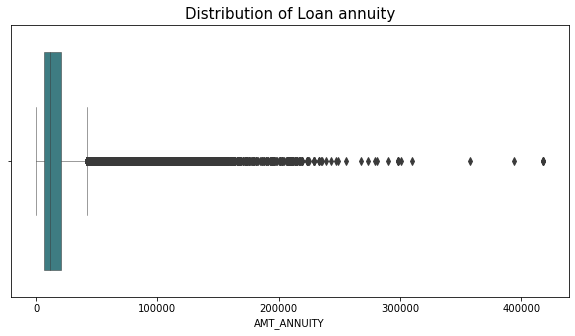

In [77]:
plt.figure(figsize=[10,5])
sns.boxplot(pre_app['AMT_ANNUITY'],linewidth=.5,palette='crest');
plt.title("Distribution of Loan annuity",fontsize = 15)

In [78]:
pre_app['AMT_ANNUITY'].fillna(pre_app['AMT_ANNUITY'].median(),inplace = True)
print ("AMT_ANNUITY is a continuous variable with outliers, thus we impute values with median")

AMT_ANNUITY is a continuous variable with outliers, thus we impute values with median


In [79]:
pre_app[['CNT_PAYMENT']].value_counts()

CNT_PAYMENT
12.0           323049
6.0            190461
0.0            144985
10.0           141851
24.0           137764
18.0            77430
36.0            72583
60.0            53600
48.0            47316
8.0             30349
4.0             26924
30.0            16924
14.0             8253
42.0             7136
16.0             5710
5.0              3957
54.0             2104
20.0             1805
7.0              1434
9.0              1236
3.0              1100
15.0              904
11.0              669
72.0              139
13.0               51
17.0               48
84.0               45
22.0               37
23.0               27
26.0               13
35.0               11
66.0               10
28.0                8
29.0                8
32.0                6
19.0                6
34.0                4
59.0                4
41.0                3
45.0                3
47.0                3
21.0                3
38.0                2
44.0                2
46.0                

Text(0.5, 1.0, 'Distribution of Term of previous credit at application of the previous application')

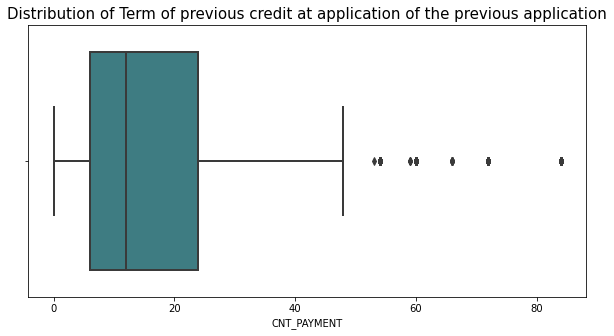

In [80]:
plt.figure(figsize=[10,5])
sns.boxplot(pre_app['CNT_PAYMENT'],linewidth=2,palette='crest');
plt.title("Distribution of Term of previous credit at application of the previous application",fontsize = 15)

In [81]:
pre_app['CNT_PAYMENT'].fillna(pre_app['CNT_PAYMENT'].median(),inplace = True)
print ("CNT_PAYMENT is a continuous variable with outliers, thus we impute values with median")

CNT_PAYMENT is a continuous variable with outliers, thus we impute values with median


In [82]:
pre_app['CNT_PAYMENT'].fillna(pre_app['CNT_PAYMENT'].median(),inplace = True)
print ("CNT_PAYMENT is a continuous variable with outliers, thus we impute values with median")

CNT_PAYMENT is a continuous variable with outliers, thus we impute values with median


Text(0.5, 1.0, 'Distribution of Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount')

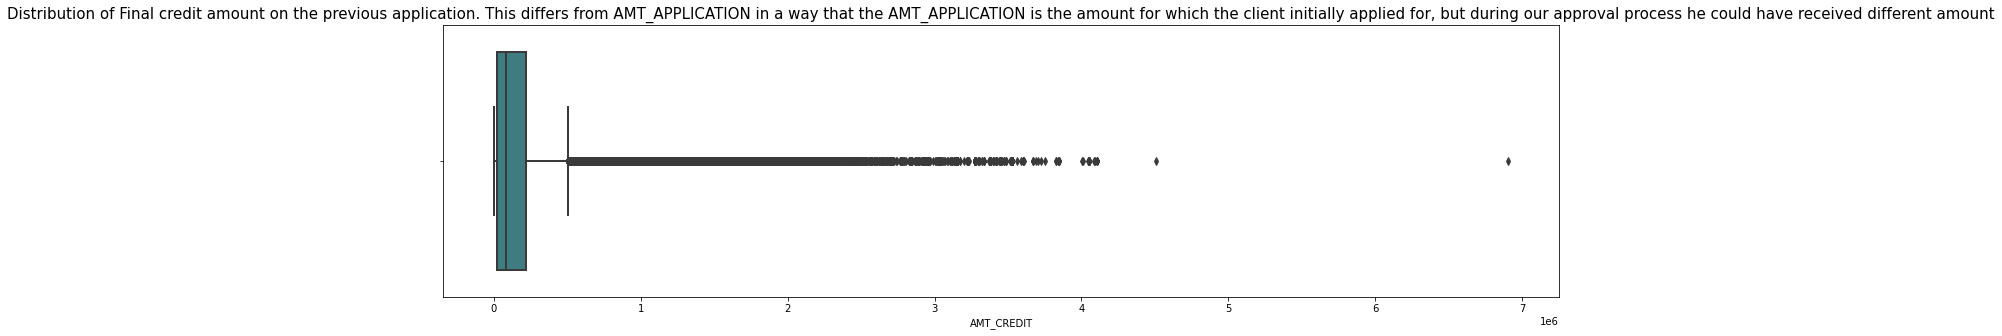

In [83]:
plt.figure(figsize=[20,5])
sns.boxplot(pre_app['AMT_CREDIT'],linewidth=2,palette='crest');
plt.title("Distribution of Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount",fontsize = 15)

In [84]:
pre_app['AMT_CREDIT'].fillna(pre_app['AMT_CREDIT'].median(),inplace = True)
print ("AMT_CREDIT is a continuous variable with outliers, thus we impute values with median")

AMT_CREDIT is a continuous variable with outliers, thus we impute values with median


In [85]:
pre_null_per = (pre_app.isnull().mean()*100).sort_values(ascending = False)
pre_null_per

NAME_YIELD_GROUP               0.0
NAME_CONTRACT_STATUS           0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
DAYS_DECISION                  0.0
CNT_PAYMENT                    0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
SK_ID_PREV                     0.0
dtype: float64

In [86]:
pre_app.shape  #re-checking the shape

(1670214, 23)

## Changing Datatypes of columns and updating them

### New Application

In [87]:
#looking at float64 variables 
flt64 = new_app.loc[:, new_app.dtypes == 'float64']
flt64

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
0                         0.018801            -3648.0              1.0   
1                         0.003541            -1186.0              2.0   
2                         0.010032            -4260.0              1.0   
3                         0.008019            -9833.0              2.0   
4                         0.028663            -4311.0              1.0   
...                            ...                ...              ...   
307506                    0.032561            -8456.0              1.0   
307507                    0.025164            -4388.0              1.0   
307508                    0.005002            -6737.0              1.0   
307509                    0.005313            -2562.0              2.0   
307510                    0.046220            -5128.0              2.0   

        EXT_SOURCE_2  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0           0.262949                       2.0                       2.0   
1           0.622246                       1.0                       0.0   
2           0.555912                       0.0                       0.0   
3           0.650442                       2.0                       0.0   
4           0.322738                       0.0                       0.0   
...              ...                       ...                       ...   
307506      0.681632                       0.0                       0.0   
307507      0.115992                       0.0                       0.0   
307508      0.535722                       6.0                       0.0   
307509      0.514163                       0.0                       0.0   
307510      0.708569                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_QRT  \
0                      -1134.0                        0.0   
1                       -828.0                        0.0   
2                       -815.0                        0.0   
3                       -617.0                        0.0   
4                      -1106.0                        0.0   
...                        ...                        ...   
307506                  -273.0                        0.0   
307507                     0.0                        0.0   
307508                 -1909.0                        0.0   
307509                  -322.0                        0.0   
307510                  -787.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
0                              1.0  
1                              0.0  
2                              0.0  
3                              1.0  
4                              0.0  
...                            ...  
307506                         1.0  
307507                         1.0  
307508                         1.0  
307509                         0.0  
307510                         1.0  

[307511 rows x 13 columns]

In [88]:
print ('From above dataframe we can see that there are a few columns wrongly set as flot64. Will convert them to int64.')

From above dataframe we can see that there are a few columns wrongly set as flot64. Will convert them to int64.


In [89]:
print(list(flt64.columns.sort_values(ascending=True)))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE']


In [90]:
# looking for data discrepancy
flt64 = list(flt64.columns)
for x in flt64:
    print(new_app[x].value_counts(),'\n')

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64 

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
827100.0        1
413442.0        1
1652458.5       1
825853.5        1
2097058.5       1
Name: AMT_CREDIT, Length: 5603, dtype: int64 

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64 

450000.0    26300
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64 

0.035792    16408
0.046220   

In [91]:
# list of columns which are converted from float to int
flt_to_int = ['DAYS_REGISTRATION','CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','DAYS_LAST_PHONE_CHANGE','DEF_60_CNT_SOCIAL_CIRCLE']

In [92]:
for x in flt_to_int:
    new_app[x] =new_app[x].astype(int)

In [93]:
new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [94]:
#looking at int64 variables 
int64 = new_app.loc[:, new_app.dtypes == 'int64']
int64

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0           100002       1             0       -9461           -637   
1           100003       0             0      -16765          -1188   
2           100004       0             0      -19046           -225   
3           100006       0             0      -19005          -3039   
4           100007       0             0      -19932          -3038   
...            ...     ...           ...         ...            ...   
307506      456251       0             0       -9327           -236   
307507      456252       0             0      -20775         365243   
307508      456253       0             0      -14966          -7921   
307509      456254       1             0      -11961          -4786   
307510      456255       0             0      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0                   -3648            -2120                1   
1                   -1186             -291                2   
2                   -4260            -2531                1   
3                   -9833            -2437                2   
4                   -4311            -3458                1   
...                   ...              ...              ...   
307506              -8456            -1982                1   
307507              -4388            -4090                1   
307508              -6737            -5150                1   
307509              -2562             -931                2   
307510              -5128             -410                2   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                          2                            2   
1                          1                            1   
2                          2                            2   
3                          2                            2   
4                          2                            2   
...                      ...                          ...   
307506                     1                            1   
307507                     2                            2   
307508                     3                            3   
307509                     2                            2   
307510                     1                            1   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   
...                            ...                         ...   
307506                           0                           0   
307507                           0                           0   
307508                           0                           0   
307509                           0                           0   
307510                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
307506                            0                       0   
307507                            0                       0   
307508                            0                       0   
307509                            0                       1   
307510                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                            0                        0 

In [95]:
# looking for data discrepancy
int64 = list(int64.columns)
for x in int64:
    print(new_app[x].value_counts(),'\n')

100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64 

0    282686
1     24825
Name: TARGET, dtype: int64 

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64 

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64 

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64 

-1        113
-7         98
-6         96
-4         92
-2         92
         ... 
-16662      1
-14486   

In [96]:
# converting int  to categorical
int_obj = ['FLAG_DOCUMENT_3','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION']

In [97]:
for x in int_obj:
    new_app[x] =new_app[x].astype(str)

In [98]:
#replacing 0 to Yes and 1 to No
for x in int_obj:
    new_app[x].replace(['0','1'],['Yes','No'],inplace=True)

In [99]:
# Creating new Object Target variable for categorical analysis
new_app['Target'] = new_app['TARGET'].astype(str).replace(['0','1'],['Yes','No'])

In [100]:
#looking at object variables 
ojt_var_n = new_app.loc[:, new_app.dtypes == object]
ojt_var_n

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment         Unknown   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                             Yes                        Yes   
1                             Yes                        Yes   
2                             Yes                        Yes   
3                             Yes                        Yes   
4                             Yes                        Yes   
...                           ...                        ...   
307506                        Yes                        Yes   
307507                        Yes                        Yes   
307508                        Yes                        Yes   
307509                        Yes                        Yes   
307510                        Yes                        Yes   

       LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
0                              Yes                    Yes   
1                              Yes                    Yes   
2                              Yes                    Yes   
3                              Yes                    Yes   
4                              Yes                    Yes   
...                            ...                    ...   
307506                         Yes                    Yes   
307507                         Yes                    Yes   
307508                         Yes                    Yes   
307509                         Ye

In [101]:
# looking for data discrepancy
ojt_var_list_n = list(ojt_var_n.columns.sort_values())
for x in ojt_var_list_n:
    print(new_app[x].value_counts(),'\n')

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

No     218340
Yes     89171
Name: FLAG_DOCUMENT_3, dtype: int64 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

Yes    252296
No      55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64 

Yes    295008
No      12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64 

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64 

House / apartment      

In [102]:
# Replacing the XNA from the Gender data set to F 
new_app['CODE_GENDER'].replace(['XNA'],['F'],inplace=True)
#replacing M to Male and F to Female
new_app['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [103]:
#replacing XNA to Unkown since they represent very high number
new_app['ORGANIZATION_TYPE'].replace(['XNA'],['Unkown'],inplace=True)

In [104]:
#re-checking
ojt_var_list_n = list(ojt_var_n.columns.sort_values())
for x in ojt_var_list_n:
    print(new_app[x].value_counts(),'\n')

Female    202452
Male      105059
Name: CODE_GENDER, dtype: int64 

No     218340
Yes     89171
Name: FLAG_DOCUMENT_3, dtype: int64 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

Yes    252296
No      55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64 

Yes    295008
No      12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64 

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64 

House / apartment      272868
W

#### Previous Application

In [105]:
#looking at float64 variables 
flt_64 = pre_app.loc[:, pre_app.dtypes == 'float64']
flt_64

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0           1730.430          17145.0     17145.0          17145.0   
1          25188.615         607500.0    679671.0         607500.0   
2          15060.735         112500.0    136444.5         112500.0   
3          47041.335         450000.0    470790.0         450000.0   
4          31924.395         337500.0    404055.0         337500.0   
...              ...              ...         ...              ...   
1670209    14704.290         267295.5    311400.0         267295.5   
1670210     6622.020          87750.0     64291.5          87750.0   
1670211    11520.855         105237.0    102523.5         105237.0   
1670212    18821.520         180000.0    191880.0         180000.0   
1670213    16431.300         360000.0    360000.0         360000.0   

         CNT_PAYMENT  
0               12.0  
1               36.0  
2               12.0  
3               12.0  
4               24.0  
...              ...  
1670209         30.0  
1670210         12.0  
1670211         10.0  
1670212         12.0  
1670213         48.0  

[1670214 rows x 5 columns]

In [106]:
# looking for data discrepancy
flt_64 = list(flt_64.columns)
for x in flt_64:
    print(pre_app[x].value_counts(),'\n')

11250.000    386209
2250.000      31865
6750.000      13442
9000.000      12496
22500.000     11903
              ...  
30073.860         1
41845.365         1
36622.620         1
41864.760         1
63715.905         1
Name: AMT_ANNUITY, Length: 357959, dtype: int64 

0.000         392402
45000.000      47831
225000.000     43543
135000.000     40678
450000.000     38905
               ...  
355626.000         1
247404.465         1
355594.500         1
355590.000         1
442350.000         1
Name: AMT_APPLICATION, Length: 93885, dtype: int64 

0.000         336768
45000.000      35051
225000.000     21094
450000.000     19954
135000.000     18720
               ...  
76031.595          1
334656.000         1
9279.000           1
365733.000         1
408915.000         1
Name: AMT_CREDIT, Length: 86803, dtype: int64 

112320.000    385545
45000.000      47831
225000.000     43549
135000.000     40666
450000.000     38926
               ...  
355626.000         1
247404.465         1

In [107]:
# Converting float to int64
flt_to_int_p = ['CNT_PAYMENT']
for x in flt_to_int_p:
    pre_app[x] =pre_app[x].astype(int)

In [108]:
#looking at int64 variables 
int_64 = pre_app.loc[:, pre_app.dtypes == 'int64']
int_64

SK_ID_PREV  SK_ID_CURR  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
0           2030495      271877                       1            -73   
1           2802425      108129                       1           -164   
2           2523466      122040                       1           -301   
3           2819243      176158                       1           -512   
4           1784265      202054                       1           -781   
...             ...         ...                     ...            ...   
1670209     2300464      352015                       1           -544   
1670210     2357031      334635                       1          -1694   
1670211     2659632      249544                       1          -1488   
1670212     2785582      400317                       1          -1185   
1670213     2418762      261212                       1          -1193   

         SELLERPLACE_AREA  CNT_PAYMENT  
0                      35           12  
1                      -1           36  
2                      -1           12  
3                      -1           12  
4                      -1           24  
...                   ...          ...  
1670209                43           30  
1670210                43           12  
1670211              1370           10  
1670212                -1           12  
1670213                -1           48  

[1670214 rows x 6 columns]

In [109]:
# looking for data discrepancy
int_64 = list(int_64.columns)
for x in int_64:
    print(pre_app[x].value_counts(),'\n')

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64 

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64 

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64 

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64 

-1       762675
 0        60523
 50       37401
 30       34423
 20       33840
          ...  
 1114         1
 2345         1
 1112         1
 4186         1
 1023         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64 

12    695279
6     190461
0     144985
10    141851
24    137764
18     77430
36     72583
60     53600
48     

In [110]:
# Converting int64 to categorical variable
int_obj_p = ['NFLAG_LAST_APPL_IN_DAY']
for x in int_obj_p:
    pre_app[x] =pre_app[x].astype(str)

In [111]:
#looking at object variables 
ojt_var = pre_app.loc[:, pre_app.dtypes == object]
ojt_var

NAME_CONTRACT_TYPE FLAG_LAST_APPL_PER_CONTRACT NFLAG_LAST_APPL_IN_DAY  \
0           Consumer loans                           Y                      1   
1               Cash loans                           Y                      1   
2               Cash loans                           Y                      1   
3               Cash loans                           Y                      1   
4               Cash loans                           Y                      1   
...                    ...                         ...                    ...   
1670209     Consumer loans                           Y                      1   
1670210     Consumer loans                           Y                      1   
1670211     Consumer loans                           Y                      1   
1670212         Cash loans                           Y                      1   
1670213         Cash loans                           Y                      1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                          XAP             Approved  Cash through the bank   
1                          XNA             Approved                    XNA   
2                          XNA             Approved  Cash through the bank   
3                          XNA             Approved  Cash through the bank   
4                      Repairs              Refused  Cash through the bank   
...                        ...                  ...                    ...   
1670209                    XAP             Approved  Cash through the bank   
1670210                    XAP             Approved  Cash through the bank   
1670211                    XAP             Approved  Cash through the bank   
1670212                    XNA             Approved  Cash through the bank   
1670213                    XNA             Approved  Cash through the bank   

        CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0                      XAP         Repeater                Mobile   
1                      XAP         Repeater                   XNA   
2                      XAP         Repeater                   XNA   
3                      XAP         Repeater                   XNA   
4                       HC         Repeater                   XNA   
...                    ...              ...                   ...   
1670209                XAP        Refreshed             Furniture   
1670210                XAP              New             Furniture   
1670211                XAP         Repeater  Consumer Electronics   
1670212                XAP         Repeater                   XNA   
1670213                XAP         Repeater                   XNA   

        NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0                  POS               XNA             Country-wide   
1                 Cash            x-sell           Contact center   
2                 Cash            x-sell  Credit and cash offices   
3                 Cash            x-sell  Credit and cash offices   
4                 Cash           walk-in  Credit and cash offices   
...                ...               ...                      ...   
1670209            POS               XNA                    Stone   
1670210            POS               XNA                    Stone   
1670211            POS               XNA             Country-wide   
1670212           Cash            x-sell          AP+ (Cash loan)   
1670213           Cash            x-sell          AP+ (Cash loan)   

         NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  
0                Connectivity           middle  
1                         XNA       low_action  
2                         XNA             high  
3                         XNA           middle  
4                         XNA             high  
...                       ...              ...  
1670209             Furniture       low_normal  
1670210             Furniture           middle  

In [112]:
# looking for data discrepancy
ojt_var_list = list(ojt_var.columns)
for x in ojt_var_list:
    print(pre_app[x].value_counts(),'\n')

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64 

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64 

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64 

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs         

##### XNA = not available
##### XAP = not applicable 
###### Clubing XNA & XAP Into Unkown

In [113]:
#for x in ojt_var_list:
#    pre_app[x].replace(['XNA','XAP'],['Unkown','Unkown'],inplace = True)
#    print(pre_app[x].value_counts(),'\n')

#### Changing Day coulmns to years

In [114]:
new_app.columns.sort_values()

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'FLAG_DOCUMENT_3', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'SK_ID_CURR', 'TARGET', 'Target'],
      dtype='object')

In [115]:
pre_app.columns.sort_values()

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'CHANNEL_TYPE', 'CNT_PAYMENT', 'CODE_REJECT_REASON', 'DAYS_DECISION',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA', 'SK_ID_CURR',
       'SK_ID_PREV'],
      dtype='object')

In [116]:
days = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']

In [117]:
for x in days:
    new_app[x] = abs(new_app[x])
# converting days into years
for x in days:
    new_app[x] = round(new_app[x]/365,2)

In [118]:
new_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  \
0            25.92           1.75             5.81                    3.11   
1            45.93           3.25             0.80                    2.27   
2            52.18           0.62             6.93                    2.23   
3            52.07           8.33             6.68                    1.69   
4            54.61           8.32             9.47                    3.03   
...            ...            ...              ...                     ...   
307506       25.55           0.65             5.43                    0.75   
307507       56.92        1000.67            11.21                    0.00   
307508       41.00          21.70            14.11                    5.23   
307509       32.77          13.11             2.55                    0.88   
307510       46.18           3.46             1.12                    2.16   

        DAYS_REGISTRATION  
0                    9.99  
1                    3.25  
2                   11.67  
3                   26.94  
4                   11.81  
...                   ...  
307506              23.17  
307507              12.02  
307508              18.46  
307509               7.02  
307510              14.05  

[307511 rows x 5 columns]

In [119]:
new_app.rename(columns={'DAYS_BIRTH': 'Years_Birth', 'DAYS_EMPLOYED': 'Years_EMPLOYED','DAYS_ID_PUBLISH': 'Years_ID_PUBLISH', 'DAYS_REGISTRATION': 'Years_REGISTRATION'}, inplace=True)

In [120]:
new_app.columns.sort_values()

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER',
       'DAYS_LAST_PHONE_CHANGE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'FLAG_DOCUMENT_3', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'SK_ID_CURR', 'TARGET', 'Target',
       'Years_Birth', 'Years_EMPLOYED', 'Years_ID_PUBLISH',
       'Years_REGISTRATION'],
      dtype='object')

###### Previous Application

In [121]:
day = ['DAYS_DECISION']
for x in day:
    pre_app[x] = abs(pre_app[x])
# converting days into years
for x in day:
    pre_app[x] = round(pre_app[x]/365,2)

In [122]:
pre_app[['DAYS_DECISION']]

DAYS_DECISION
0                 0.20
1                 0.45
2                 0.82
3                 1.40
4                 2.14
...                ...
1670209           1.49
1670210           4.64
1670211           4.08
1670212           3.25
1670213           3.27

[1670214 rows x 1 columns]

In [123]:
new_app.rename(columns={'DAYS_DECISION': 'Years_DECISION'},inplace =True)

## Checking Outliners

#### New Application

In [124]:
new_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    Years_Birth  Years_EMPLOYED  \
count               307511.000000  307511.000000   307511.000000   
mean                     0.020868      43.936976      185.548007   
std                      0.013831      11.956135      382.039306   
min                      0.000290      20.520000        0.000000   
25%                      0.010006      34.010000        2.560000   
50%                      0.018850      43.150000        6.080000   
75%                      0.028663      53.920000       15.640000   
max                      0.072508      69.120000     1000.670000   

       Years_REGISTRATION  Years_ID_PUBLISH  CNT_FAM_MEMBERS  \
count       307511.000000     307511.000000    307511.000000   
mean            13.660596          8.203299         2.152664   
std              9.651742          4.135474         0.910679   
min              0.000000          0.000000         1.000000   
25%              5.510000          4.710000         2.000000   
50%             12.340000          8.920000         2.000000   
75%             20.490000         11.780000         3.000000   
max             67.590000         19.720000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  \
count         307511.000000                307511.000000  3.075110e+05   
mean               2.052463                     2.031521  5.143927e-01   
std                0.509034                     0.502737  1.908550e-01   
min                1.000000                     1.000000  8.173617e-08   
25%                2.000000                     2.000000  3.929737e-01   
50%                2.000000                     2.000000  5.654672e-01   
75%                2.000000                     2.000000  6.634218e-01   
max                3.000000                     3.000000  8.549997e-01   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.400626                  0.099717   
std                    2.377224                  0.361735   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_QRT  \
count           307511.000000              307511.000000   
mean                 2.637971                   0.229631   
std                  2.265218                   0.744059   
min                  0.000000                   0.000000   
25%                  0.750000                   0.000000   
50%                  2.070000                   0.000000   
75%                  4.300000         

In [125]:
flt = new_app.loc[:, (new_app.dtypes == 'float64')]
flt = list(flt)
flt

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'Years_Birth',
 'Years_EMPLOYED',
 'Years_REGISTRATION',
 'Years_ID_PUBLISH',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE']

In [126]:
ints = new_app.loc[:, (new_app.dtypes == 'int64')]
ints = list(ints)
ints

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

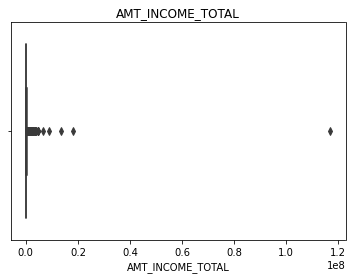

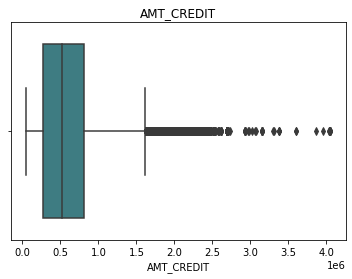

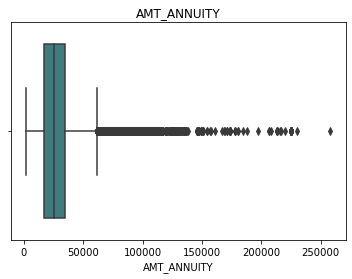

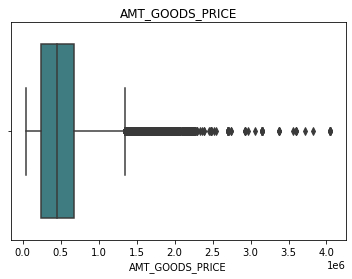

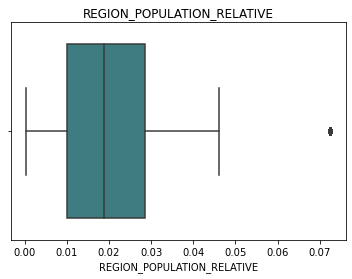

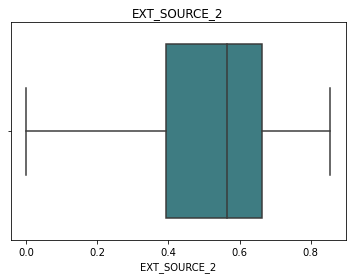

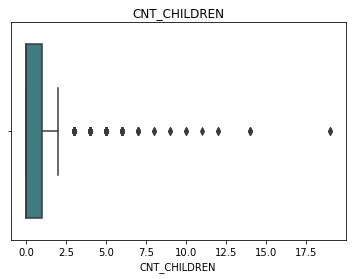

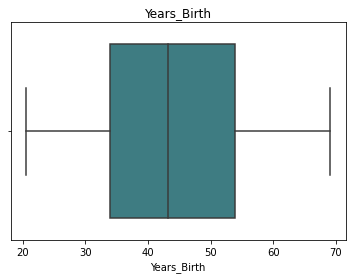

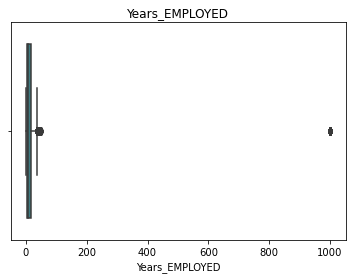

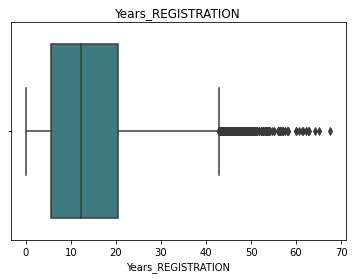

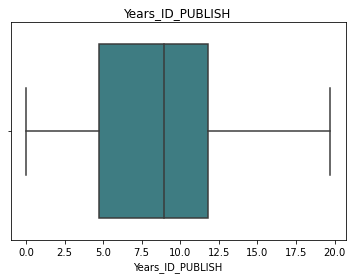

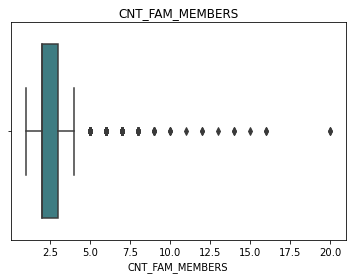

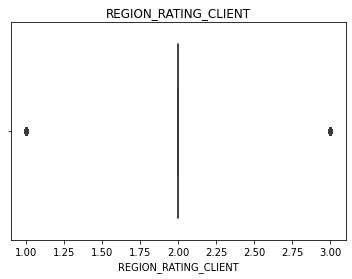

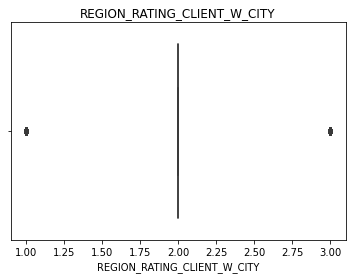

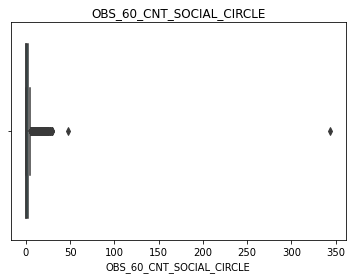

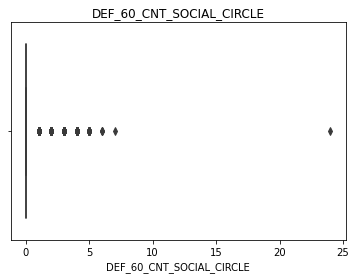

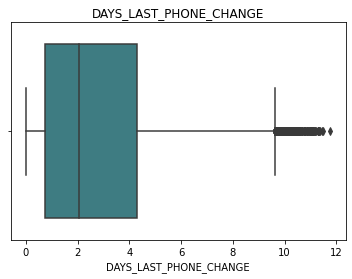

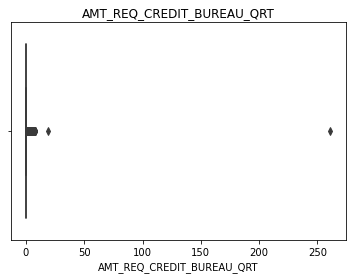

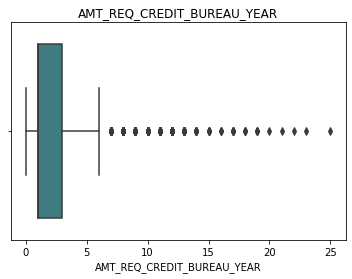

In [127]:
# plotting box plot to identify outliers
outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','EXT_SOURCE_2','CNT_CHILDREN',
 'Years_Birth',
 'Years_EMPLOYED',
 'Years_REGISTRATION',
 'Years_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']
for x in outlier:
    sns.boxplot(new_app[x],linewidth=1.5,palette='crest')
    plt.title(x)
    plt.show()

#### We can observe a few columns with abnormally high outliers like AMT_REQ_CREDIT_BUREAU_QRT, DEF_60_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, Years_EMPLOYED, AMT_INCOME_TOTAL

A few points from above plots: <br>
1) AMT_INCOME_TOTAL has high outlier indicating a few of the loan applicants have high income compared to the others ie data can be skewed towards abnormally high income.<br>
2) Years_BIRTH, EXT_SOURCE_2 and Years_ID_PUBLISH has no outlier, which means data available is correct.<br>
3) DAYS_EMPLOYED has outlier 1000 years which is impossible thus this incorrect entry.<br>
4) AMT_REQ_CREDIT_BUREAU_QRT has a outlier 250 value means some loanee's were checked thouroghly.<br>
5) REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT have outliers on the both sides 

#### Previous Application

In [128]:
pre_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670214e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     2.011815e+05   2.412823e+00      3.139511e+02   
std    3.185745e+05     2.808629e+05   2.134519e+00      7.127443e+03   
min    0.000000e+00     0.000000e+00   0.000000e+00     -1.000000e+00   
25%    2.416050e+04     6.750000e+04   7.700000e-01     -1.000000e+00   
50%    8.054100e+04     1.123200e+05   1.590000e+00      3.000000e+00   
75%    2.164185e+05     1.804050e+05   3.560000e+00      8.200000e+01   
max    6.905160e+06     6.905160e+06   8.010000e+00      4.000000e+06   

        CNT_PAYMENT  
count  1.670214e+06  
mean   1.515057e+01  
std    1.295220e+01  
min    0.000000e+00  
25%    1.000000e+01  
50%    1.200000e+01  
75%    1.600000e+01  
max    8.400000e+01

In [129]:
fltp = pre_app.loc[:, (pre_app.dtypes == 'float64')]
fltp = list(fltp)
fltp

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION']

In [130]:
intsp = pre_app.loc[:, (pre_app.dtypes == 'int64')]
intsp = list(intsp)
intsp

['SK_ID_PREV', 'SK_ID_CURR', 'SELLERPLACE_AREA', 'CNT_PAYMENT']

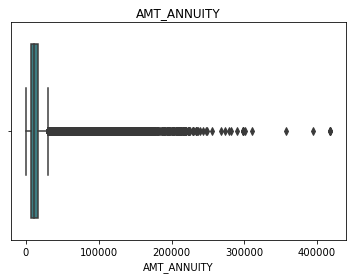

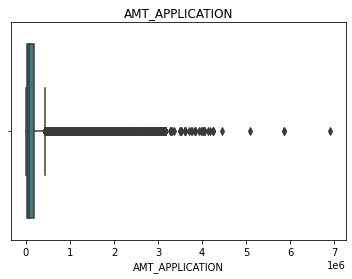

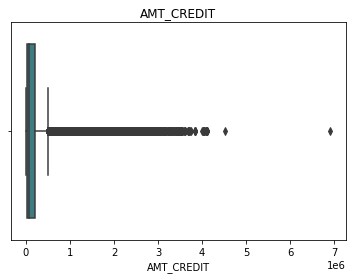

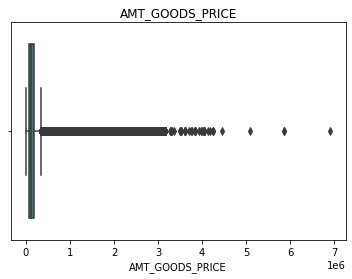

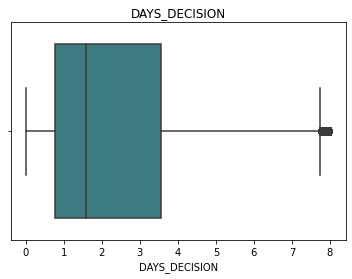

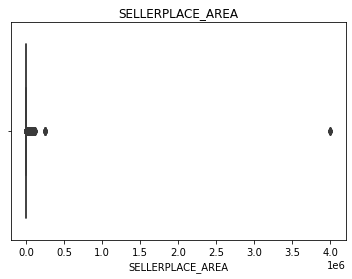

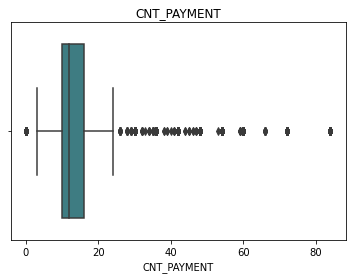

In [131]:
# plotting box plot to identify outliers
outlier_p = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']
for x in outlier_p:
    sns.boxplot(pre_app[x],linewidth=1.5,palette='crest')
    plt.title(x)
    plt.show()

#### We can observe a few columns with abnormally high outliers like AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA.

A few points from above plots: <br>
1) AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA(abnornally high) have a lot of outliers.<br>
2) CNT_PAYMENT has a few outliers.<br>
3) DAYS_DECISION has a very small number of outliers, meaning decision taken was quick. <br>

## Binning Continuous variables

#### New Application

In [132]:
#Binning AMT_INCOME_TOTAL
new_app['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [133]:
#converting income into categorical variable
new_app['Income_Group']=pd.qcut(new_app['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [134]:
new_app['Income_Group'].value_counts(normalize=True)*100

Medium      27.414304
High        24.556195
Low         21.848649
VeryHigh    15.322379
VeryLow     10.858473
Name: Income_Group, dtype: float64

#### Around 72% loan applicants have income between low and high

In [135]:
new_app['Years_Birth'].value_counts()

36.79    129
37.35    125
36.93    125
27.45    125
38.68    125
        ... 
21.03      2
21.02      1
69.12      1
20.52      1
69.01      1
Name: Years_Birth, Length: 4805, dtype: int64

In [136]:
#Binning Years_BIRTH
bins = [20,30,50,70]
new_app['Age_Group']=pd.cut(new_app['Years_Birth'],bins=bins,labels=['Young Adults','Mid Adults','Senior Adults'])

In [137]:
new_app['Age_Group'].value_counts()

Mid Adults       158842
Senior Adults    103628
Young Adults      45041
Name: Age_Group, dtype: int64

#### More than 50% of loan applicants are over 40 years old.

In [138]:
bins = [0,5,10,20,30,40,50]
employed_years = ['0-5','5-10','10-20','20-30','30-40','40-50']

new_app['Employed']=pd.cut(new_app['Years_EMPLOYED'],bins=bins,labels=['0-5','5-10','10-20','20-30','30-40','40-50']
                                )

In [139]:
new_app['Years_EMPLOYED'].value_counts(normalize=True)*100

1000.67    18.007161
0.55        0.177880
0.59        0.168449
0.61        0.166498
0.53        0.165197
             ...    
45.18       0.000325
35.99       0.000325
39.46       0.000325
44.12       0.000325
37.18       0.000325
Name: Years_EMPLOYED, Length: 4056, dtype: float64

#### Around 93% of applicant have less than 20 years work experience

#### Previous Application

# Data Analysis

#### Imbalance Analyasis

In [140]:
new_app['Target'].value_counts(normalize=True)*100 #['0','1'],['Yes','No']

Yes    91.927118
No      8.072882
Name: Target, dtype: float64

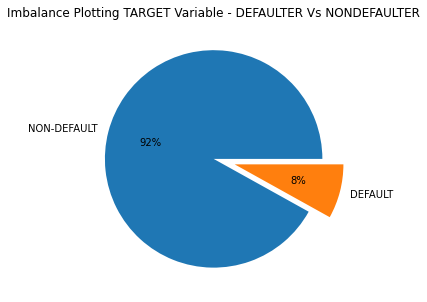

In [141]:
# Target Variable
plt.figure(figsize=[10,5])
plt.pie(new_app['Target'].value_counts(normalize=True)*100,labels=['NON-DEFAULT','DEFAULT'],explode=(0,0.2),autopct='%1.f%%')
plt.title('Imbalance Plotting TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()


### Its clear that there is an imbalance between people who defaulted and who didn't default. Around 92% of people pay their loan as opposed to 8% who defaulted.

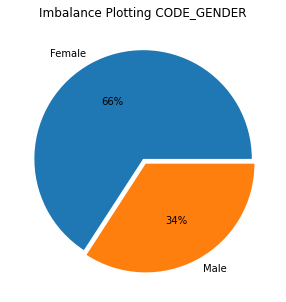

In [142]:
# Looking for Gender Imbalance
plt.figure(figsize=[20,5])
plt.pie(new_app['CODE_GENDER'].value_counts(normalize=True)*100,labels=['Female','Male'],explode=(0,0.05),autopct='%1.f%%')
plt.title('Imbalance Plotting CODE_GENDER')
plt.show()

### Females are almost double the number of males, who have applied for loan

## Splitting the dataframe into two separate dataframe into Defaulters and Non-Defaulter

In [143]:
new_app0=new_app[new_app['Target']=='Yes']    # Dataframe with all the data related to non-defaulters
new_app1=new_app[new_app['Target']=='No']   # Dataframe with all the data related to defaulters

In [144]:
new_app0.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

In [145]:
def UniPlot(variable):
    x = new_app0[variable].value_counts(normalize = True)*100
    y = new_app1[variable].value_counts(normalize = True)*100
    
    sns.despine
    
    fig1,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

    fig2,(ax3,ax4) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
   
    sns.countplot(x = variable, data = new_app0, palette = 'viridis', ax=ax1)
    ax1.set_title(f'Distribution of {variable} for Defaulters')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
   
    sns.countplot(x = variable, data = new_app1, palette ='viridis',ax=ax2)
    ax2.set_title(f'Distribution of {variable} for Non-Defaulters')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
   
    #creating percentage datafarme to make analysis based on percetage of defaulters
    percent = new_app[[variable, 'TARGET']].groupby([variable],as_index=False).mean()
    percent["TARGET"] = percent["TARGET"]*100
    percent.sort_values(by='TARGET', ascending=False, inplace=True)
   
    sns.barplot( x = variable, y='TARGET', order=percent[variable], data=percent, palette='viridis',ax=ax4)
    ax4.set_title(f'Percentage of Defaulter for {variable}')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
    
    sns.countplot(x = variable, data = new_app, palette ='viridis', ax=ax3)
    ax3.set_title(f'Total Distribution of {variable}')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()
    

In [146]:
new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

### Univariate Analysis

#####  Univariate Categorical Variables

##### Contract Type

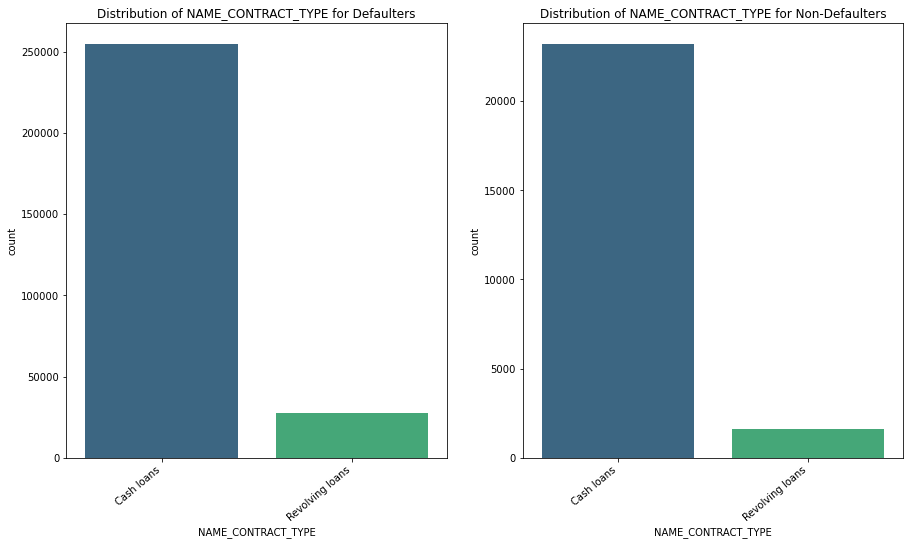

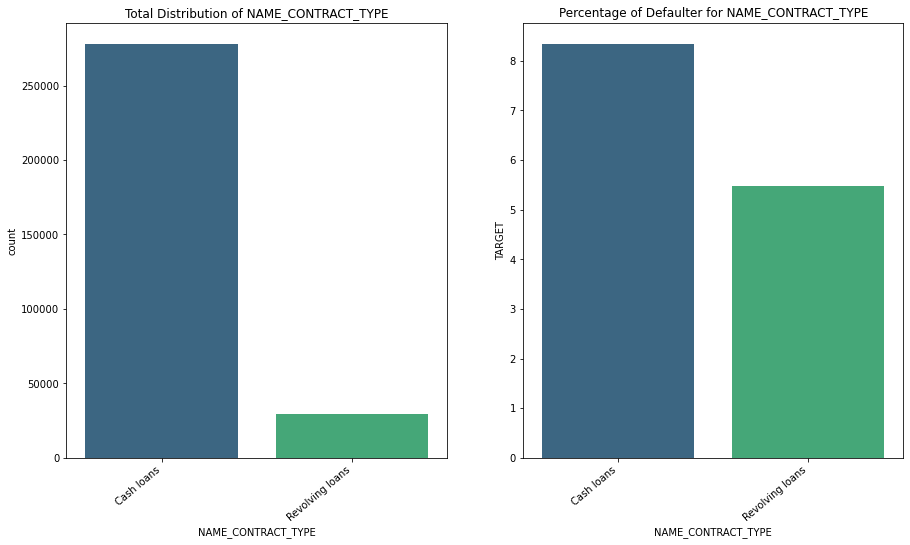

In [147]:
# plotting 'NAME_CONTRACT_TYPE' counts
UniPlot('NAME_CONTRACT_TYPE')

###### Clients Prefer Cash Loans and Cash Loans are also the most defaulted type
Revolving loans are just a fraction of Cash loans.

#### Who Accompanied the Client

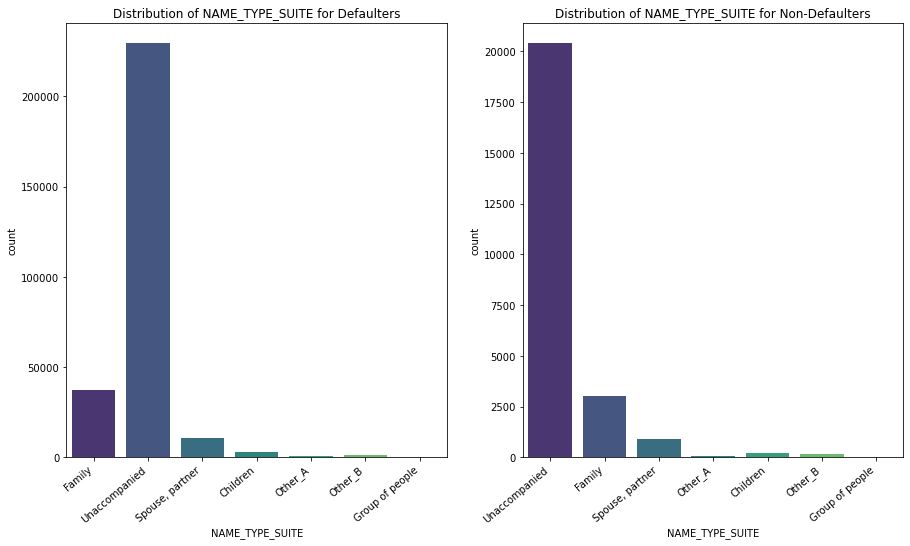

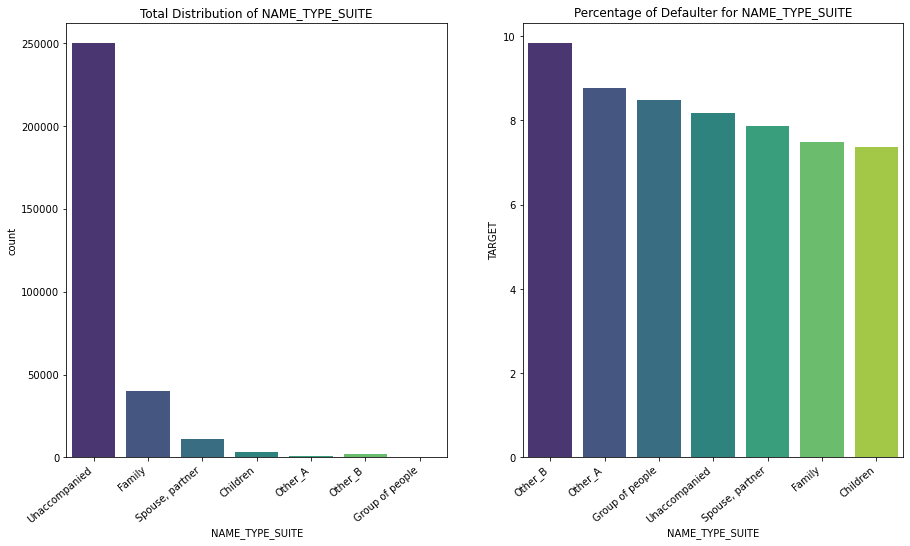

In [148]:
UniPlot('NAME_TYPE_SUITE')

#### GENDER

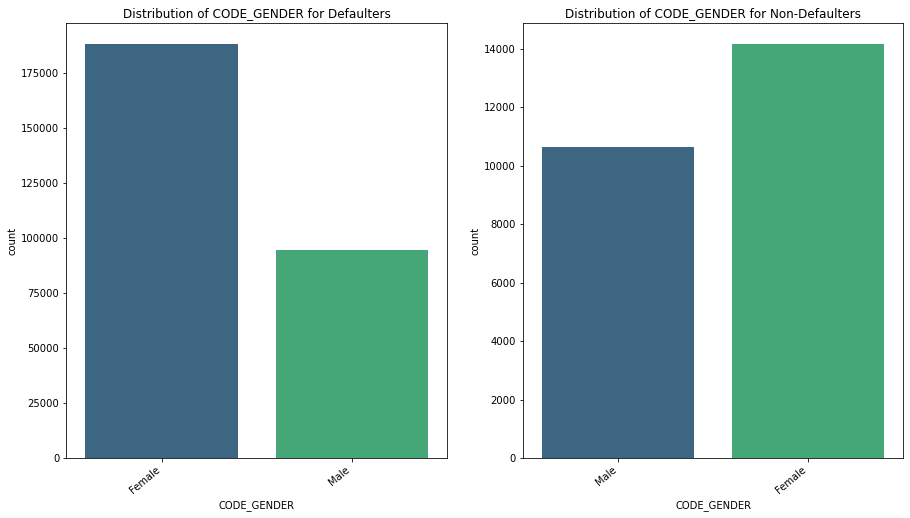

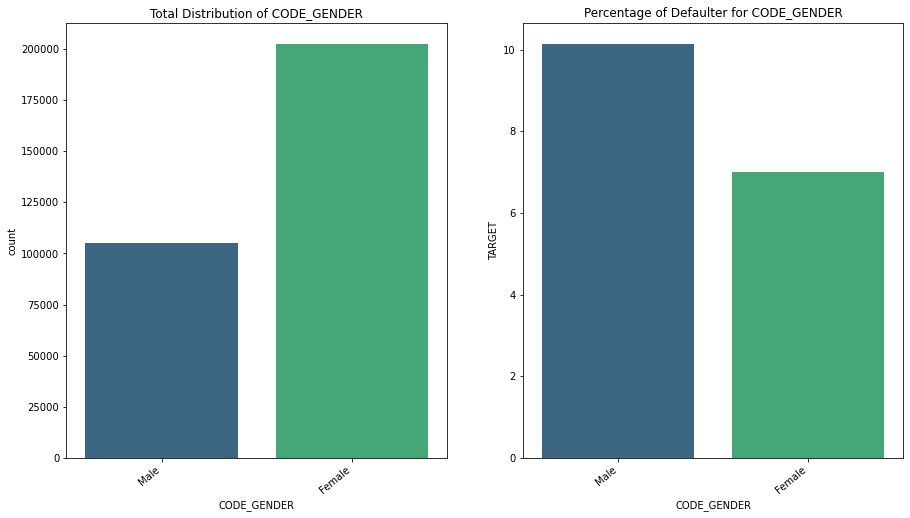

In [149]:
# plotting 'CODE_GENDER' counts
UniPlot('CODE_GENDER')

##### The loan application of female clients is almost double the number of male clients. 
##### Female defaulters are high since they make large application.
##### However, defaulte rate of females is lower than males. Thus males have higher chance of defaulting. 

#### INCOME TYPE

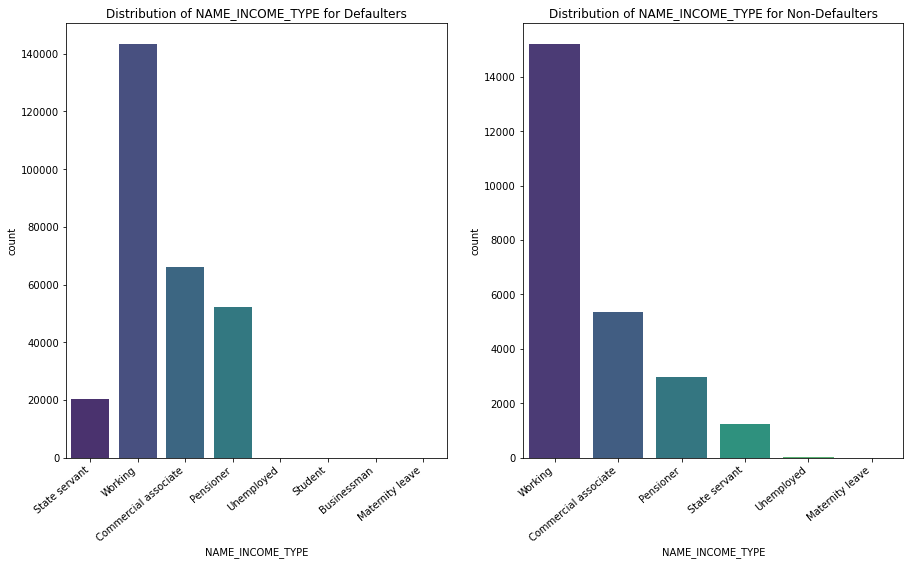

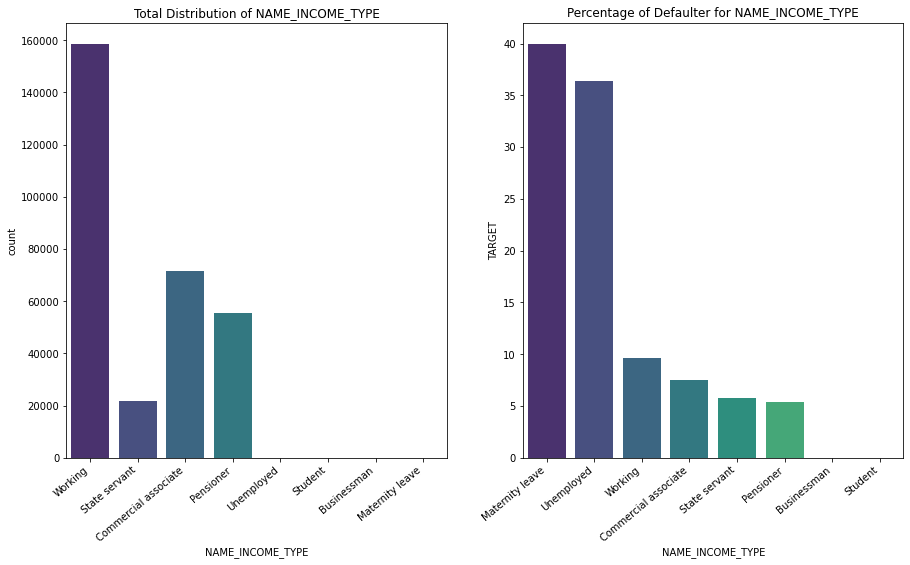

In [150]:
# plotting 'NAME_INCOME_TYPE' counts
UniPlot('NAME_INCOME_TYPE')

##### Large chunk of clients are Working, followed by Commercial associate, Pensioner and State servant.
##### Working clients have high chance of defaulting (almost double chance of default to possible defaulter Commercial Associate) , whereas State Servent have the lowest default rate.
##### The remaining income types are very small, thus difficult to make decision

#### income_Group

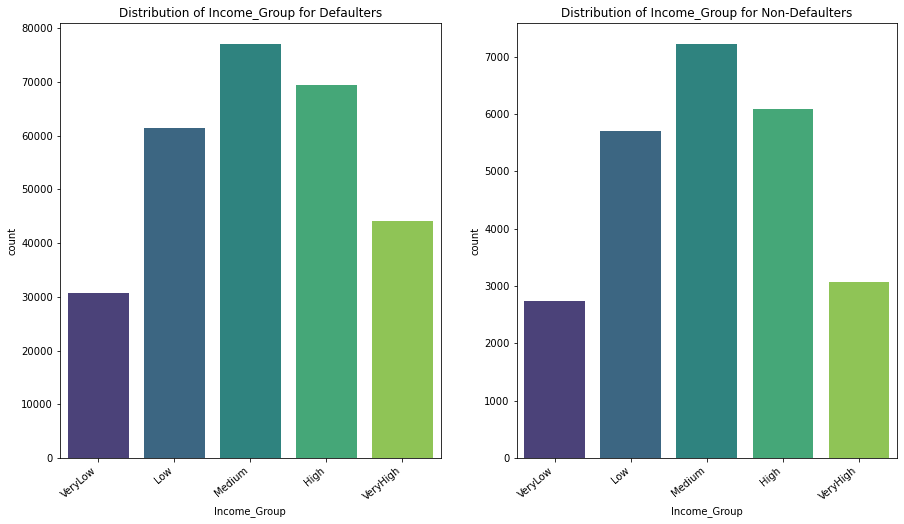

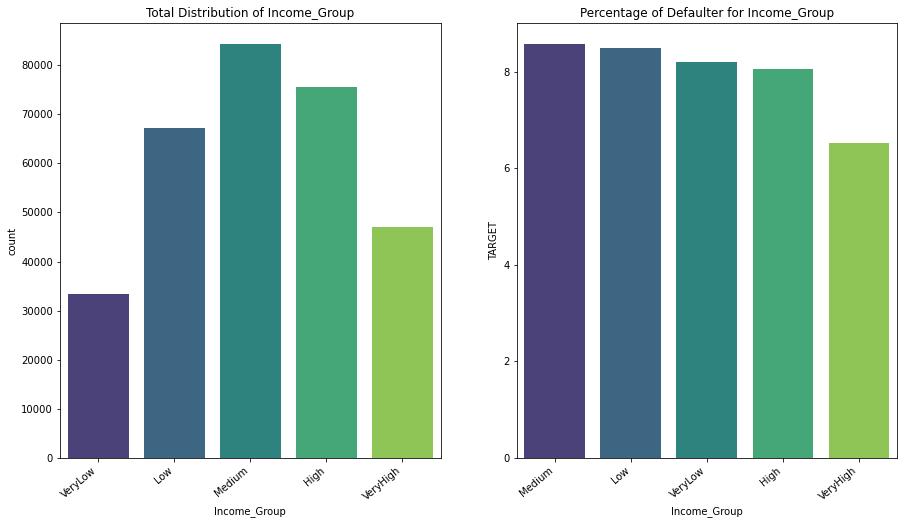

In [151]:
# plotting based on 'Income_Group' counts
UniPlot('Income_Group')

##### Most of the clients have income range between Very Low to Medium Income. Have higher chance of defaulting. But if we see Medium Income group have highest application and high chance of deafualting
##### 

#### NAME_FAMILY_STATUS

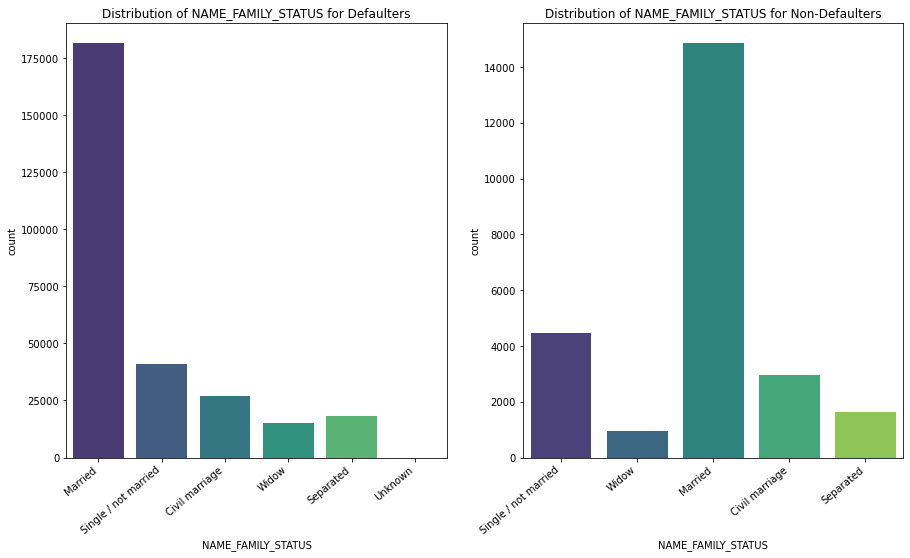

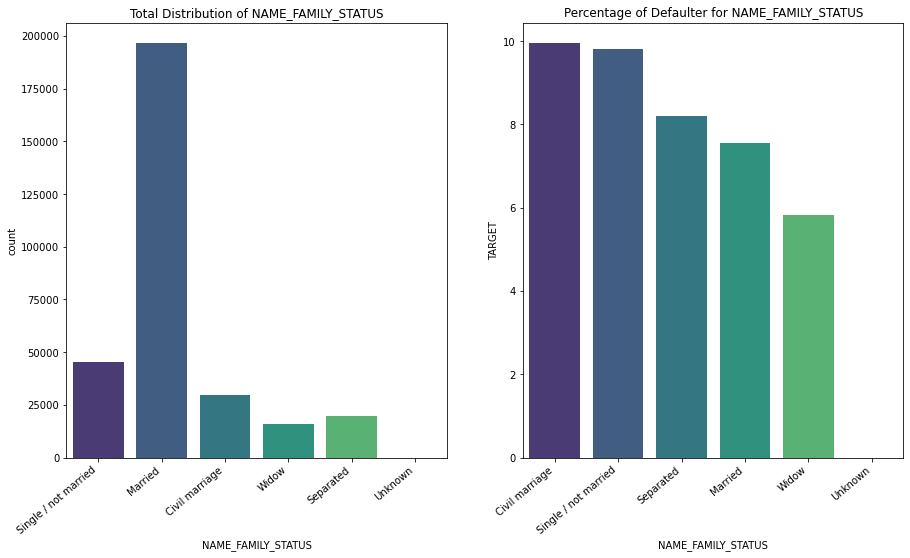

In [152]:
# plotting based on 'NAME_FAMILY_STATUS' counts
UniPlot('NAME_FAMILY_STATUS')

#### NAME_HOUSING_TYPE

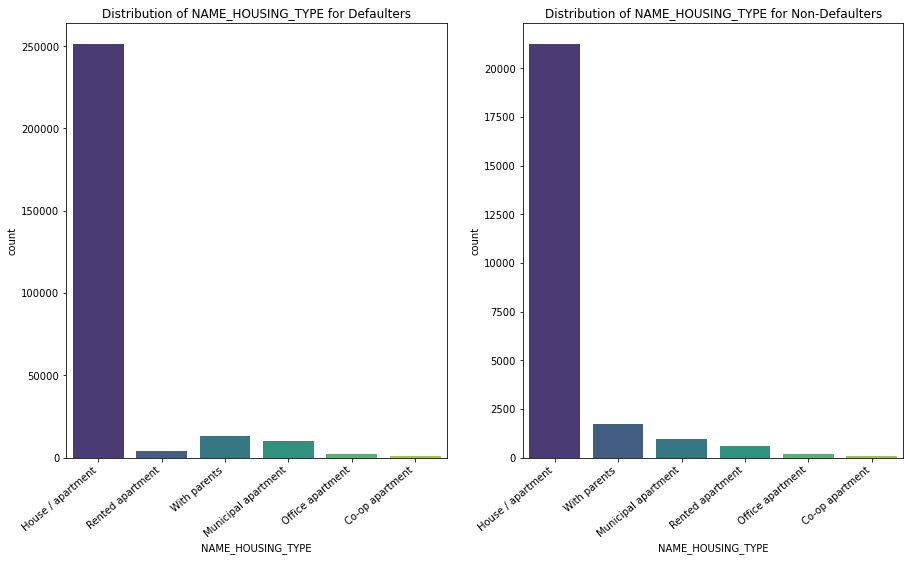

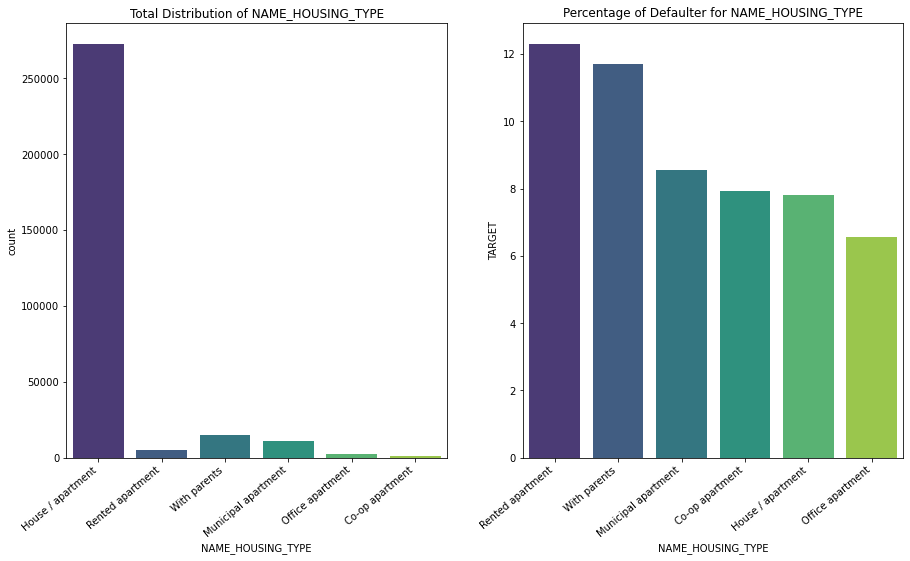

In [153]:
# plotting based on 'NAME_HOUSING_TYPE' counts
UniPlot('NAME_HOUSING_TYPE')

#### NAME_EDUCATION_TYPE

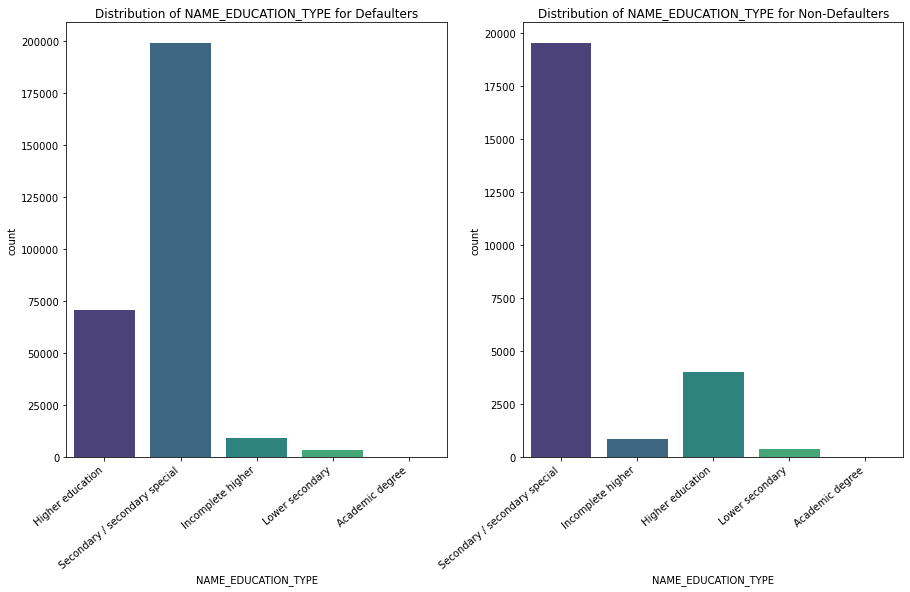

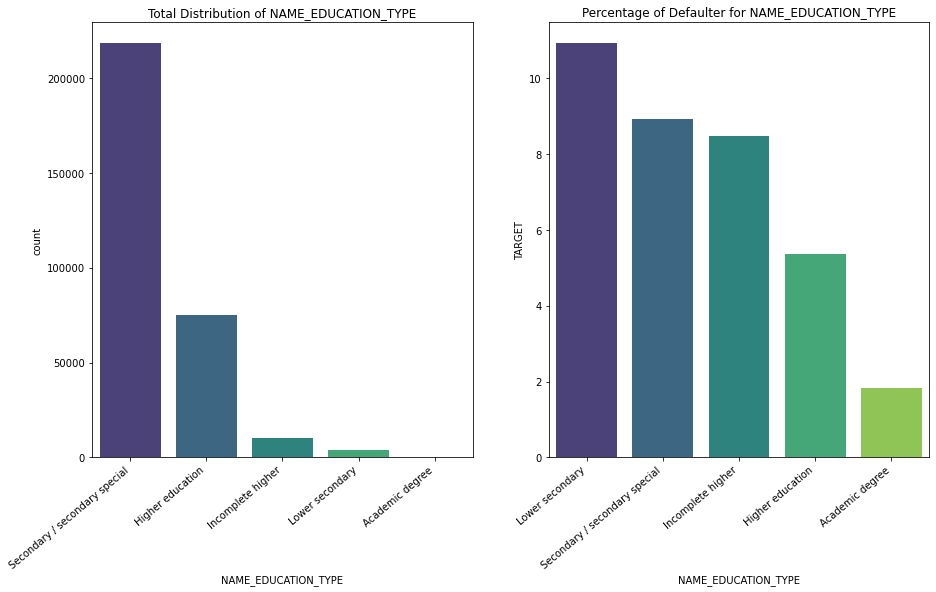

In [154]:
# plotting based on 'NAME_EDUCATION_TYPE' counts
UniPlot('NAME_EDUCATION_TYPE')

#### OCCUPATION_TYPE

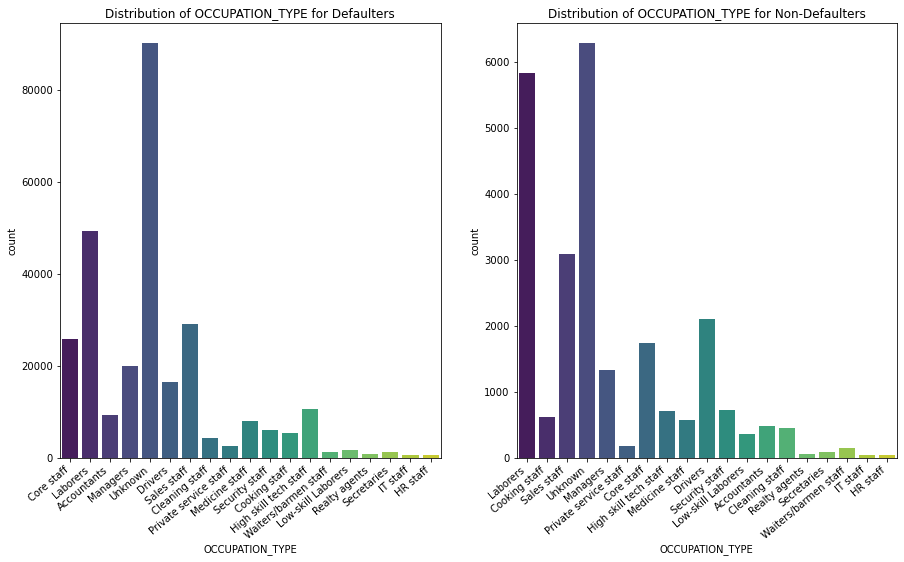

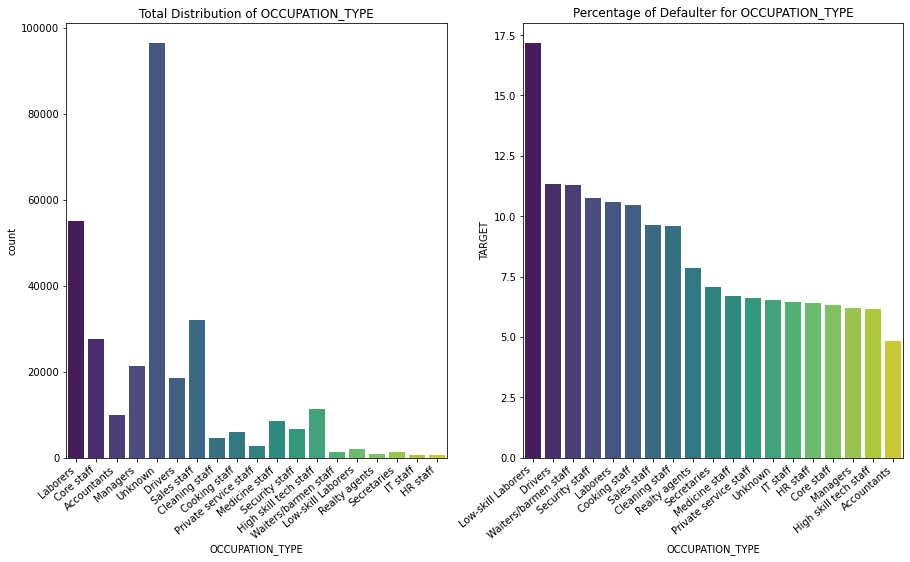

In [155]:
# plotting based on 'OCCUPATION_TYPE' counts
UniPlot('OCCUPATION_TYPE')

#### Age_Group

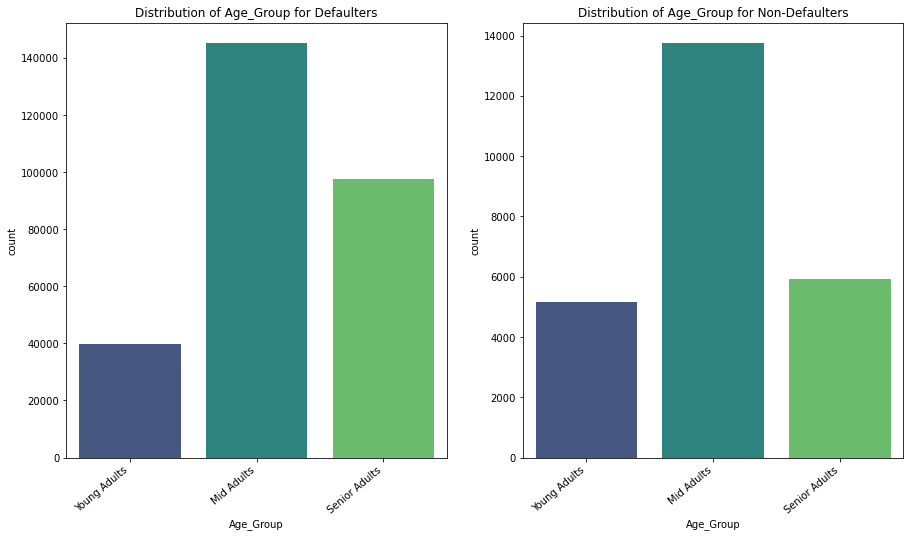

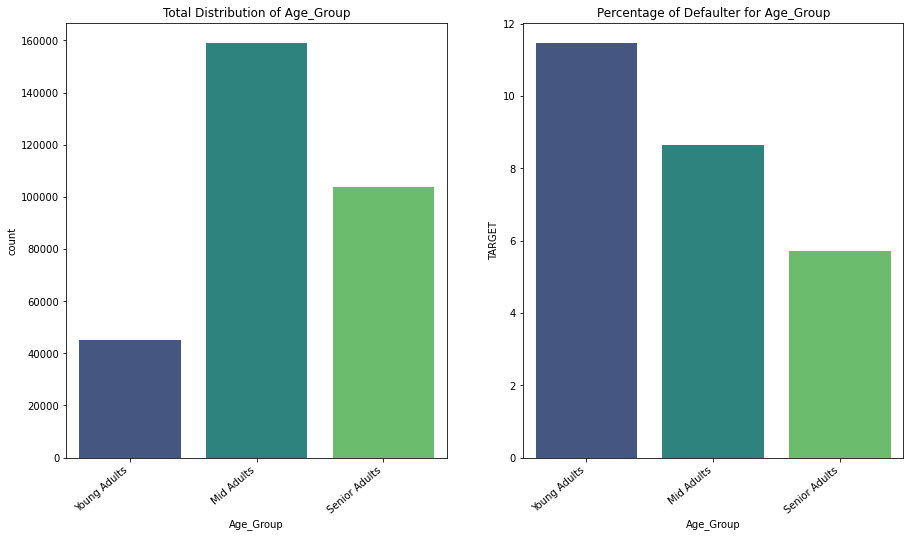

In [156]:
# plotting based on 'Age_Group' counts
UniPlot('Age_Group')

#### FLAG_DOCUMENT_3

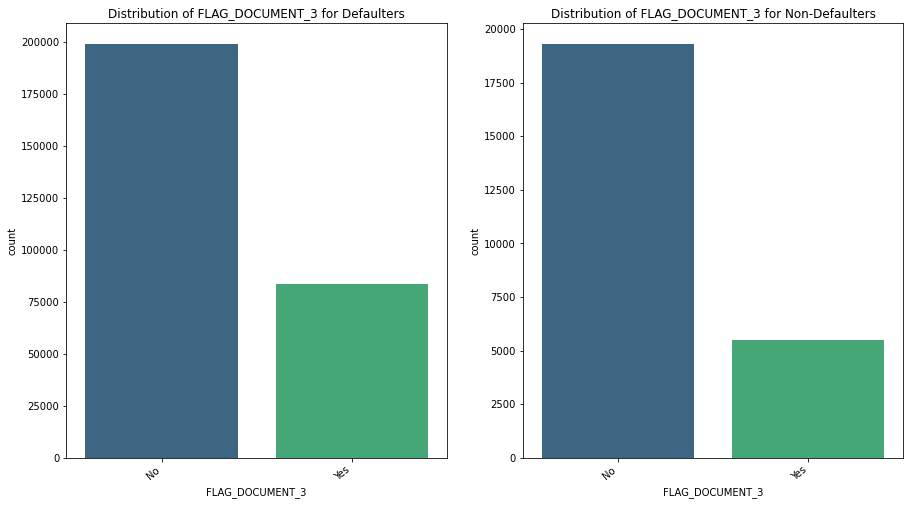

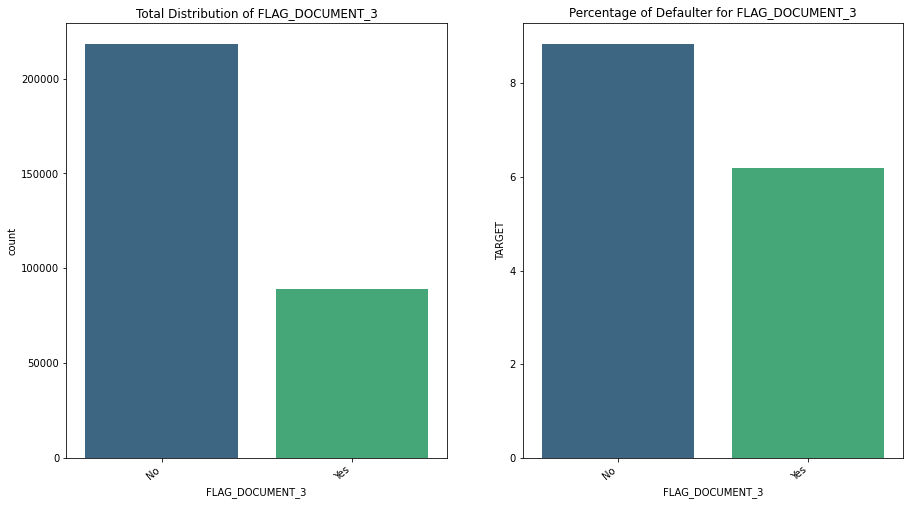

In [157]:
# plotting based on 'FLAG_DOCUMENT_3' counts
UniPlot('FLAG_DOCUMENT_3')

#### ORGANIZATION_TYPE

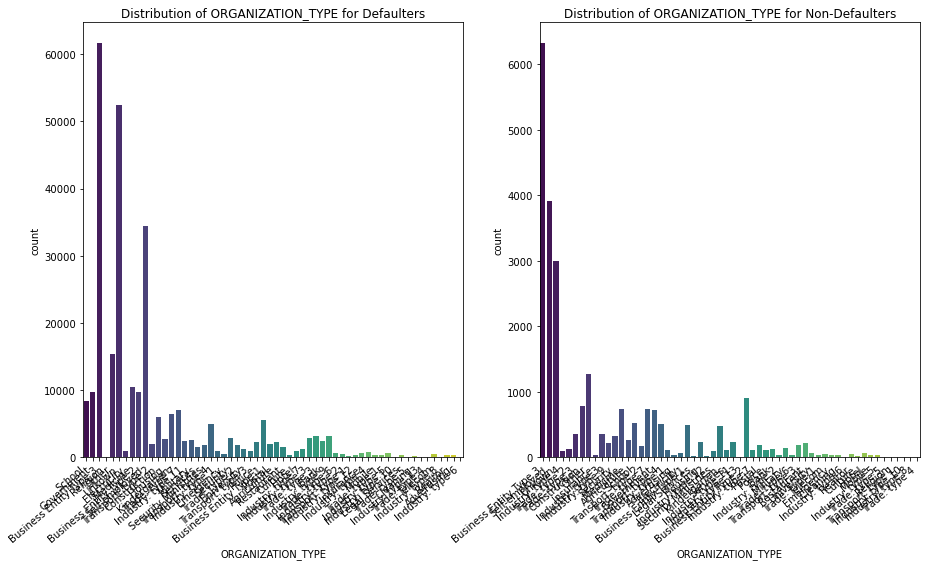

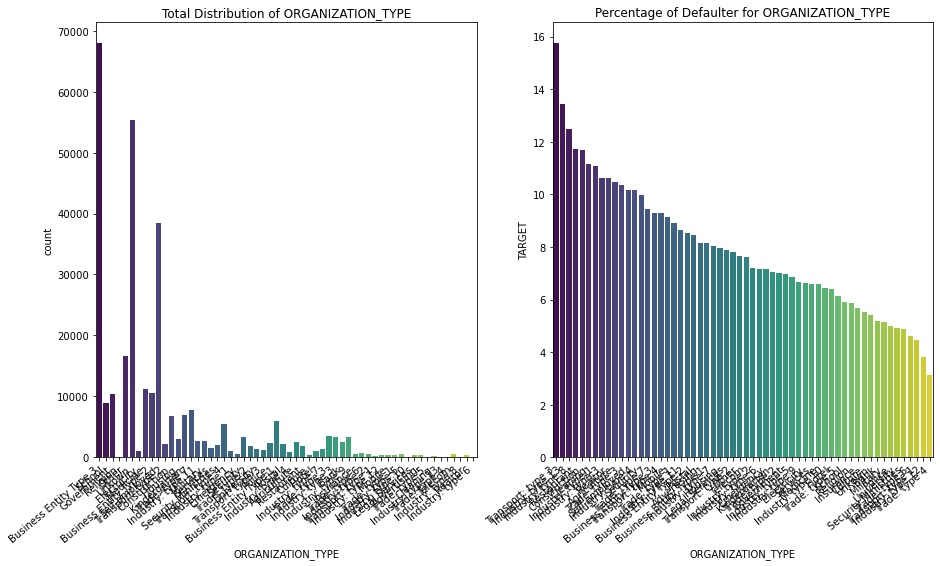

In [158]:
# plotting based on 'ORGANIZATION_TYPE' counts
figsize=(20,6)
UniPlot('ORGANIZATION_TYPE')

#### Car Ownership

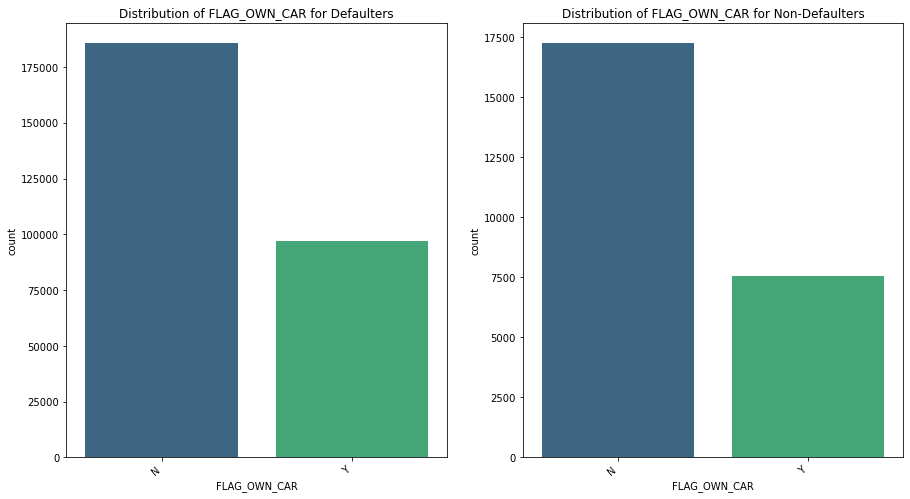

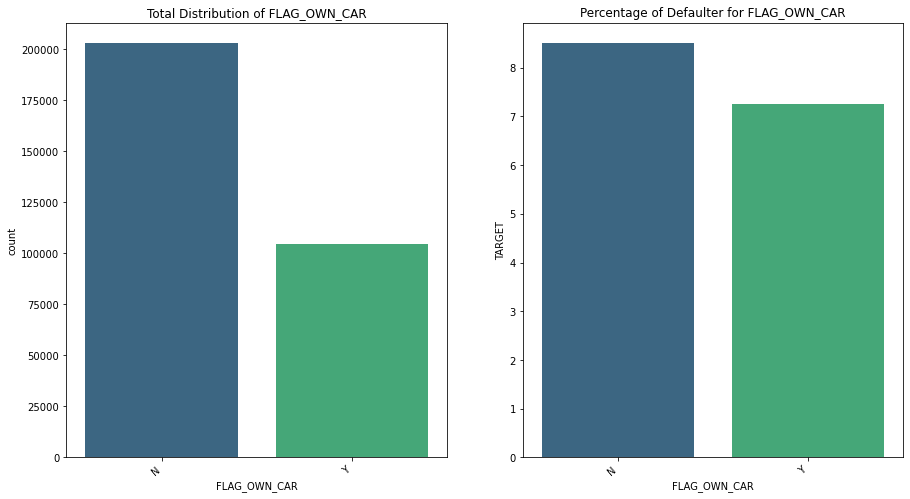

In [159]:
# plotting based on 'FLAG_OWN_CAR' counts
UniPlot('FLAG_OWN_CAR')

#### Years Employed

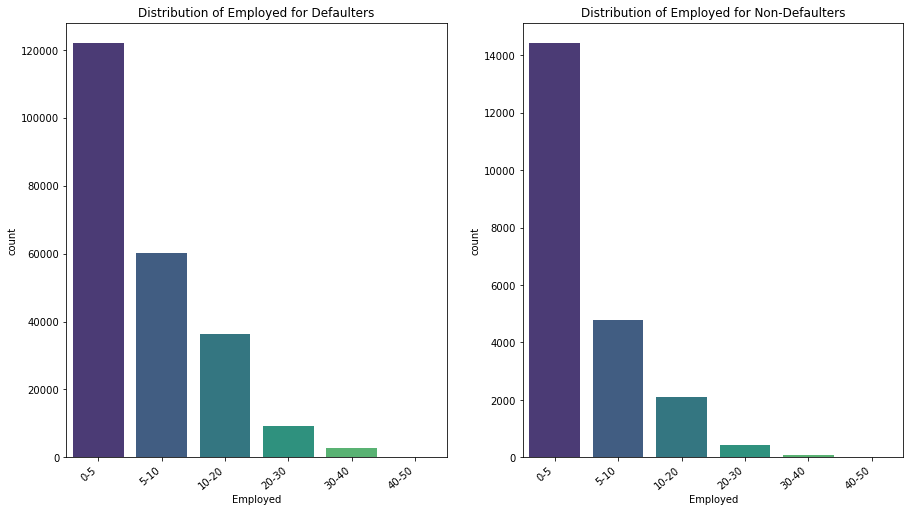

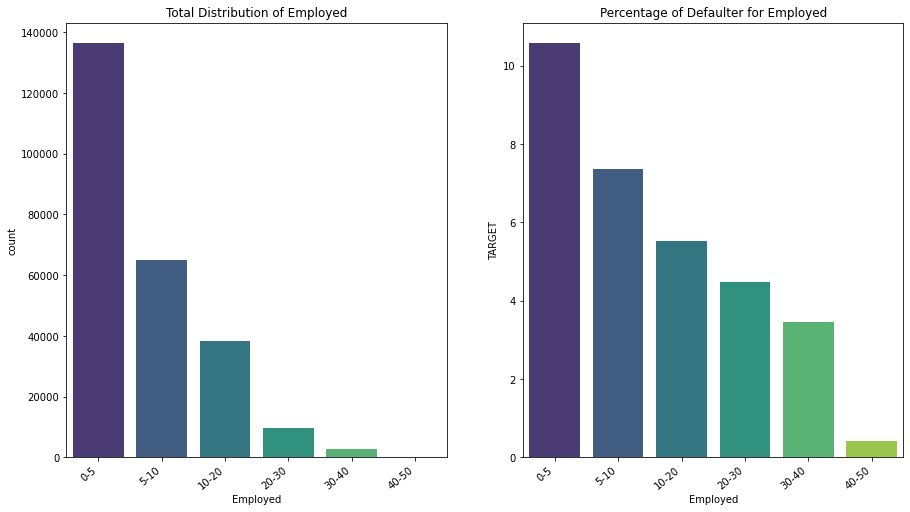

In [160]:
UniPlot('Employed')

## Univariate Continuous Variable Analysis

In [161]:
#ploting function
def unicont(variable):

    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    #fig2,(ax3) = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    
    
    sns.distplot(new_app0, x=new_app0[variable],ax=ax1,bins=30,color='r',hist=False)
    ax1.set_title(f'Distribution of {variable} for Non-Defaulters vs Defaulters',fontsize=15)
    #ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
   # plt.legend(['Non-Defaulters'])
    ax1.legend(['Non-Defaulters','Defaulter'])
    
    sns.distplot(a=new_app1[variable],ax=ax1,bins=30,color='b',hist=False)
    #ax2.set_title(f'Distribution of {variable} for Defaulters',fontsize=15)    
    #ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right") 
    #.legend(['Defaulter'])
    ax1.legend(['Non-Defaulters','Defaulter'])
    
    sns.distplot(a=new_app[variable],ax=ax2,bins=30,hist=False)
    ax2.set_title(f'Total Distribution of {variable}')
    #ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

##### Number Children

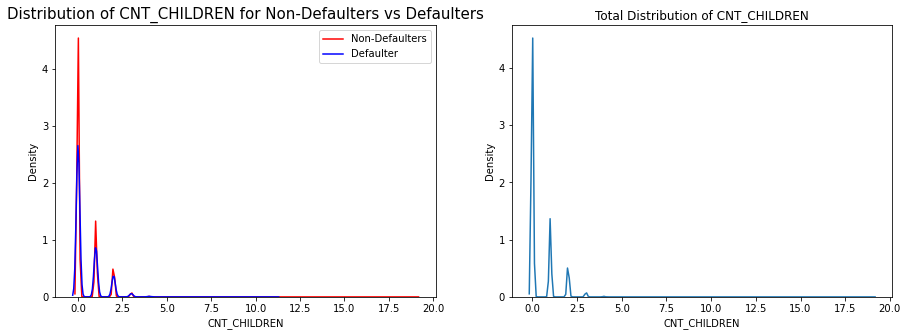

In [162]:
unicont('CNT_CHILDREN')

##### Credit Ammount

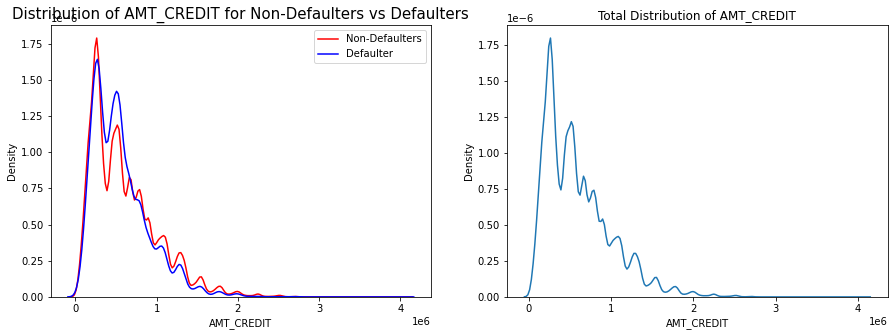

In [163]:
unicont('AMT_CREDIT')

##### Annuity Ammount

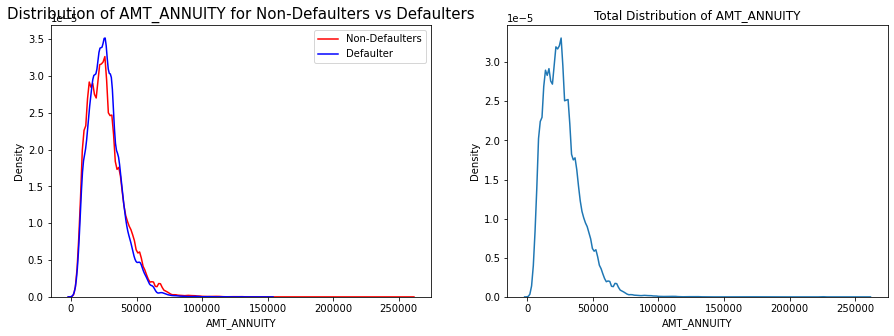

In [164]:
unicont('AMT_ANNUITY')

##### Total Annual Income

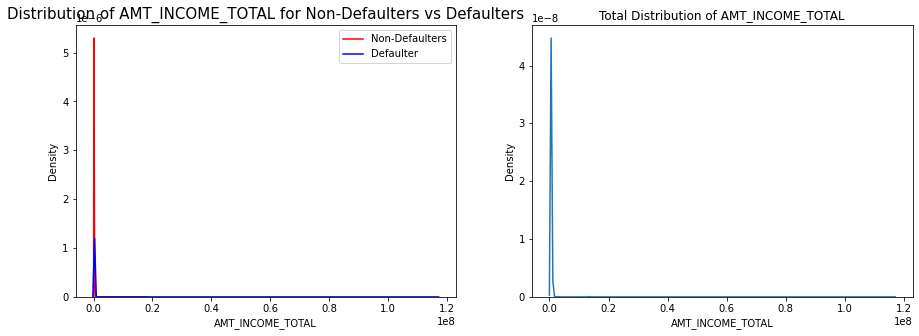

In [165]:
unicont('AMT_INCOME_TOTAL')

###### External Source of Rating 2

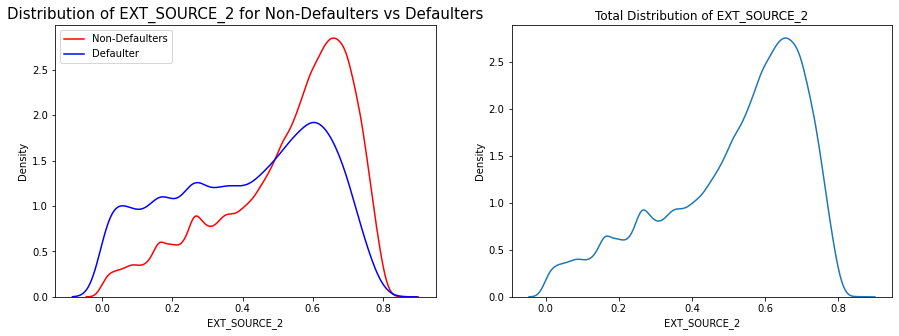

In [166]:
unicont('EXT_SOURCE_2')

##### Credit Bureau Contacted in a Year

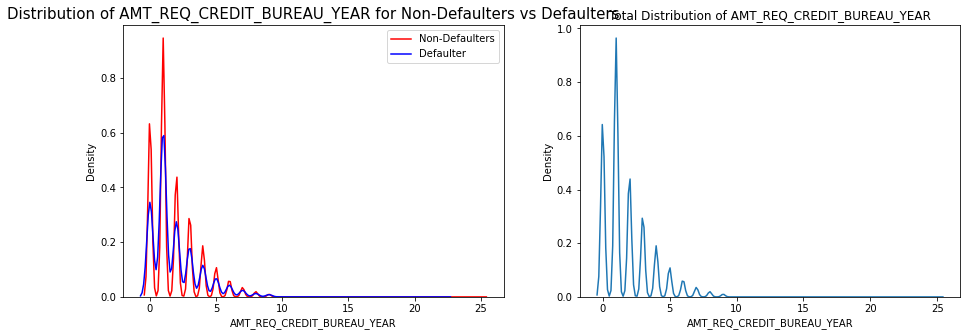

In [167]:
unicont('AMT_REQ_CREDIT_BUREAU_YEAR')

### Segmented Data Analysis

In [168]:
# Custom Function to plot 
def SegPlot(variable,hue=None):
    x = new_app0[variable].value_counts(normalize = True)*100
    y = new_app1[variable].value_counts(normalize = True)*100
    
    sns.despine
    
    fig1,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
    fig2,(ax3) = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    
    sns.countplot(x = variable, data = new_app0,hue=hue, palette = 'bone', ax=ax1)
    ax1.set_title(f'Distribution of {variable} vs {hue} for Defaulters')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

    
    sns.countplot(x = variable, data = new_app1,hue=hue, palette ='bone',ax=ax2)
    ax2.set_title(f'Distribution of {variable} vs {hue} for Non-Defaulters')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    
    sns.countplot(x = variable, data = new_app,hue=hue,ax=ax3,palette ='bone')
    ax3.set_title(f'Total Distribution of {variable} vs {hue}')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    

#### Age vs Income

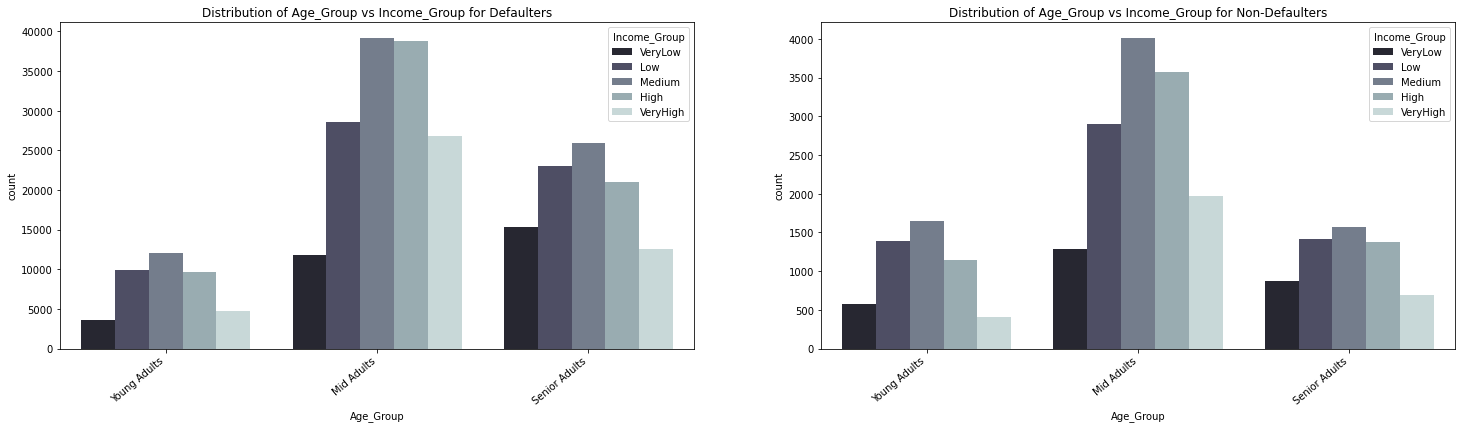

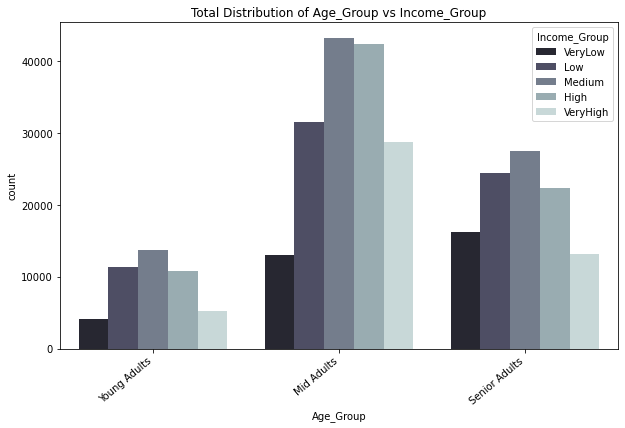

In [169]:
SegPlot('Age_Group',hue='Income_Group')

#### Income vs Education

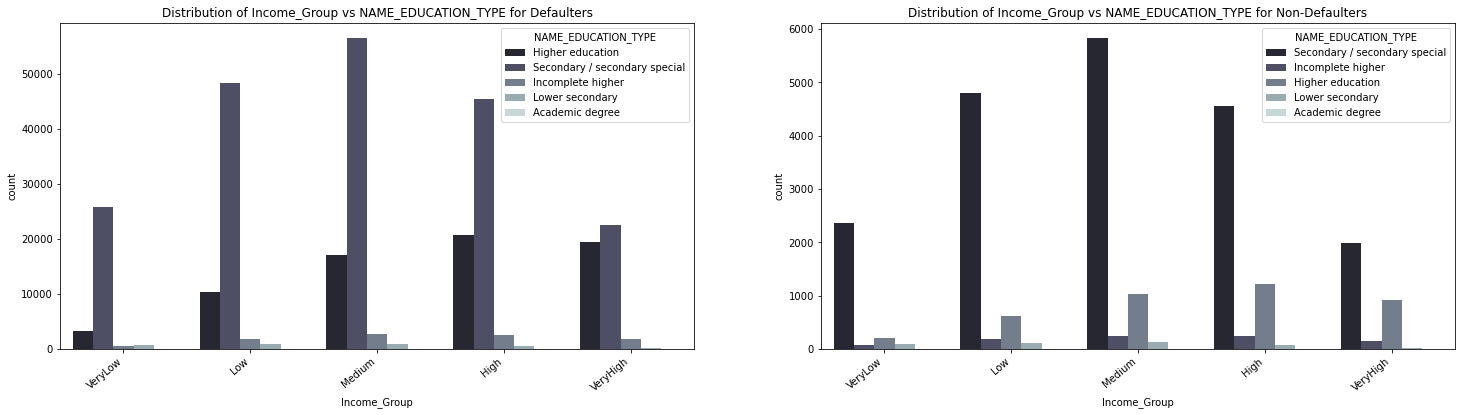

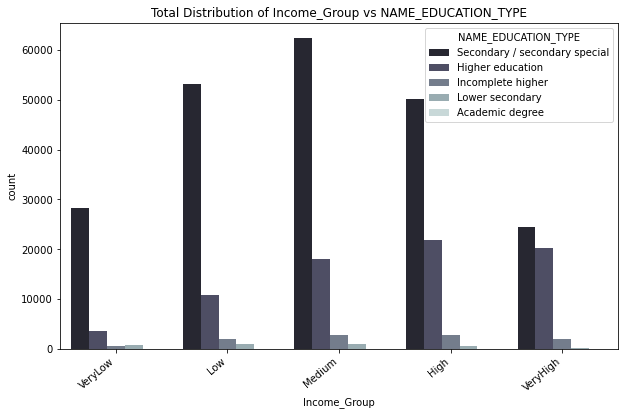

In [170]:
SegPlot('Income_Group',hue='NAME_EDUCATION_TYPE')

#### Income vs Occupation

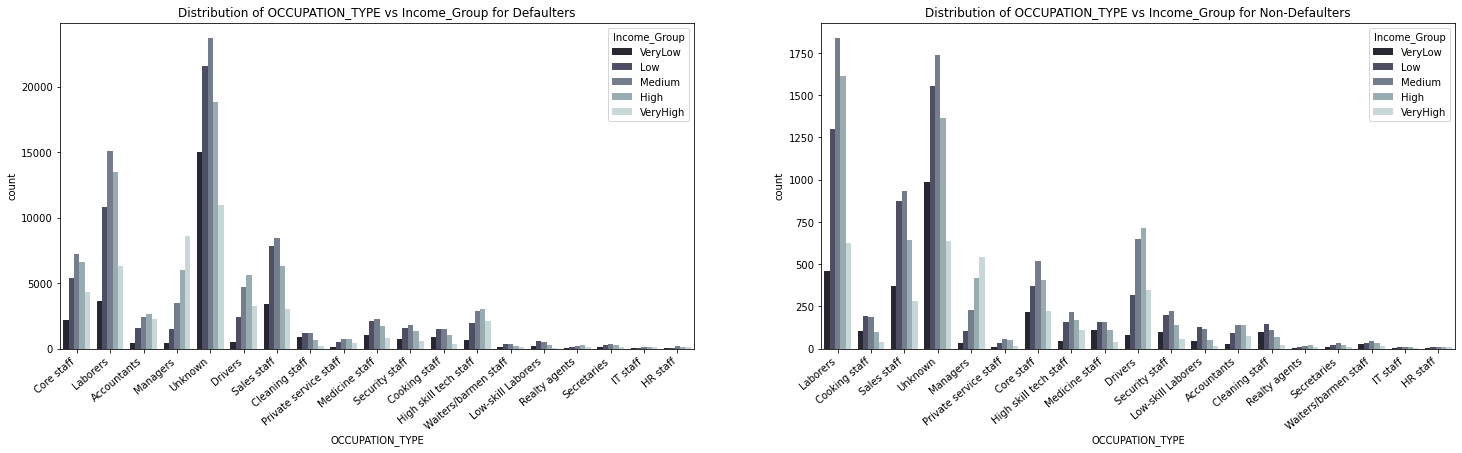

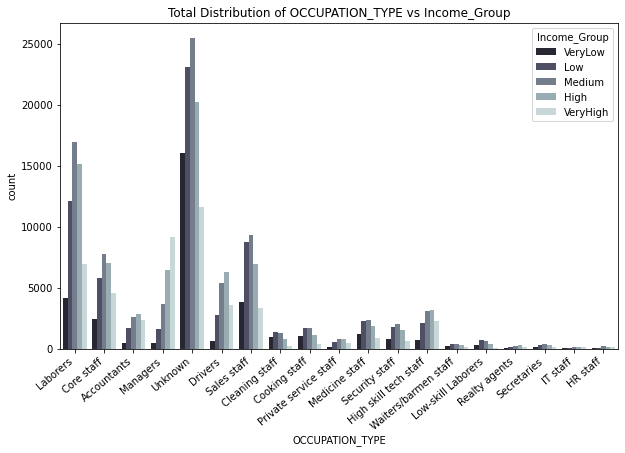

In [171]:
SegPlot('OCCUPATION_TYPE',hue='Income_Group')

#### Contract Type vs Income

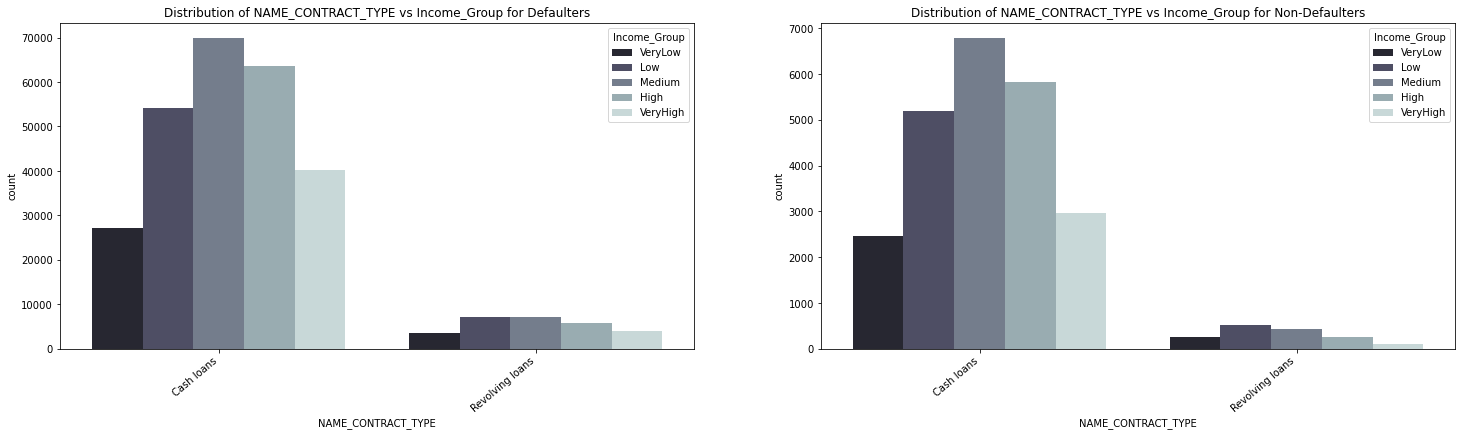

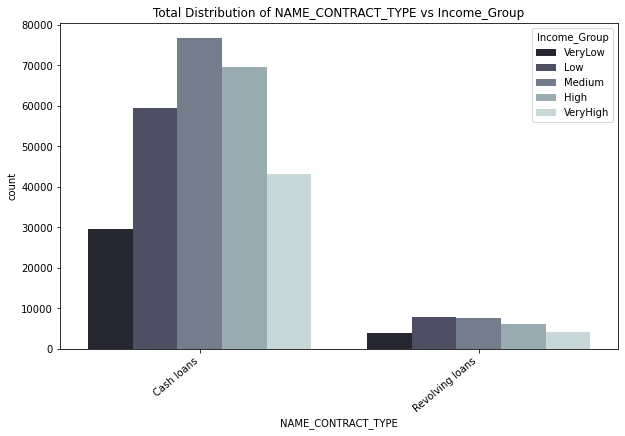

In [172]:
SegPlot('NAME_CONTRACT_TYPE',hue='Income_Group')

#### Organization vs Income

In [173]:
#SegPlot('ORGANIZATION_TYPE',hue='Income_Group')
def SegPlot_m(variable,hue=None):
    sns.despine
    
    fig1,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
    fig2,(ax3) = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    
    sns.countplot(x = variable, data = new_app0,hue=hue, palette = 'bone', ax=ax1)
    ax1.set_title(f'Distribution of {variable} vs {hue} for Defaulters')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")

    
    sns.countplot(x = variable, data = new_app1,hue=hue, palette ='bone',ax=ax2)
    ax2.set_title(f'Distribution of {variable} vs {hue} for Non-Defaulters')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
    
    
    sns.countplot(x = variable, data = new_app,hue=hue,ax=ax3,palette ='bone')
    ax3.set_title(f'Total Distribution of {variable} vs {hue}')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha="right")
    plt.show()

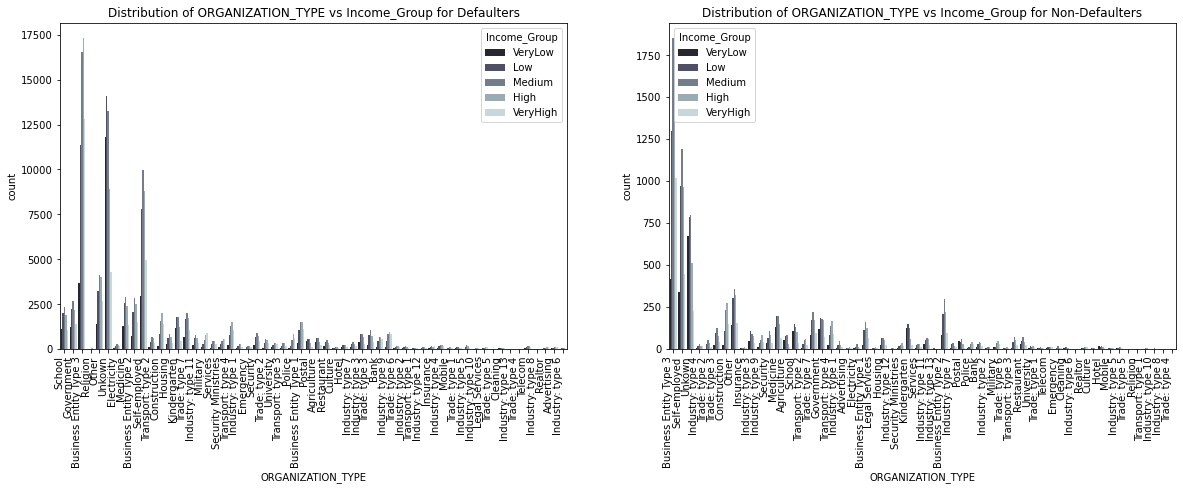

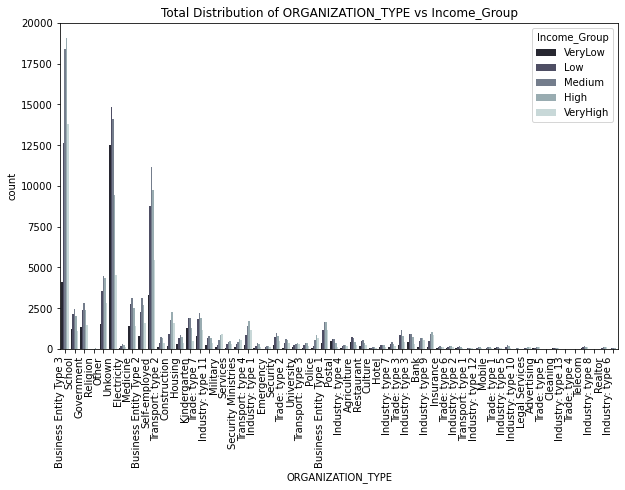

In [174]:
SegPlot_m('ORGANIZATION_TYPE',hue='Income_Group')

## Bivariate Analysis on Numerical Columns

#### For Defaulters (Target=1)

In [175]:
int6 = new_app1.loc[:, new_app1.dtypes == 'int64']
flt6 = new_app1.loc[:, new_app1.dtypes == 'float64']

In [176]:
bi_var1 = pd.concat([flt6,int6],axis=1) # creating new DF for bi-variate analysis

In [177]:
bi_var1.drop('TARGET',axis=1,inplace = True)

#### Correlation Between Continuous Variables

In [178]:
corr1 = bi_var1.corr()
corr1

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.038131     0.046421   
AMT_CREDIT                           0.038131    1.000000     0.752195   
AMT_ANNUITY                          0.046421    0.752195     1.000000   
AMT_GOODS_PRICE                      0.037591    0.982783     0.752295   
REGION_POPULATION_RELATIVE           0.009135    0.069161     0.071690   
Years_Birth                         -0.003097    0.135316     0.014303   
Years_EMPLOYED                      -0.014977    0.001930    -0.081207   
Years_REGISTRATION                  -0.000155    0.025852    -0.034282   
Years_ID_PUBLISH                     0.004213    0.052332     0.016770   
EXT_SOURCE_2                         0.007097    0.120289     0.115615   
DAYS_LAST_PHONE_CHANGE               0.002431    0.110865     0.079873   
SK_ID_CURR                          -0.010165   -0.001290    -0.007578   
CNT_CHILDREN                         0.004796   -0.001675     0.031257   
CNT_FAM_MEMBERS                      0.006654    0.051224     0.075711   
REGION_RATING_CLIENT                -0.021486   -0.059193    -0.073784   
REGION_RATING_CLIENT_W_CITY         -0.022808   -0.071377    -0.089291   
OBS_60_CNT_SOCIAL_CIRCLE            -0.004588    0.020242     0.006465   
DEF_60_CNT_SOCIAL_CIRCLE            -0.004852   -0.030461    -0.026966   
AMT_REQ_CREDIT_BUREAU_QRT            0.001037   -0.007201    -0.007261   
AMT_REQ_CREDIT_BUREAU_YEAR           0.004516   -0.020698    -0.009819   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                    0.037591                    0.009135   
AMT_CREDIT                          0.982783                    0.069161   
AMT_ANNUITY                         0.752295                    0.071690   
AMT_GOODS_PRICE                     1.000000                    0.076053   
REGION_POPULATION_RELATIVE          0.076053                    1.000000   
Years_Birth                         0.135738                    0.048187   
Years_EMPLOYED                      0.006647                    0.015532   
Years_REGISTRATION                  0.025660                    0.056224   
Years_ID_PUBLISH                    0.056064                    0.015540   
EXT_SOURCE_2                        0.130531                    0.169771   
DAYS_LAST_PHONE_CHANGE              0.118245                    0.055156   
SK_ID_CURR                         -0.001814                    0.006301   
CNT_CHILDREN                       -0.008111                   -0.031975   
CNT_FAM_MEMBERS                     0.047367                   -0.030163   
REGION_RATING_CLIENT               -0.066367                   -0.443236   
REGION_RATING_CLIENT_W_CITY        -0.077170                   -0.446977   
OBS_60_CNT_SOCIAL_CIRCLE            0.021009                    0.006741   
DEF_60_CNT_SOCIAL_CIRCLE           -0.025822                    0.018199   
AMT_REQ_CREDIT_BUREAU_QRT          -0.006114                   -0.004433   
AMT_REQ_CREDIT_BUREAU_YEAR         -0.022811                    0.003198   

                             Years_Birth  Years_EMPLOYED  Years_REGISTRATION  \
AMT_INCOME_TOTAL               -0.003097       -0.014977           -0.000155   
AMT_CREDIT                      0.135316        0.001930            0.025852   
AMT_ANNUITY                     0.014303       -0.081207           -0.034282   
AMT_GOODS_PRICE                 0.135738        0.006647            0.025660   
REGION_POPULATION_RELATIVE      0.048187        0.015532            0.056224   
Years_Birth                     1.000000        0.582187            0.289111   
Years_EMPLOYED                  0.582187        1.000000            0.192454   
Years_REGISTRATION              0.289111        0.192454            1.000000   
Years_ID_PUBLISH                0.252867        0.229094            0.096834   
EXT_SOURCE_2                    0.108478        0.001141            0.070136 

##### top 10 correlation varialbles for defaulters

In [179]:
corr1.unstack().sort_values(ascending=False).drop_duplicates().head(12)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
AMT_CREDIT                  AMT_GOODS_PRICE                0.982783
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                CNT_FAM_MEMBERS                0.885484
AMT_ANNUITY                 AMT_GOODS_PRICE                0.752295
                            AMT_CREDIT                     0.752195
Years_EMPLOYED              Years_Birth                    0.582187
Years_REGISTRATION          Years_Birth                    0.289111
OBS_60_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.264357
Years_Birth                 Years_ID_PUBLISH               0.252867
Years_EMPLOYED              Years_ID_PUBLISH               0.229094
EXT_SOURCE_2                DAYS_LAST_PHONE_CHANGE         0.207300
dtype: float64

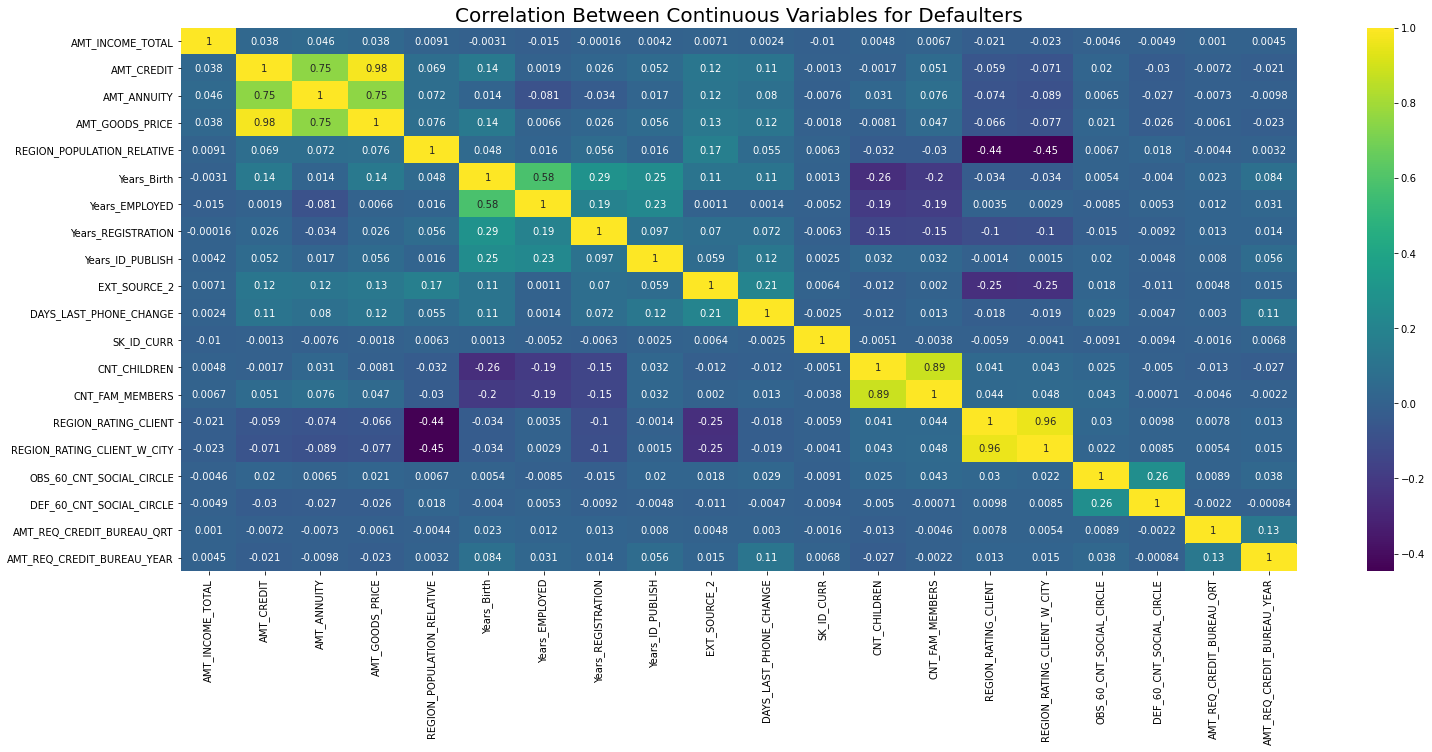

In [180]:
plt.figure(figsize = (25,10))
sns.heatmap(corr1, annot = True,cmap='viridis')
plt.title('Correlation Between Continuous Variables for Defaulters',fontsize=20)
plt.show()

#### For Non-Defaulter (Target=0)

In [181]:
int6_0 = new_app0.loc[:, new_app0.dtypes == 'int64']
flt6_0 = new_app0.loc[:, new_app0.dtypes == 'float64']

In [182]:
bi_var0 = pd.concat([flt6_0,int6_0],axis=1) # creating new DF for bi-variate analysis

In [183]:
bi_var0.drop('TARGET',axis=1,inplace = True)

In [184]:
corr0 = bi_var0.corr()
corr0

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.342799     0.418948   
AMT_CREDIT                           0.342799    1.000000     0.771297   
AMT_ANNUITY                          0.418948    0.771297     1.000000   
AMT_GOODS_PRICE                      0.349426    0.987022     0.776421   
REGION_POPULATION_RELATIVE           0.167851    0.100604     0.120977   
Years_Birth                         -0.062609    0.047378    -0.012259   
Years_EMPLOYED                      -0.140392   -0.070104    -0.104975   
Years_REGISTRATION                  -0.064937   -0.013477    -0.039435   
Years_ID_PUBLISH                    -0.022897    0.001465    -0.014111   
EXT_SOURCE_2                         0.139537    0.129075     0.126541   
DAYS_LAST_PHONE_CHANGE               0.041339    0.069542     0.062011   
SK_ID_CURR                           0.001739   -0.000342     0.000071   
CNT_CHILDREN                         0.027397    0.003081     0.020909   
CNT_FAM_MEMBERS                      0.034254    0.064536     0.075789   
REGION_RATING_CLIENT                -0.186573   -0.103337    -0.132120   
REGION_RATING_CLIENT_W_CITY         -0.200466   -0.112238    -0.145144   
OBS_60_CNT_SOCIAL_CIRCLE            -0.028507   -0.000180    -0.012277   
DEF_60_CNT_SOCIAL_CIRCLE            -0.027897   -0.021859    -0.023052   
AMT_REQ_CREDIT_BUREAU_QRT            0.017676    0.021825     0.011660   
AMT_REQ_CREDIT_BUREAU_YEAR           0.034384   -0.037519    -0.008013   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                    0.349426                    0.167851   
AMT_CREDIT                          0.987022                    0.100604   
AMT_ANNUITY                         0.776421                    0.120977   
AMT_GOODS_PRICE                     1.000000                    0.103826   
REGION_POPULATION_RELATIVE          0.103826                    1.000000   
Years_Birth                         0.044650                    0.025244   
Years_EMPLOYED                     -0.068527                   -0.007198   
Years_REGISTRATION                 -0.015891                    0.052083   
Years_ID_PUBLISH                    0.003678                    0.001070   
EXT_SOURCE_2                        0.135575                    0.198268   
DAYS_LAST_PHONE_CHANGE              0.071362                    0.041166   
SK_ID_CURR                         -0.000235                    0.000360   
CNT_CHILDREN                       -0.000559                   -0.024363   
CNT_FAM_MEMBERS                     0.062763                   -0.023425   
REGION_RATING_CLIENT               -0.104356                   -0.539005   
REGION_RATING_CLIENT_W_CITY        -0.112579                   -0.537301   
OBS_60_CNT_SOCIAL_CIRCLE           -0.000259                   -0.012493   
DEF_60_CNT_SOCIAL_CIRCLE           -0.022910                    0.001808   
AMT_REQ_CREDIT_BUREAU_QRT           0.022134                   -0.001954   
AMT_REQ_CREDIT_BUREAU_YEAR         -0.039762                    0.000152   

                             Years_Birth  Years_EMPLOYED  Years_REGISTRATION  \
AMT_INCOME_TOTAL               -0.062609       -0.140392           -0.064937   
AMT_CREDIT                      0.047378       -0.070104           -0.013477   
AMT_ANNUITY                    -0.012259       -0.104975           -0.039435   
AMT_GOODS_PRICE                 0.044650       -0.068527           -0.015891   
REGION_POPULATION_RELATIVE      0.025244       -0.007198            0.052083   
Years_Birth                     1.000000        0.626114            0.333150   
Years_EMPLOYED                  0.626114        1.000000            0.214511   
Years_REGISTRATION              0.333150        0.214511            1.000000   
Years_ID_PUBLISH                0.271315        0.276664            0.100237   
EXT_SOURCE_2                    0.078050       -0.028508            0.052420 

##### top 10 correlation varialbles for non-defaulters

In [185]:
corr0.unstack().sort_values(ascending=False).drop_duplicates().head(12)

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
AMT_GOODS_PRICE              AMT_CREDIT                    0.987022
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.878571
AMT_ANNUITY                  AMT_GOODS_PRICE               0.776421
AMT_CREDIT                   AMT_ANNUITY                   0.771297
Years_Birth                  Years_EMPLOYED                0.626114
AMT_INCOME_TOTAL             AMT_ANNUITY                   0.418948
AMT_GOODS_PRICE              AMT_INCOME_TOTAL              0.349426
AMT_INCOME_TOTAL             AMT_CREDIT                    0.342799
Years_Birth                  Years_REGISTRATION            0.333150
Years_EMPLOYED               Years_ID_PUBLISH              0.276664
dtype: float64

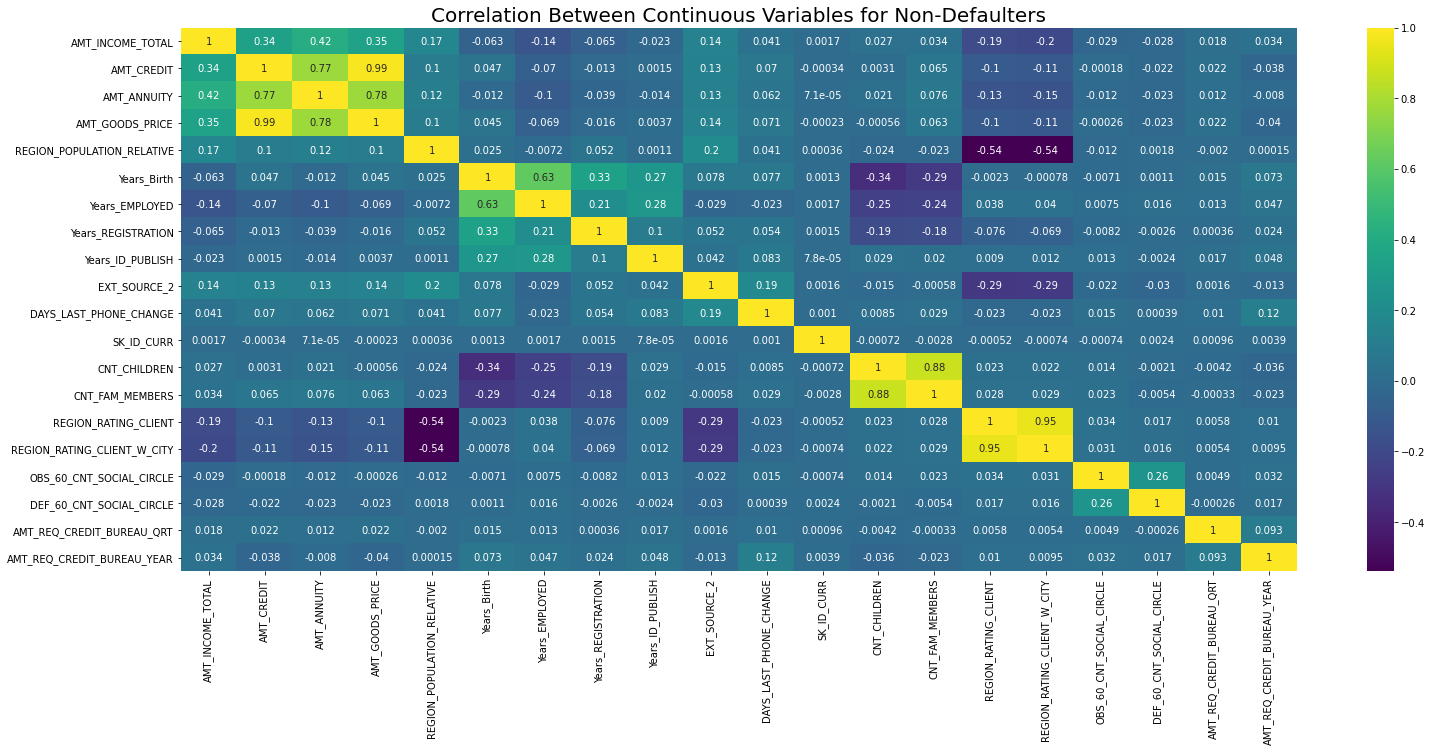

In [186]:
plt.figure(figsize = (25,10))
sns.heatmap(corr0, annot = True,cmap='viridis')
plt.title('Correlation Between Continuous Variables for Non-Defaulters',fontsize=20)
plt.show()

##### Correlation between AMT_GOODS_PRICE and AMT_CREDIT

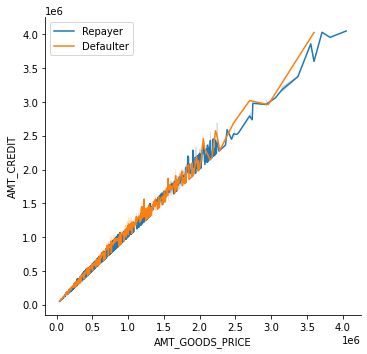

In [187]:
# check the relationship between AMT_GOODS_PRICE and AMT_CREDIT against Loan repayment staus
sns.relplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", hue="TARGET", kind="line", data=new_app,legend = False);
plt.legend(['Repayer','Defaulter'])

##### Correlation between AMT_GOODS_PRICE and AMT_ANNUITY

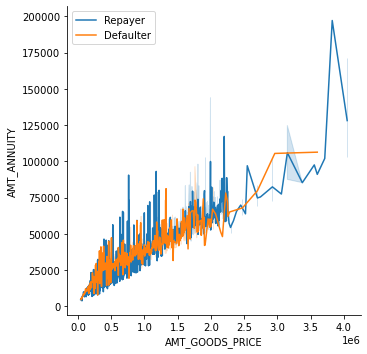

In [188]:
sns.relplot(x="AMT_GOODS_PRICE", y="AMT_ANNUITY", hue="TARGET", kind="line", data=new_app,legend = False);
plt.legend(['Repayer','Defaulter'])

##### Correlation between AMT_INCOME_TOTAL and AMT_ANNUITY

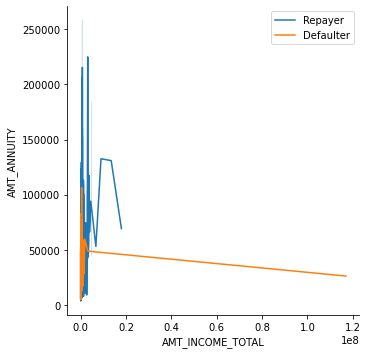

In [189]:
sns.relplot(x="AMT_INCOME_TOTAL", y="AMT_ANNUITY", hue="TARGET", kind="line", data=new_app,legend = False);
plt.legend(['Repayer','Defaulter'])

##### Correlation between AMT_INCOME_TOTAL and Years_Birth

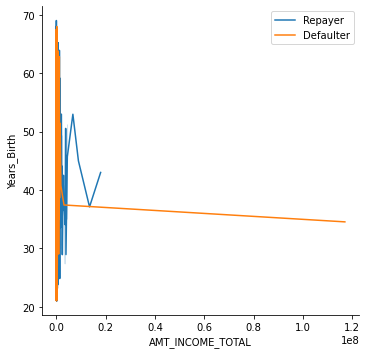

In [190]:
sns.relplot(x="AMT_INCOME_TOTAL", y="Years_Birth", hue="TARGET", kind="line", data=new_app,legend = False);
plt.legend(['Repayer','Defaulter'])

##### Correlation between AMT_INCOME_TOTAL and EXT_SOURCE_2

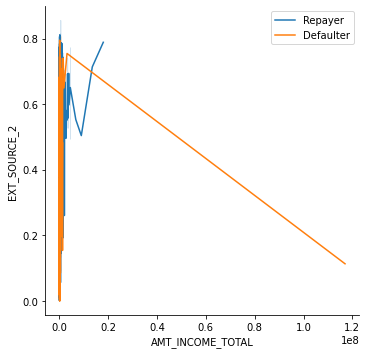

In [191]:
sns.relplot(x="AMT_INCOME_TOTAL", y="EXT_SOURCE_2", hue="TARGET", kind="line", data=new_app,legend = False);
plt.legend(['Repayer','Defaulter'])

###### As Income increases External Source Rating drops for 'Defaulters' i.e inversely proportional

### Analysis of Categoriacal and Numerical Variables

In [192]:
# Custom Ploting Function for Analysis of Categoriacal and Numerical Variables
def numvscat(cat, num,  t0, t1,hue=None):
   
    sns.despine
    fig1,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
    #plt.yscale('log')
   
    sns.boxplot(data=new_app0, x=cat,y=num, hue=hue,orient='v',ax=ax1)
    ax1.set_title(f'{t0} for Non-Defaulters')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    ax1.set_yscale('log')
    
    
    sns.boxplot(data=new_app1, x=cat,y=num, hue =hue,orient='v',ax=ax2)
    ax2.set_title(f'{t1} for Defaulters')
    ax2.set_yscale('log')
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

##### Credit Amount vs Education Status

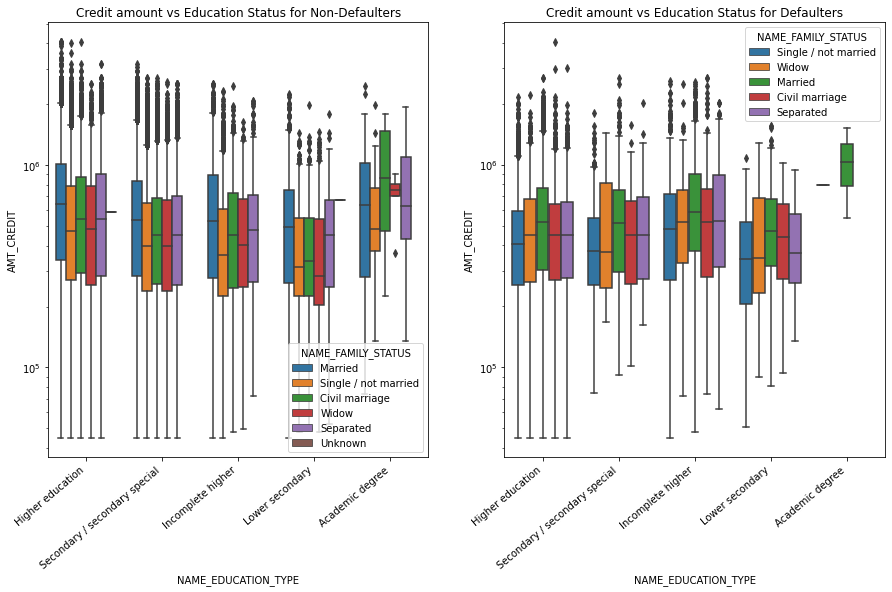

In [193]:
numvscat('NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'Credit amount vs Education Status', 'Credit amount vs Education Status' ,hue='NAME_FAMILY_STATUS')

##### Income Amount vs Education Status

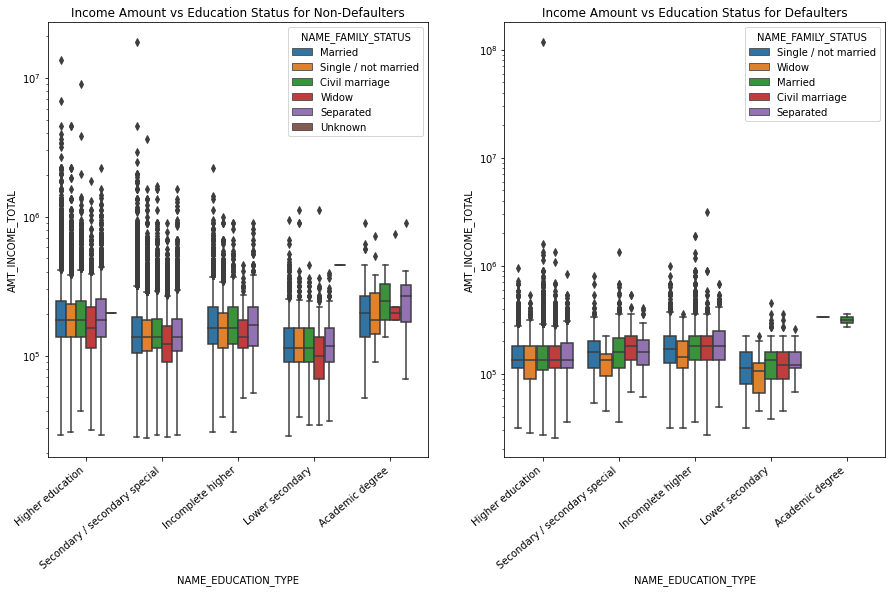

In [194]:
numvscat('NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL', 'Income Amount vs Education Status', 'Income Amount vs Education Status' ,hue='NAME_FAMILY_STATUS')


##### Annuity Ammount vs Education Status

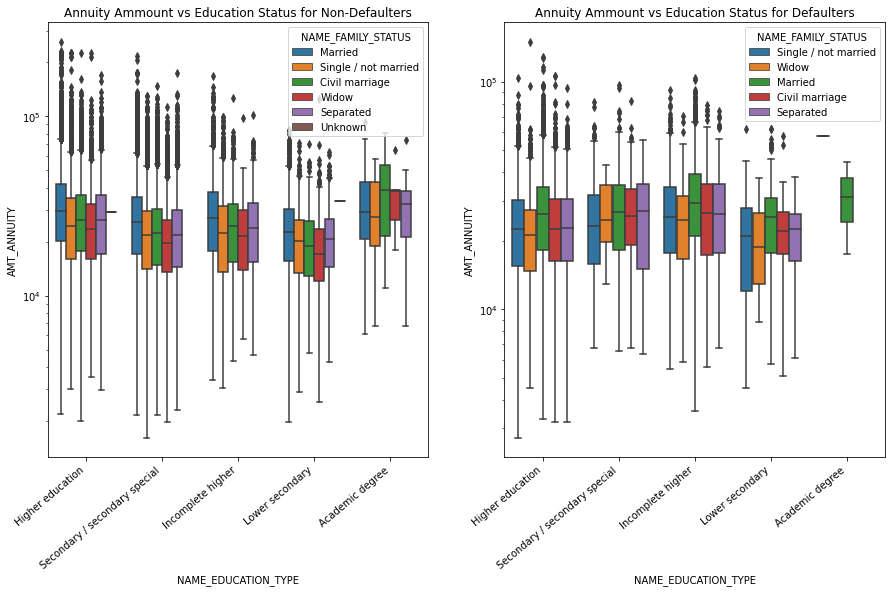

In [195]:
numvscat('NAME_EDUCATION_TYPE', 'AMT_ANNUITY', 'Annuity Ammount vs Education Status', 'Annuity Ammount vs Education Status' ,hue='NAME_FAMILY_STATUS')

In [196]:
new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

##### Age Group  vs  Aunnity Amount

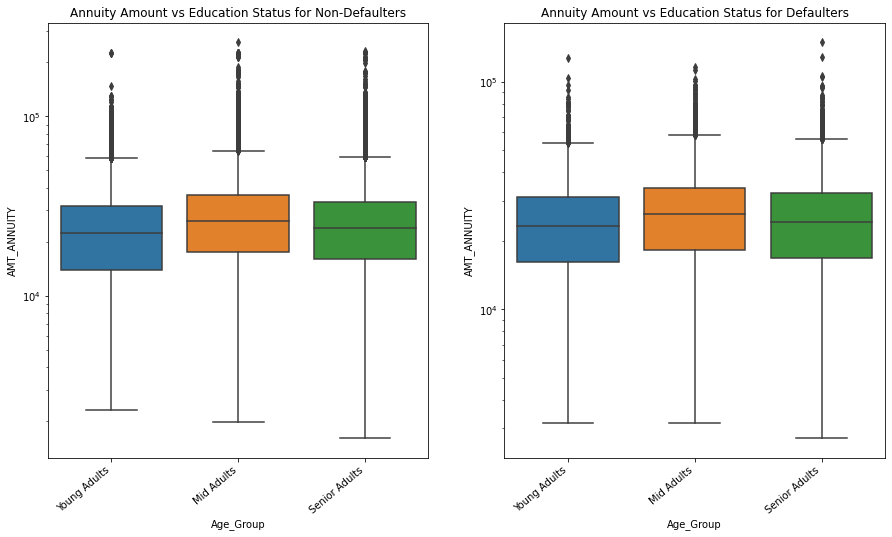

In [197]:
numvscat('Age_Group', 'AMT_ANNUITY', 'Annuity Amount vs Education Status', 'Annuity Amount vs Education Status' ,hue=None)

## Merging Previous and New Application Dataset

In [198]:
merged = pd.merge(new_app, pre_app, how='inner', on='SK_ID_CURR')

##### Data Check

In [199]:
merged.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans        Male            N   
1      100003       0           Cash loans      Female            N   
2      100003       0           Cash loans      Female            N   
3      100003       0           Cash loans      Female            N   
4      100004       0      Revolving loans        Male            Y   
5      100006       0           Cash loans      Female            N   
6      100006       0           Cash loans      Female            N   
7      100006       0           Cash loans      Female            N   
8      100006       0           Cash loans      Female            N   
9      100006       0           Cash loans      Female            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   
5               Y             0          135000.0      312682.5   
6               Y             0          135000.0      312682.5   
7               Y             0          135000.0      312682.5   
8               Y             0          135000.0      312682.5   
9               Y             0          135000.0      312682.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   
5        29686.5           297000.0   Unaccompanied          Working   
6        29686.5           297000.0   Unaccompanied          Working   
7        29686.5           297000.0   Unaccompanied          Working   
8        29686.5           297000.0   Unaccompanied          Working   
9        29686.5           297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special        Civil marriage  House / apartment   
6  Secondary / secondary special        Civil marriage  House / apartment   
7  Secondary / secondary special        Civil marriage  House / apartment   
8  Secondary / secondary special        Civil marriage  House / apartment   
9  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  Years_Birth  Years_EMPLOYED  \
0                    0.018801        25.92            1.75   
1                    0.003541        45.93            3.25   
2                    0.003541        45.93            3.25   
3                    0.003541        45.93            3.25   
4                    0.010032        52.18            0.62   
5                    0.008019        52.07            8.33   
6                    0.008019        52.07            8.33   
7                    0.008019        52.07            8.33   
8                    0.008019        52.07            8.33   
9                    0.008019        52.07            8.33   

   Years_REGISTRATION  Years_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                9.99              5.81        Laborers                1   
1      

In [200]:
merged.shape

(1413701, 65)

In [201]:
merged.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413701e+06       1.413701e+06   
mean   5.875537e+05   2.701688e+04       5.276522e+05   
std    3.849173e+05   1.395072e+04       3.531028e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE   Years_Birth  Years_EMPLOYED  \
count                1.413701e+06  1.413701e+06    1.413701e+06   
mean                 2.074985e-02  4.471522e+01    1.990788e+02   
std                  1.334702e-02  1.190290e+01    3.927068e+02   
min                  2.900000e-04  2.052000e+01    0.000000e+00   
25%                  1.003200e-02  3.490000e+01    2.850000e+00   
50%                  1.885000e-02  4.396000e+01    6.580000e+00   
75%                  2.866300e-02  5.474000e+01    1.730000e+01   
max                  7.250800e-02  6.904000e+01    1.000670e+03   

       Years_REGISTRATION  Years_ID_PUBLISH  CNT_FAM_MEMBERS  \
count        1.413701e+06      1.413701e+06     1.413701e+06   
mean         1.370748e+01      8.313884e+00     2.150501e+00   
std          9.728901e+00      4.129784e+00     9.006787e-01   
min          0.000000e+00      0.000000e+00     1.000000e+00   
25%          5.480000e+00      4.880000e+00     2.000000e+00   
50%          1.235000e+01      9.120000e+00     2.000000e+00   
75%          2.058000e+01      1.183000e+01     3.000000e+00   
max          6.759000e+01      1.972000e+01     2.000000e+01   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  \
count          1.413701e+06                 1.413701e+06  1.413701e+06   
mean           2.059638e+00                 2.037603e+00  5.114313e-01   
std            4.957797e-01                 4.886431e-01  1.909957e-01   
min            1.000000e+00                 1.000000e+00  8.173617e-08   
25%            2.000000e+00                 2.000000e+00  3.893855e-01   
50%            2.000000e+00                 2.000000e+00  5.624666e-01   
75%            2.000000e+00                 2.000000e+00  6.605643e-01   
max            3.000000e+00                 3.000000e+00  8.549997e-01   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count              1.413701e+06              1.413701e+06   
mean               1.522906e+00              1.078021e-01   
std                2.507192e+00              3.786711e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.440000e+02              2.400000e+01   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_QRT  \
count            1.413701e+06               1.413701e+06   
mean             2.971780e+00               3.196935e-01   
std              2.191604e+00               8.781444e-01   
min              0.000000e+00               0.000000e+00   
25%              1.080000e+00               0.000000e+00   
50%              2.770000e+00               0.000000e+00   
75%              4.610000e+00               0.000000e+0

In [202]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 65 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  object  
 12  NAME_INCOME_TYPE            

### Univariate Analysis

###### Dividing Dataframe into Deafulaters and Non-Defaulters

In [216]:
merged0=merged[merged['Target']=='Yes']    # Dataframe with all the data related to non-defaulters
merged1=merged[merged['Target']=='No']   # Dataframe with all the data related to defaulters

In [217]:
def UniPlot_m(variable):
    x = merged0[variable].value_counts(normalize = True)*100
    y = merged1[variable].value_counts(normalize = True)*100
    
    sns.despine
    
    fig1,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

    fig2,(ax3,ax4) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
   
    sns.countplot(x = variable, data = merged0, palette = 'viridis', ax=ax1)
    ax1.set_title(f'Distribution of {variable} for Defaulters')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
   
    sns.countplot(x = variable, data = merged1, palette ='viridis',ax=ax2)
    ax2.set_title(f'Distribution of {variable} for Non-Defaulters')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
   
    #creating percentage datafarme to make analysis based on percetage of defaulters
    percent = merged[[variable, 'TARGET']].groupby([variable],as_index=False).mean()
    percent["TARGET"] = percent["TARGET"]*100
    percent.sort_values(by='TARGET', ascending=False, inplace=True)
   
    sns.barplot( x = variable, y='TARGET', order=percent[variable], data=percent, palette='viridis',ax=ax4)
    ax4.set_title(f'Percentage of Defaulter for {variable}')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
    
    sns.countplot(x = variable, data = merged, palette ='viridis', ax=ax3)
    ax3.set_title(f'Total Distribution of {variable}')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()
    

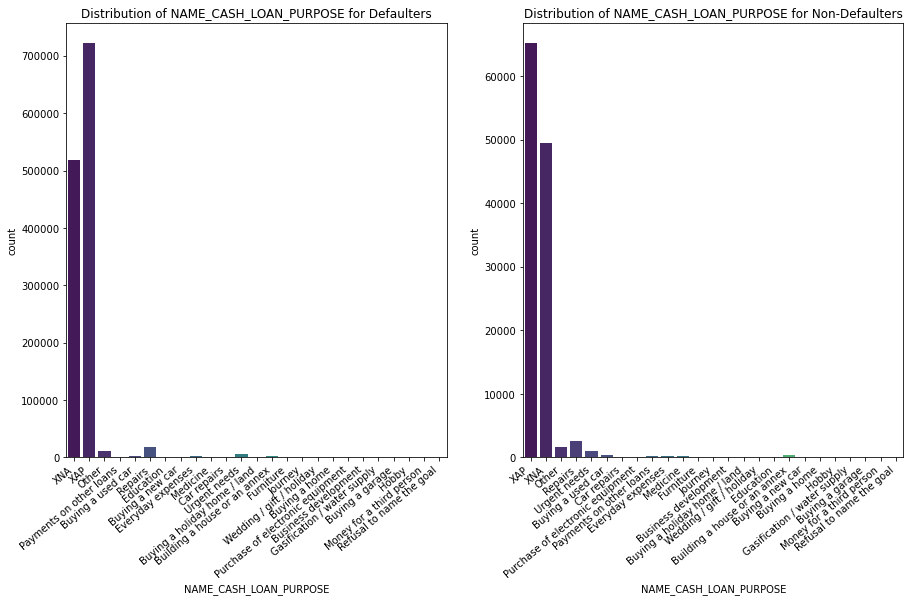

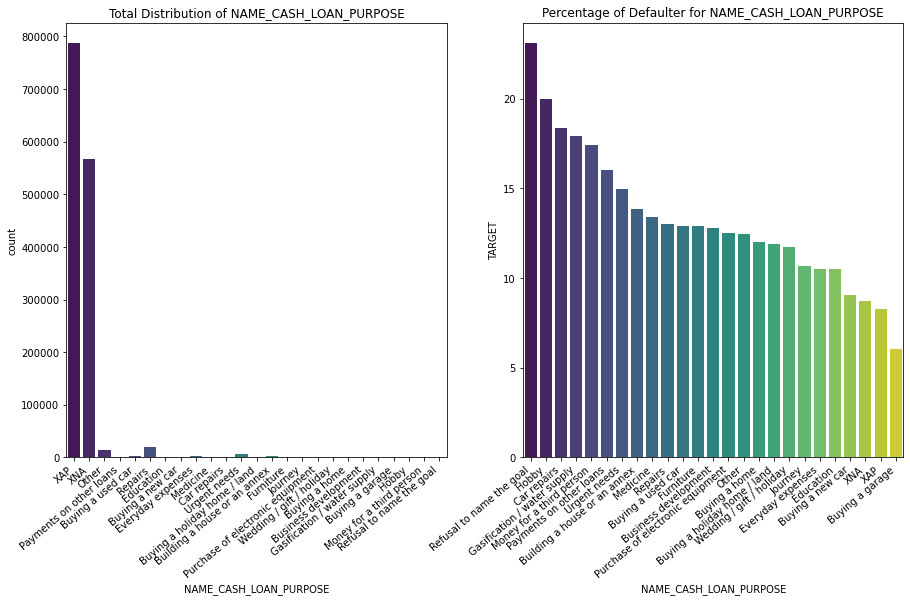

In [218]:
UniPlot_m('NAME_CASH_LOAN_PURPOSE')

In [ ]:
NAME_CONTRACT_STATUS

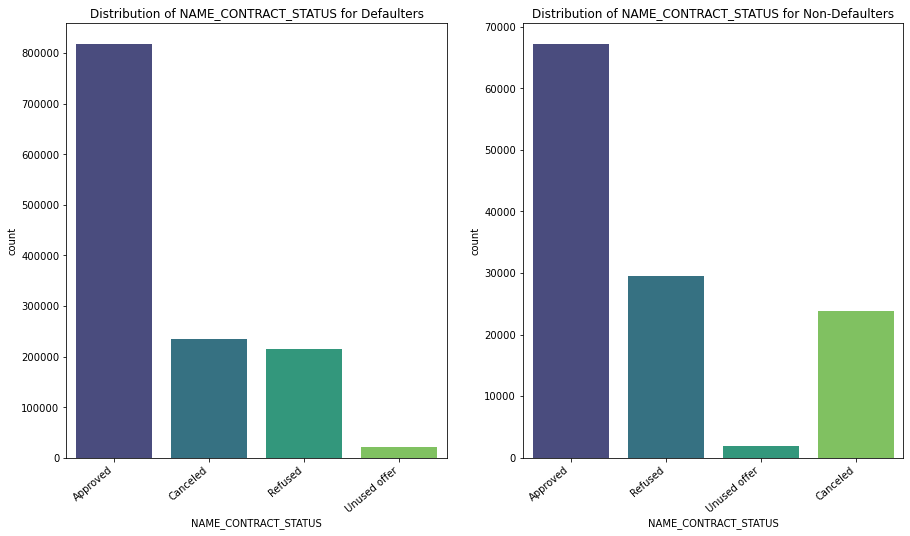

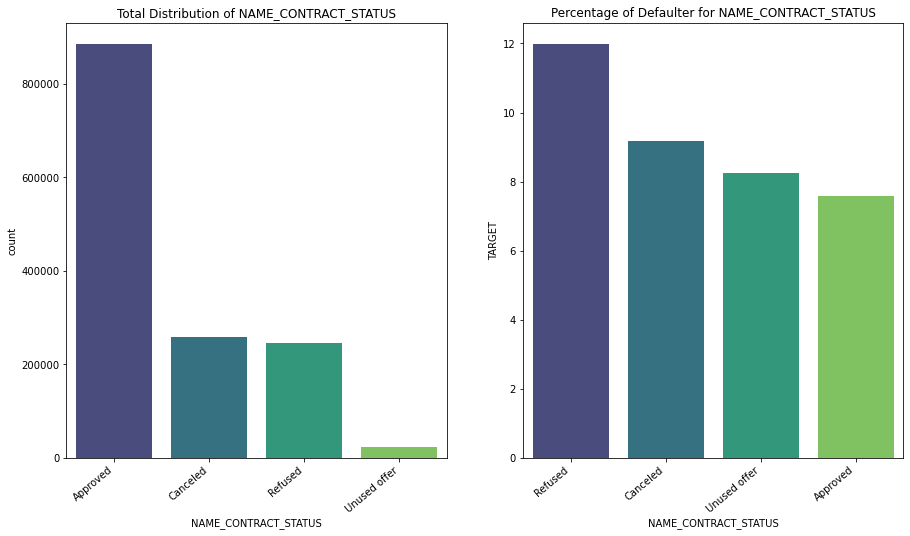

In [219]:
UniPlot_m('NAME_CONTRACT_STATUS')

In [ ]:
#####NAME_PAYMENT_TYPE

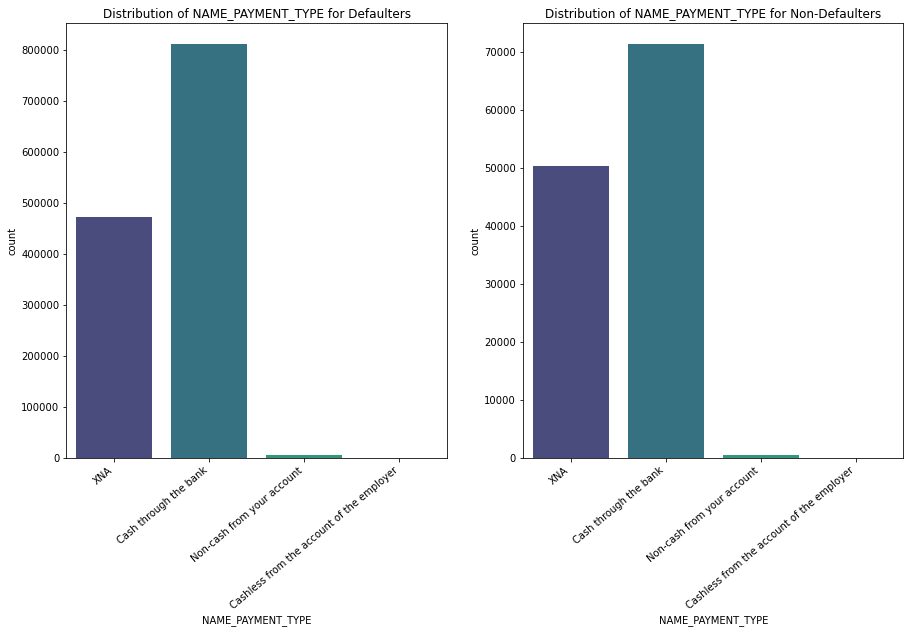

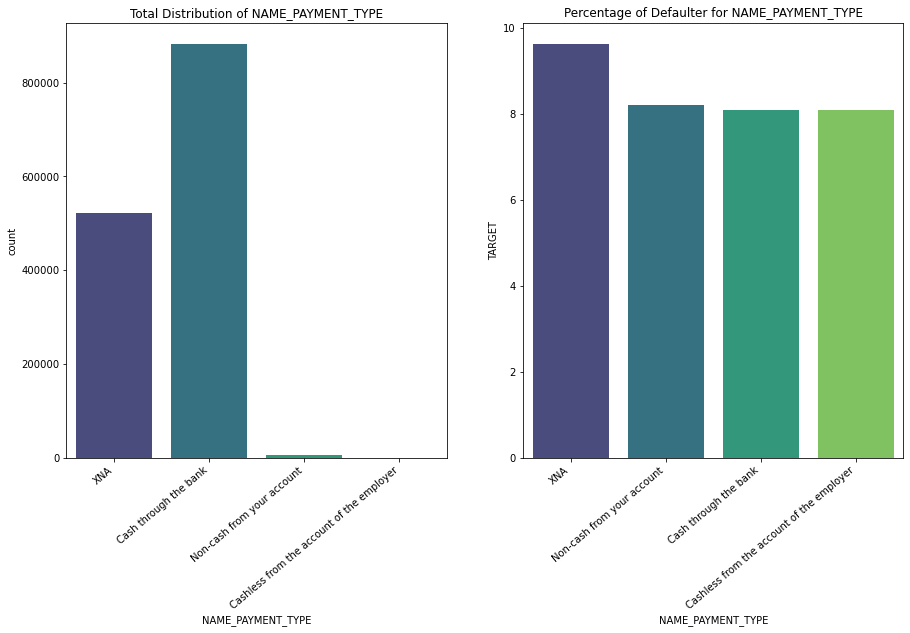

In [220]:
UniPlot_m('NAME_PAYMENT_TYPE')

##### CODE_REJECT_REASON

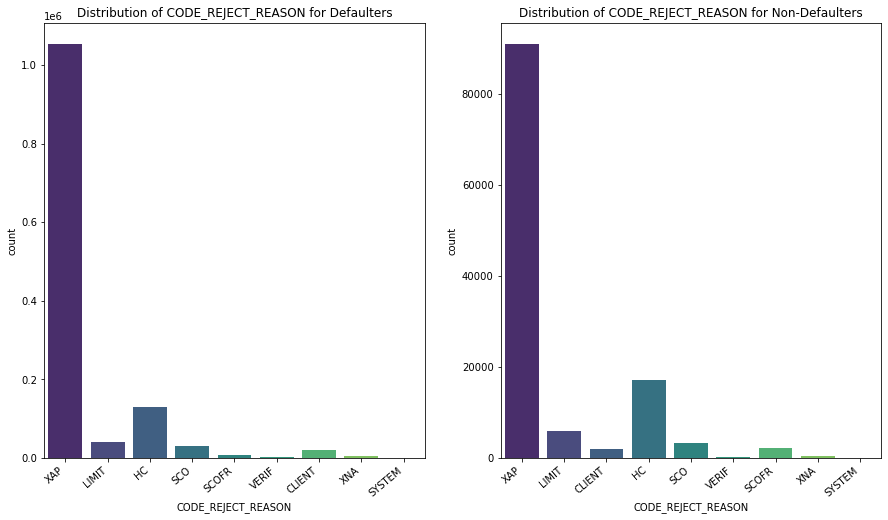

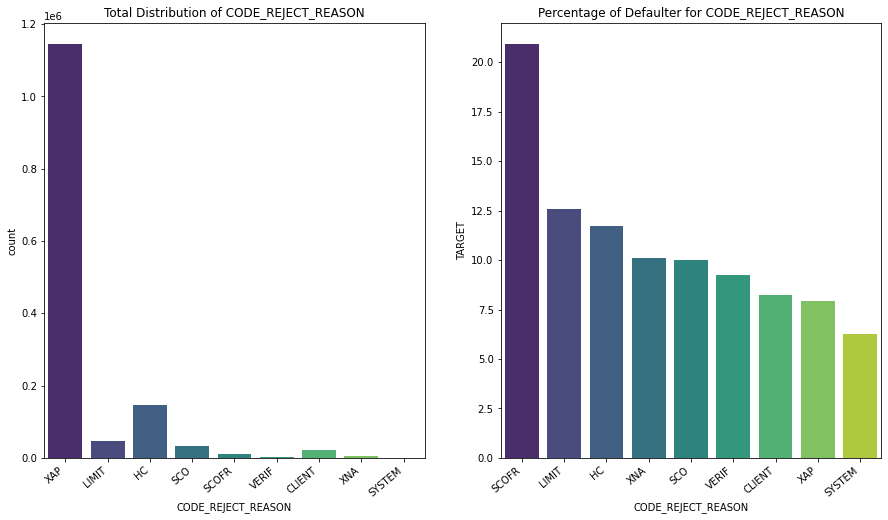

In [221]:
UniPlot_m('CODE_REJECT_REASON')

##### NAME_PRODUCT_TYPE

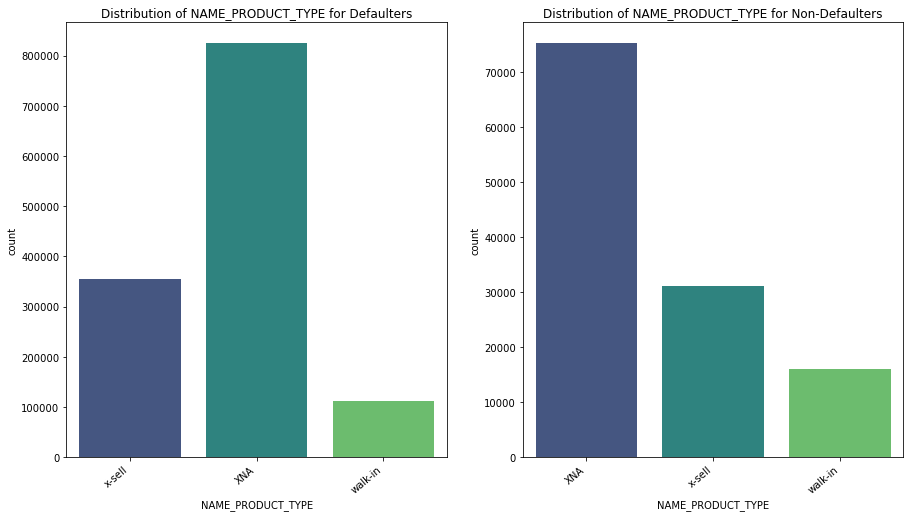

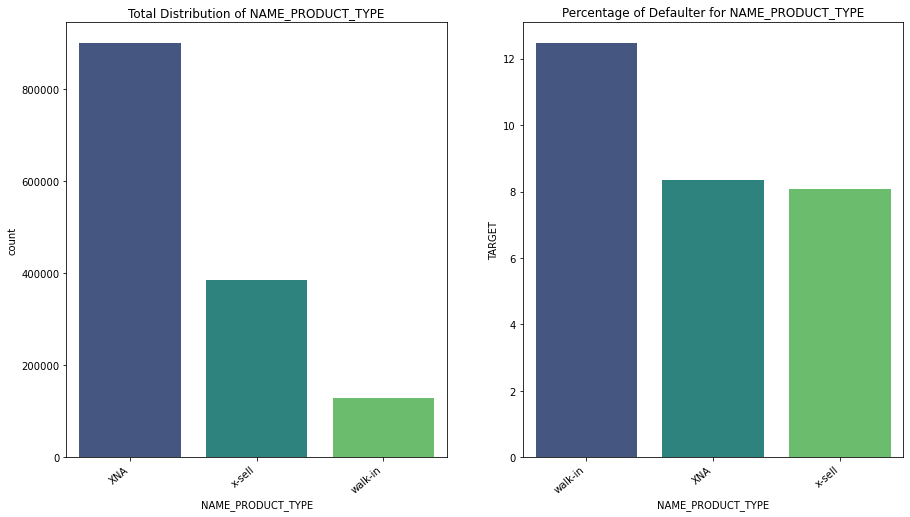

In [222]:
UniPlot_m('NAME_PRODUCT_TYPE')

###### NAME_CLIENT_TYPE

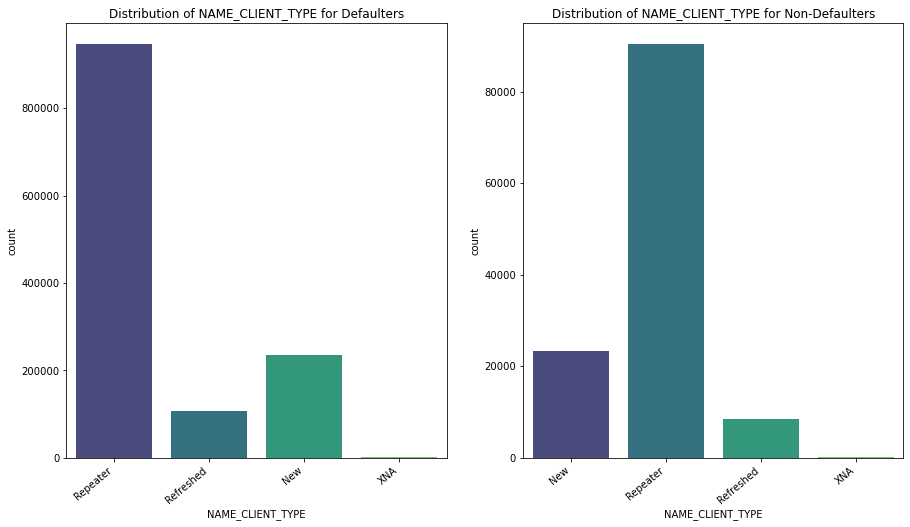

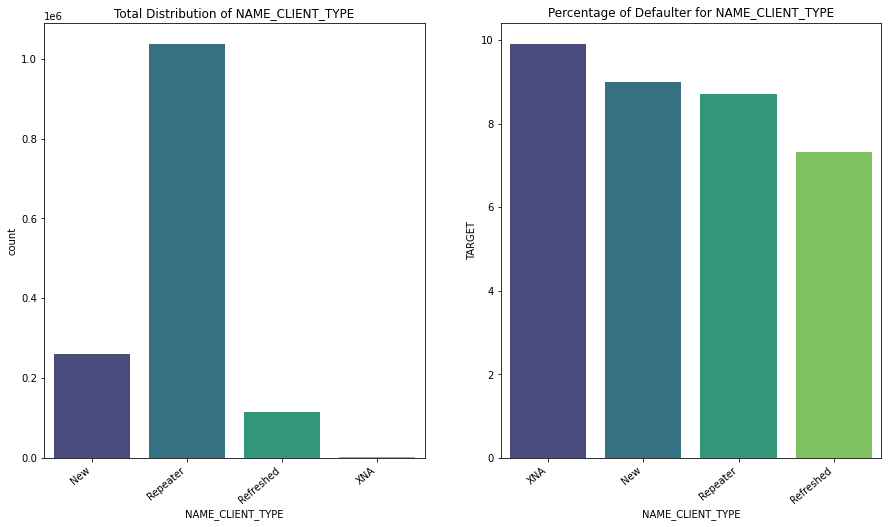

In [223]:
UniPlot_m('NAME_CLIENT_TYPE')

##### NAME_SELLER_INDUSTRY

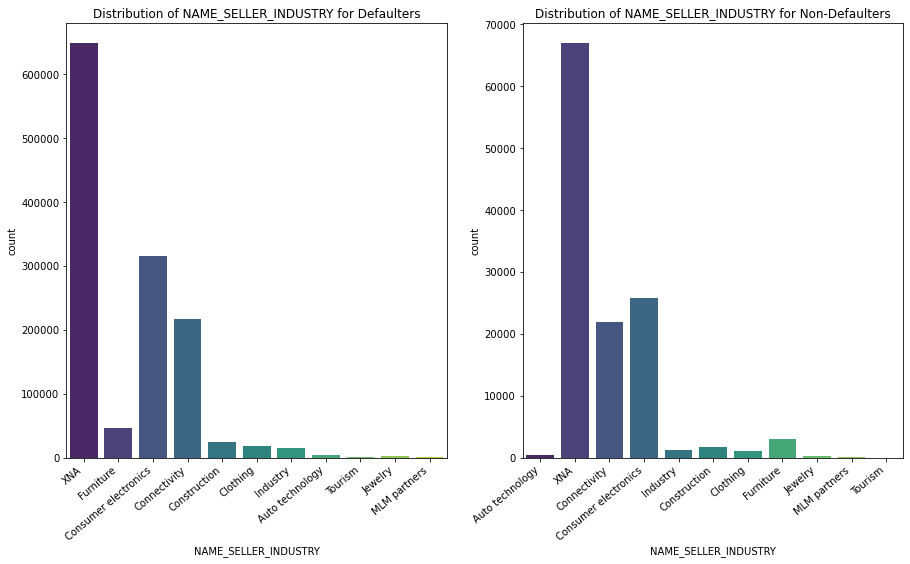

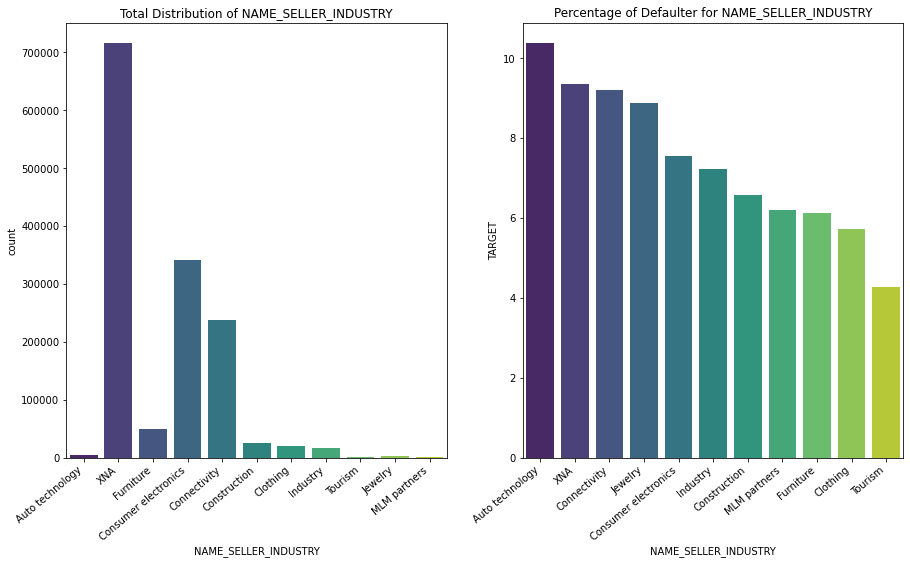

In [224]:
UniPlot_m('NAME_SELLER_INDUSTRY')

##### NAME_PORTFOLIO

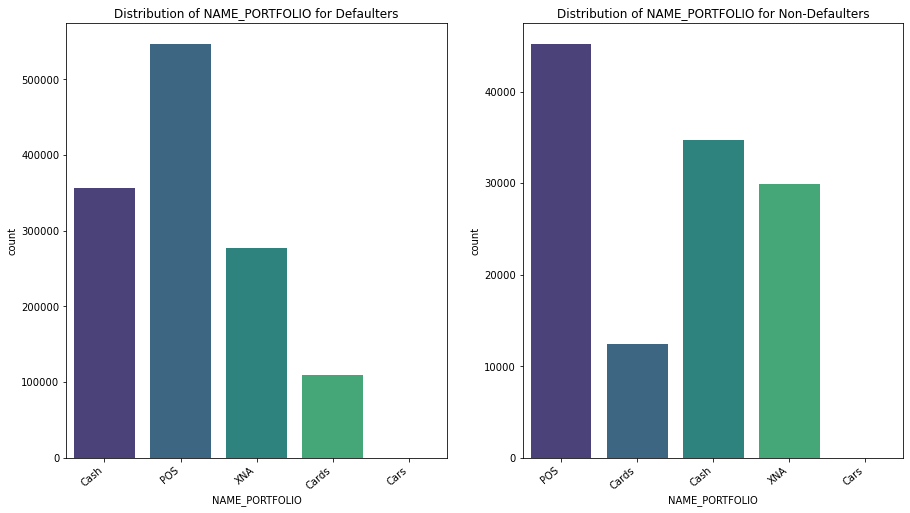

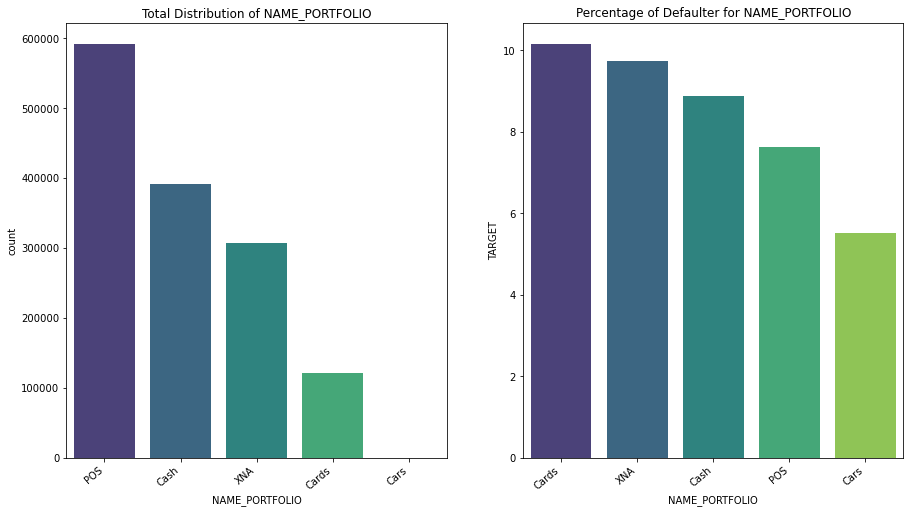

In [225]:
UniPlot_m('NAME_PORTFOLIO')

##### NAME_CONTRACT_TYPE_y

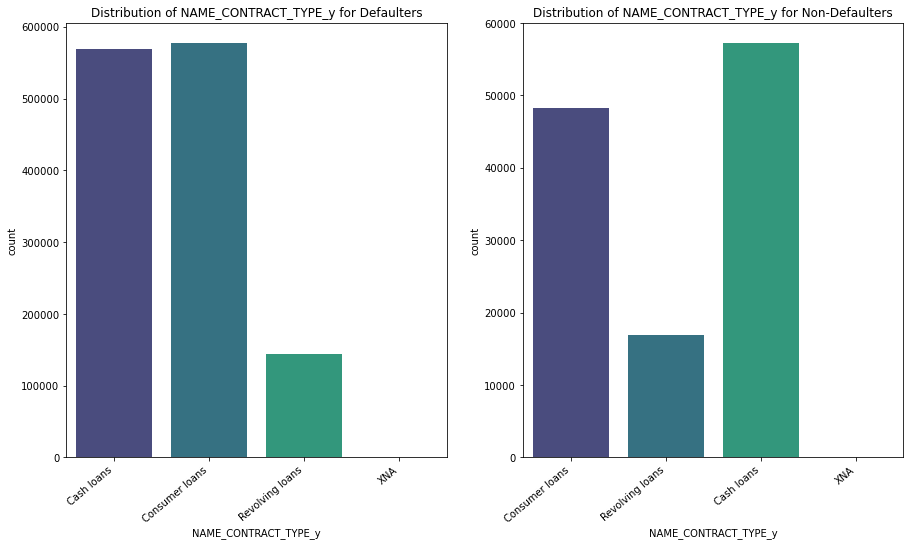

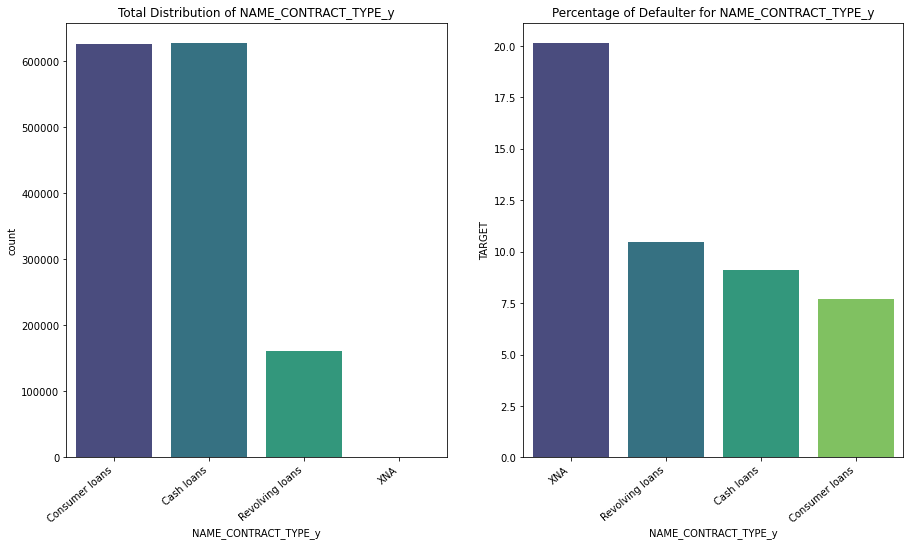

In [226]:
UniPlot_m('NAME_CONTRACT_TYPE_y')

###### NAME_YIELD_GROUP

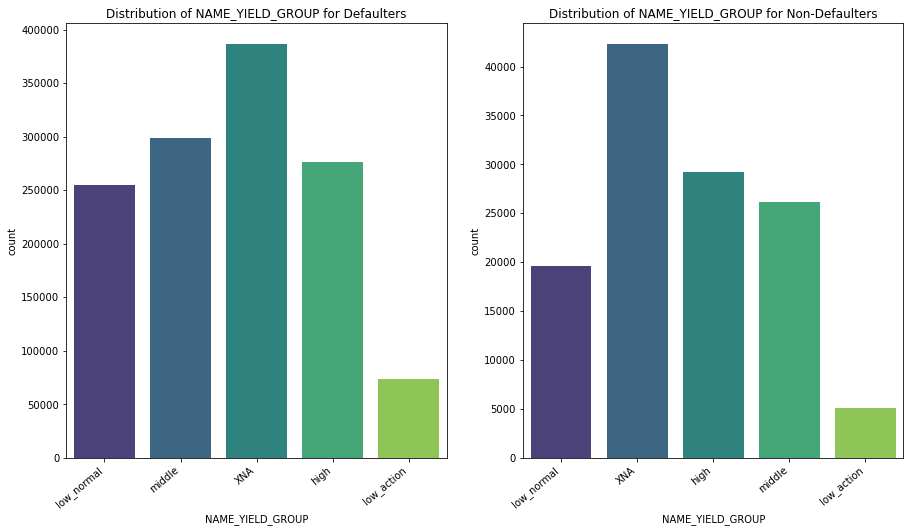

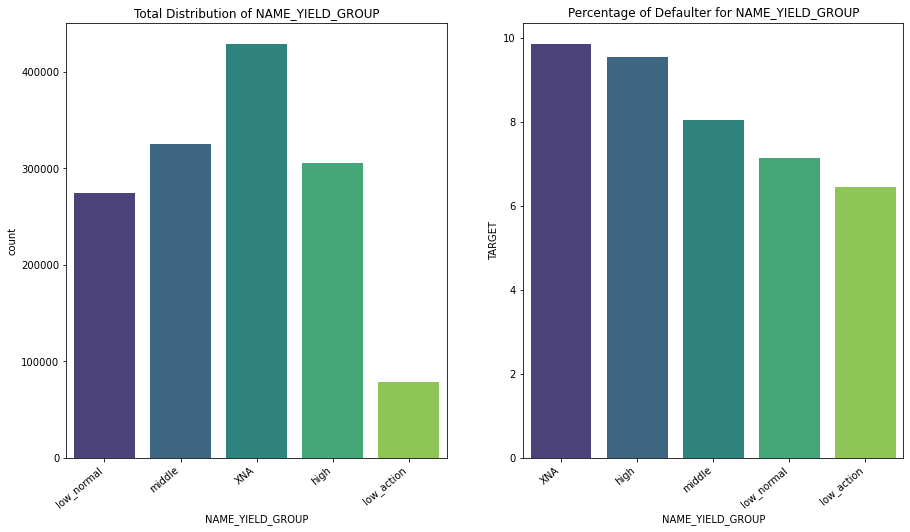

In [227]:
UniPlot_m('NAME_YIELD_GROUP')

#### Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

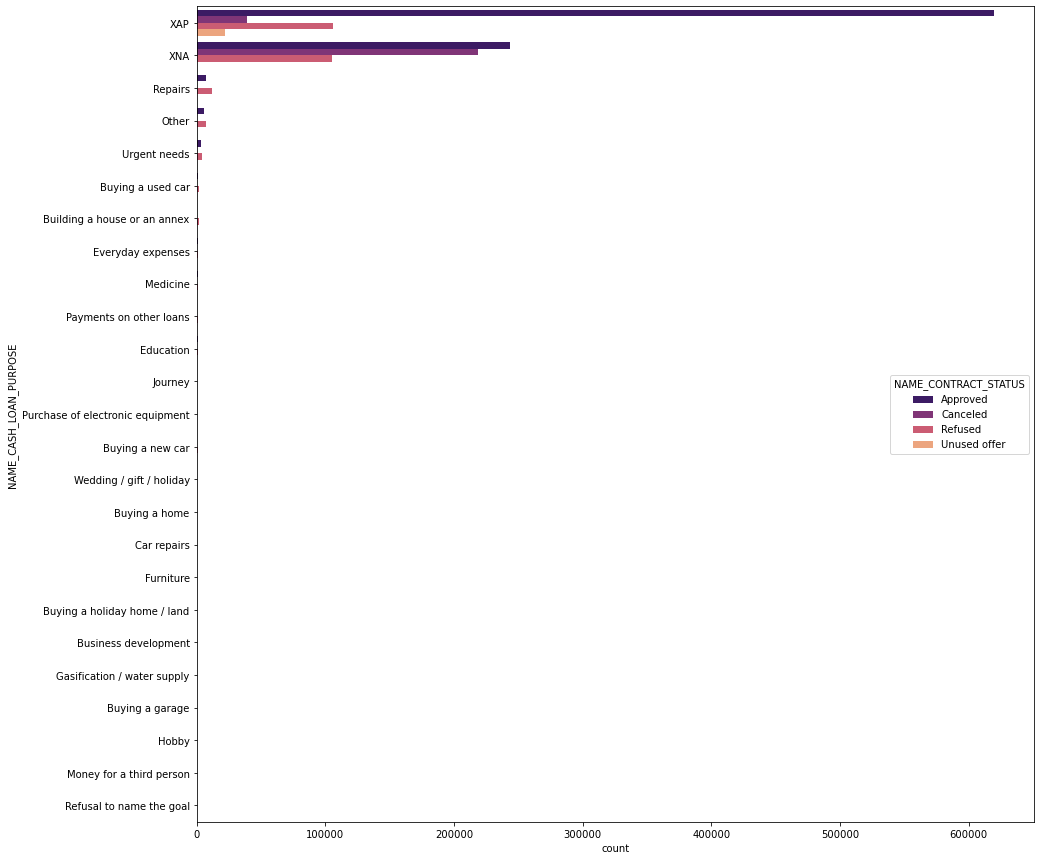

In [203]:
plt.figure(figsize=(15,15))
sns.countplot(data = merged, y= 'NAME_CASH_LOAN_PURPOSE', order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

#### removing XAP or XAP for better analysis

In [213]:
merged_x=merged.drop(merged[merged['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
merged_x=merged_x.drop(merged_x[merged_x['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

<AxesSubplot:xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

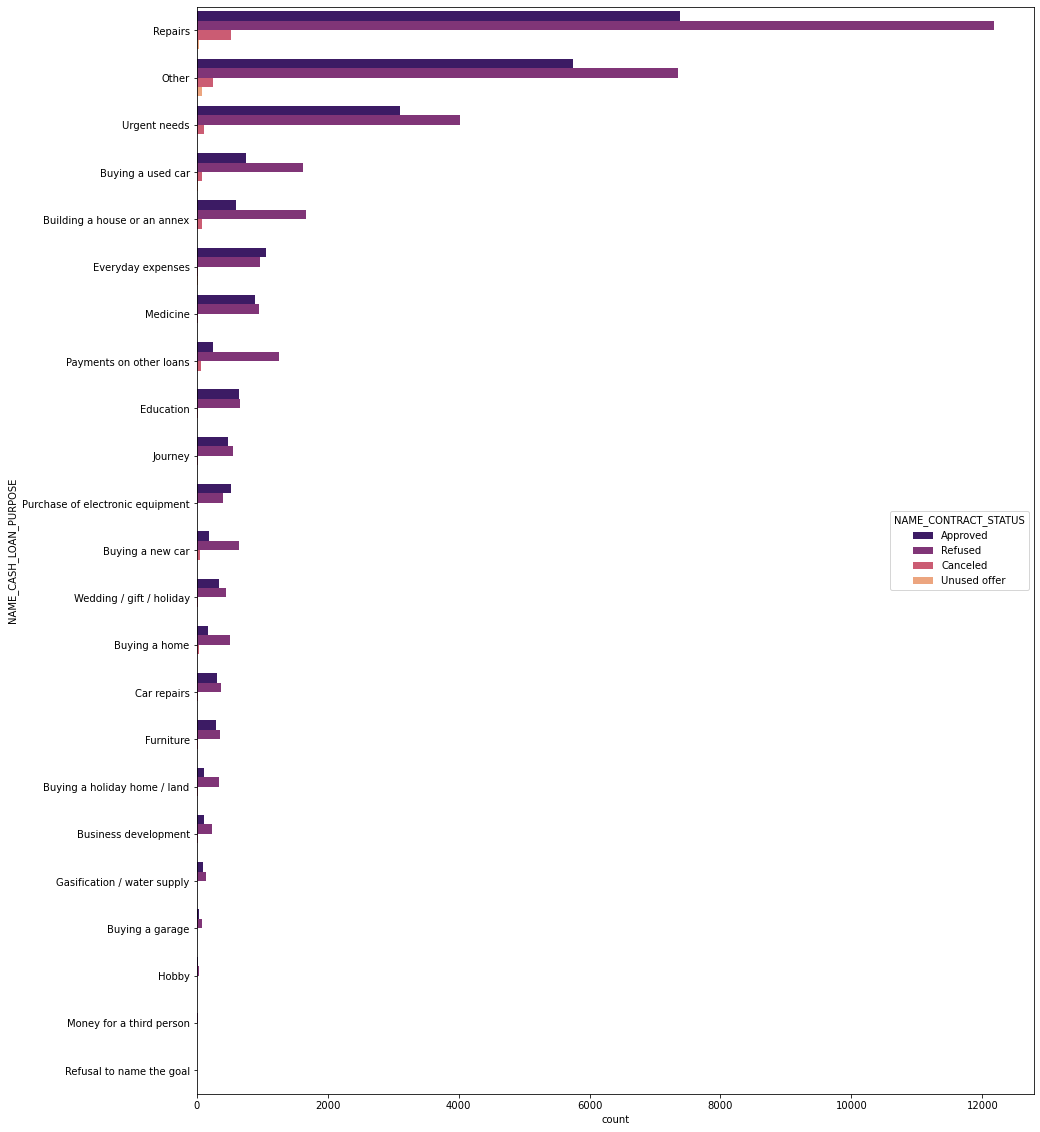

In [214]:
plt.figure(figsize=(15,20))
sns.countplot(data = merged_x, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_x['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

<AxesSubplot:xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

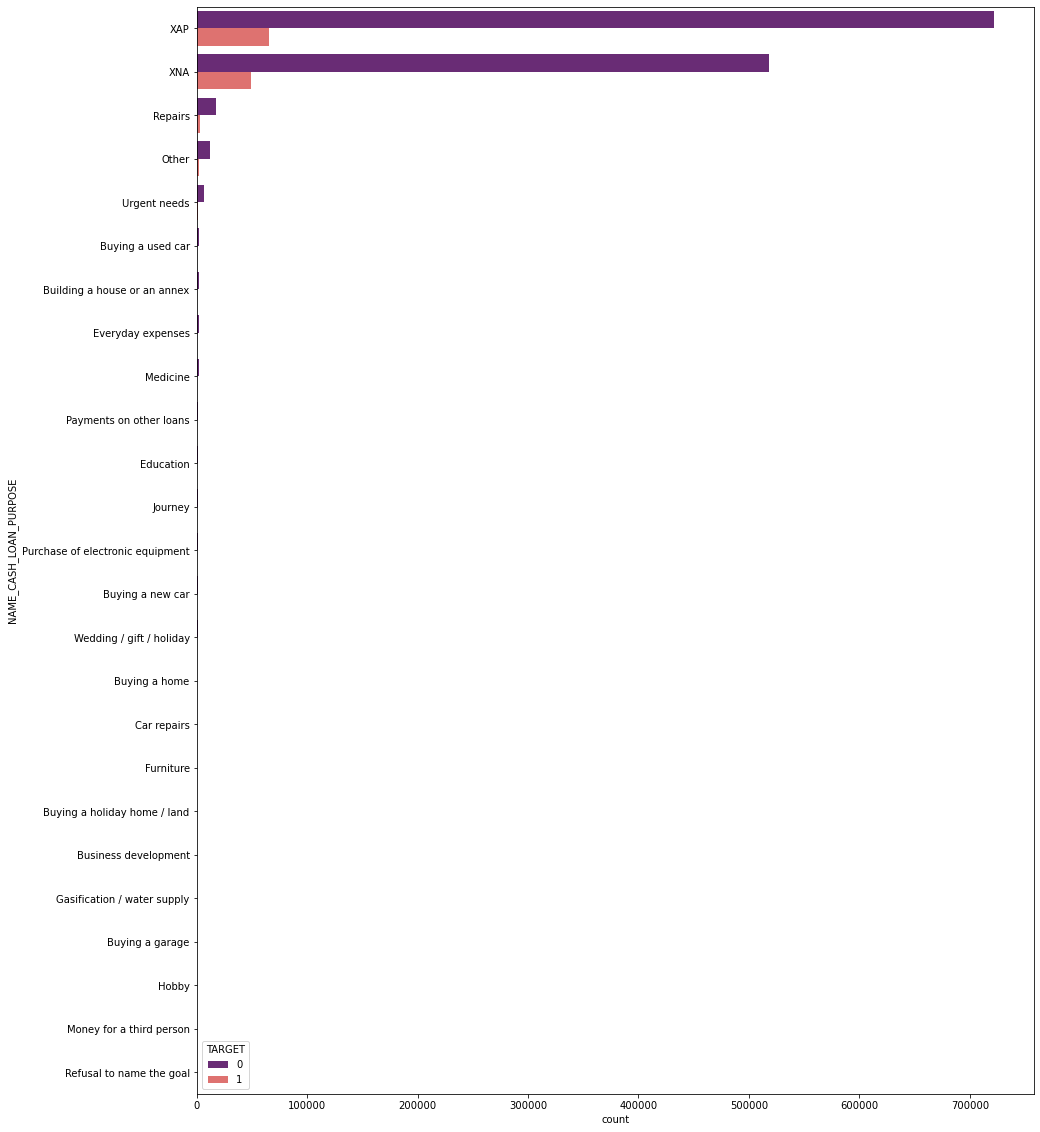

In [208]:
plt.figure(figsize=(15,20))
sns.countplot(data = merged, y= 'NAME_CASH_LOAN_PURPOSE', order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

<AxesSubplot:xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

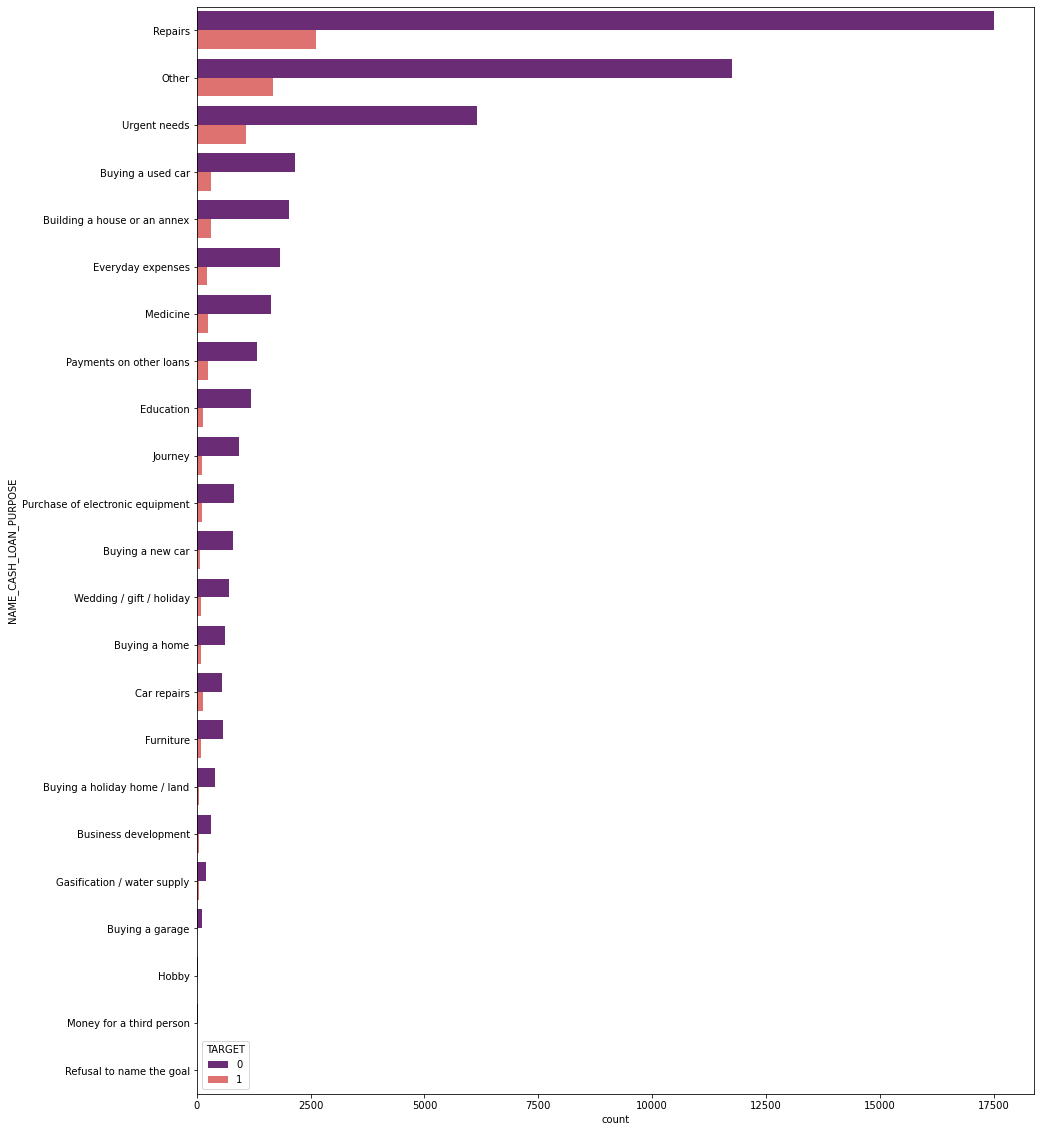

In [215]:
plt.figure(figsize=(15,20))
sns.countplot(data = merged_x, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_x['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

# Plz feel free to add if required more bivariate anlysis

# Conclusion For Banks